## Deliberated Aberration Data
- Data obtained on 06/06/17. Full cubes
- Continued from previous [trials](https://github.com/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling2.ipynb)


- Our usual friend of the wiki [page](https://en.wikipedia.org/wiki/Zernike_polynomials) of Zernike polynomials and the coefficients


### Contents
1. [Data](#Data-Inspection)
2. [Inspection](#Peak-and-Center)
    - [Common Zernike Models](#Aberrations)
    - [Sinusoidals](#Sinusoidal-cases)
3. [Oversampling](#Defining-"oversampling"-for-PR-purpose)
4. [Windowing](#Windowing)
    - [Applying](#Applying-circular-windows)
    - [Checks](#Checks)
5. [Orientation](#Orientaion)
6. [Phase Retrieval](#PR)
    - [Setup](#Setup)
    - [Run](#Run)

In [4]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
from scipy.ndimage.interpolation import rotate
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [2]:
predir = '../../data/GS_&_PD_data_10_17_2016/'
wvl    = 1646. # nm, H-band

### <font color="blue">Some notes about data</font>
- Since some data apparently have orientation ambiguity with extra +/- 90$^\circ$ rotations, the "true" PSFs are compared with the measured ones and the reconstruction is run with this corrected rotation angle
- The default "rotation angle" is 24.4 degrees as defined previously
- Recall that -150 nm focus is presumably "free of aberrations"
- Keeping the FWHM=4 in the rotated case

#### <font color="magenta">Notes:</font>
- Skipping the "not rotated" trials for the moment
- Not sure what's the effect of "open"/"H" recorded in the data log (different filters? masks? apodizers?)
- Recall that any shifting of the center could manifest itself later as tip/tilt!!!!!!

---
## Data Inspection

### Data 1
> **Log:** -150nm focus, +50nm astig 2,2

In [6]:
data_01_path = predir+'S20161018E0019_spdc.fits'

data_01 = data_manage(path=data_01_path,angle=24.4,cube=True)
data_01(wvl/1000.)
data_01_rot = data_01.rot_img(plot=False)

### Data 2
> **Log:** -150nm focus, +50nm astig 2,2

Perhaps with different exposure time from Data 1

In [7]:
data_02_path = predir+'S20161018E0020_spdc.fits'

data_02 = data_manage(path=data_02_path,angle=24.4,cube=True)
data_02(wvl/1000.)
data_02_rot = data_02.rot_img(plot=False)

### Data 3
> **Log:** -150nm focus, +150nm astig 2,2

In [8]:
data_03_path = predir+'S20161018E0021_spdc.fits'

data_03 = data_manage(path=data_03_path,angle=24.4,cube=True)
data_03(wvl/1000.)
data_03_rot = data_03.rot_img(plot=False)

### Data 4
> **Log:** 0nm focus, +150nm astig 2,2

In [9]:
data_04_path = predir+'S20161018E0022_spdc.fits'

data_04 = data_manage(path=data_04_path,angle=24.4,cube=True)
data_04(wvl/1000.)
data_04_rot = data_04.rot_img(plot=False)

### Data 5
> **Log:** 0nm focus & +150nm coma 3,1 ; PSF MOVED???

In [10]:
data_05_path = predir+'S20161018E0023_spdc.fits'

data_05 = data_manage(path=data_05_path,angle=24.4,cube=True)
data_05(wvl/1000.)
data_05_rot = data_05.rot_img(plot=False)

### Data 6
> **Log:** -150nm focus & +150nm coma 3,1 ; PSF moved?

In [11]:
data_06_path = predir+'S20161018E0024_spdc.fits'

data_06 = data_manage(path=data_06_path,angle=24.4,cube=True)
data_06(wvl/1000.)
data_06_rot = data_06.rot_img(plot=False)

### Data 7
> **Log:** -150nm focus

In [12]:
data_07_path = predir+'S20161018E0025_spdc.fits'

data_07 = data_manage(path=data_07_path,angle=24.4,cube=True)
data_07(wvl/1000.)
data_07_rot = data_07.rot_img(plot=False)

### Data 8
> **Log:** 0nm focus, +150nm astig 2,2

In [13]:
data_08_path = predir+'S20161018E0026_spdc.fits'

data_08 = data_manage(path=data_08_path,angle=24.4,cube=True)
data_08(wvl/1000.)
data_08_rot = data_08.rot_img(plot=False)

### Data 9
> **Log:** -150nm focus, +150nm astig 2,2

In [14]:
data_09_path = predir+'S20161018E0027_spdc.fits'

data_09 = data_manage(path=data_09_path,angle=24.4,cube=True)
data_09(wvl/1000.)
data_09_rot = data_09.rot_img(plot=False)

### Data 10
> **Log:** -150 focus, +150 astig (2,2), +150 coma (3,1), +100 trefoil (3,3), +100 quadifoil (4,4)

Same as #13, but with "H" (instead of "open")

In [15]:
data_10_path = predir+'S20161018E0028_spdc.fits'

data_10 = data_manage(path=data_10_path,angle=24.4,cube=True)
data_10(wvl/1000.)
data_10_rot = data_10.rot_img(plot=False)

### Data 11
> **Log:** 0 focus, +150 astig (2,2), +150 coma (3,1), +100 trefoil (3,3), +100 quadifoil (4,4)

Same as #12, but with "H" (instead of "open")

In [17]:
data_11_path = predir+'S20161018E0029_spdc.fits'

data_11 = data_manage(path=data_11_path,angle=24.4,cube=True)
data_11(wvl/1000.)
data_11_rot = data_11.rot_img(plot=False)

### Data 12
> **Log:** 0 focus, +150 astig (2,2), +150 coma (3,1), +100 trefoil (3,3), +100 quadifoil (4,4)

In [18]:
data_12_path = predir+'S20161018E0030_spdc.fits'

data_12 = data_manage(path=data_12_path,angle=24.4,cube=True)
data_12(wvl/1000.)
data_12_rot = data_12.rot_img(plot=False)

### Data 13
> **Log:** -150 focus, +150 astig (2,2), +150 coma (3,1), +100 trefoil (3,3), +100 quadifoil (4,4)

In [19]:
data_13_path = predir+'S20161018E0031_spdc.fits'

data_13 = data_manage(path=data_13_path,angle=24.4,cube=True)
data_13(wvl/1000.)
data_13_rot = data_13.rot_img(plot=False)

### Data 14
> **Log:** -150 nm focus , 10nm mode 10 sine ; can't see anything

In [20]:
data_14_path = predir+'S20161018E0032_spdc.fits'

data_14 = data_manage(path=data_14_path,angle=24.4,cube=True)
data_14(wvl/1000.)
data_14_rot = data_14.rot_img(plot=False)

### Data 15
> **Log:** -150 nm focus , 75nm mode 10 sine 

In [21]:
data_15_path = predir+'S20161018E0033_spdc.fits'

data_15 = data_manage(path=data_15_path,angle=24.4,cube=True)
data_15(wvl/1000.)
data_15_rot = data_15.rot_img(plot=False)

### Data 16
> **Log:** 0nm focus, 75nm mode 10 sine

In [22]:
data_16_path = predir+'S20161018E0034_spdc.fits'

data_16 = data_manage(path=data_16_path,angle=24.4,cube=True)
data_16(wvl/1000.)
data_16_rot = data_16.rot_img(plot=False)

### Data 17
> **Log:** -150 nm focus , 100nm mode 10 sine

In [23]:
data_17_path = predir+'S20161018E0035_spdc.fits'

data_17 = data_manage(path=data_17_path,angle=24.4,cube=True)
data_17(wvl/1000.)
data_17_rot = data_17.rot_img(plot=False)

### Data 18
> **Log:** -150 nm focus , 100nm mode 10 sine

In [24]:
data_18_path = predir+'S20161018E0036_spdc.fits'

data_18 = data_manage(path=data_18_path,angle=24.4,cube=True)
data_18(wvl/1000.)
data_18_rot = data_18.rot_img(plot=False)

### Data 19
> **Log:** 0 nm focus , 100nm mode 10 sine

In [25]:
data_19_path = predir+'S20161018E0036_spdc.fits'

data_19 = data_manage(path=data_19_path,angle=24.4,cube=True)
data_19(wvl/1000.)
data_19_rot = data_19.rot_img(plot=False)

---
## <font color="blue">Peak and Center</font>
#### Aberrations
_[(Back to top)](#Contents)_

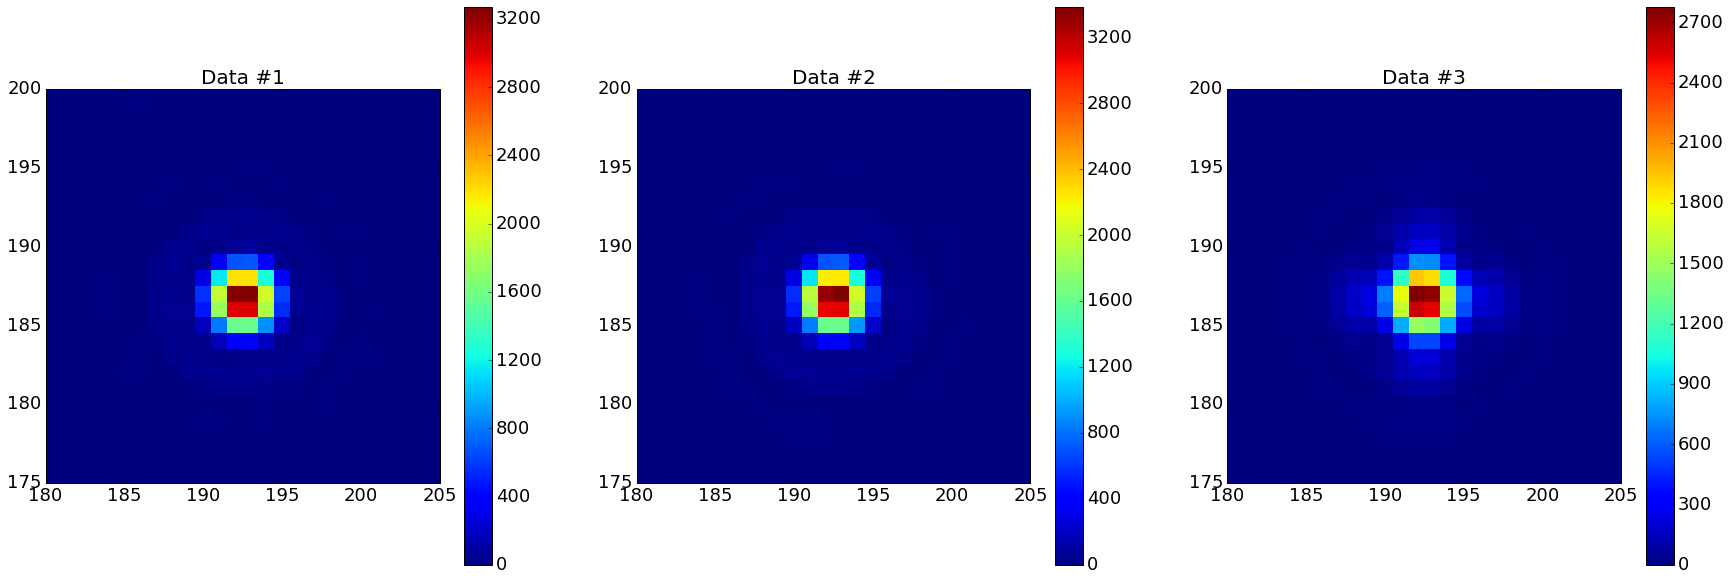

In [26]:
xlim = (180,205)
ylim = (175,200)

##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #1')
plt.imshow(data_01_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_01_rot))

plt.subplot(132); plt.title('Data #2')
plt.imshow(data_02_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_02_rot))

plt.subplot(133); plt.title('Data #3')
plt.imshow(data_03_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_03_rot))

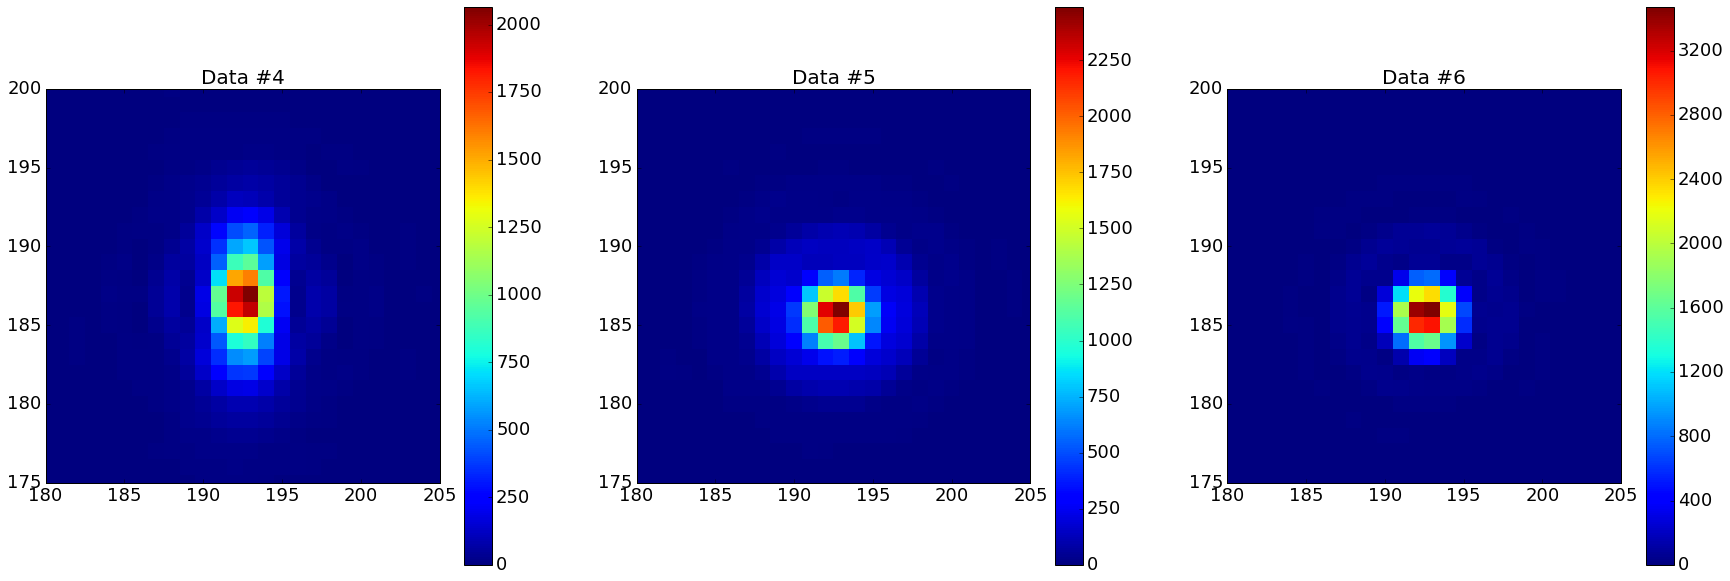

In [27]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #4')
plt.imshow(data_04_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_04_rot))

plt.subplot(132); plt.title('Data #5')
plt.imshow(data_05_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_05_rot))

plt.subplot(133); plt.title('Data #6')
plt.imshow(data_06_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_06_rot))

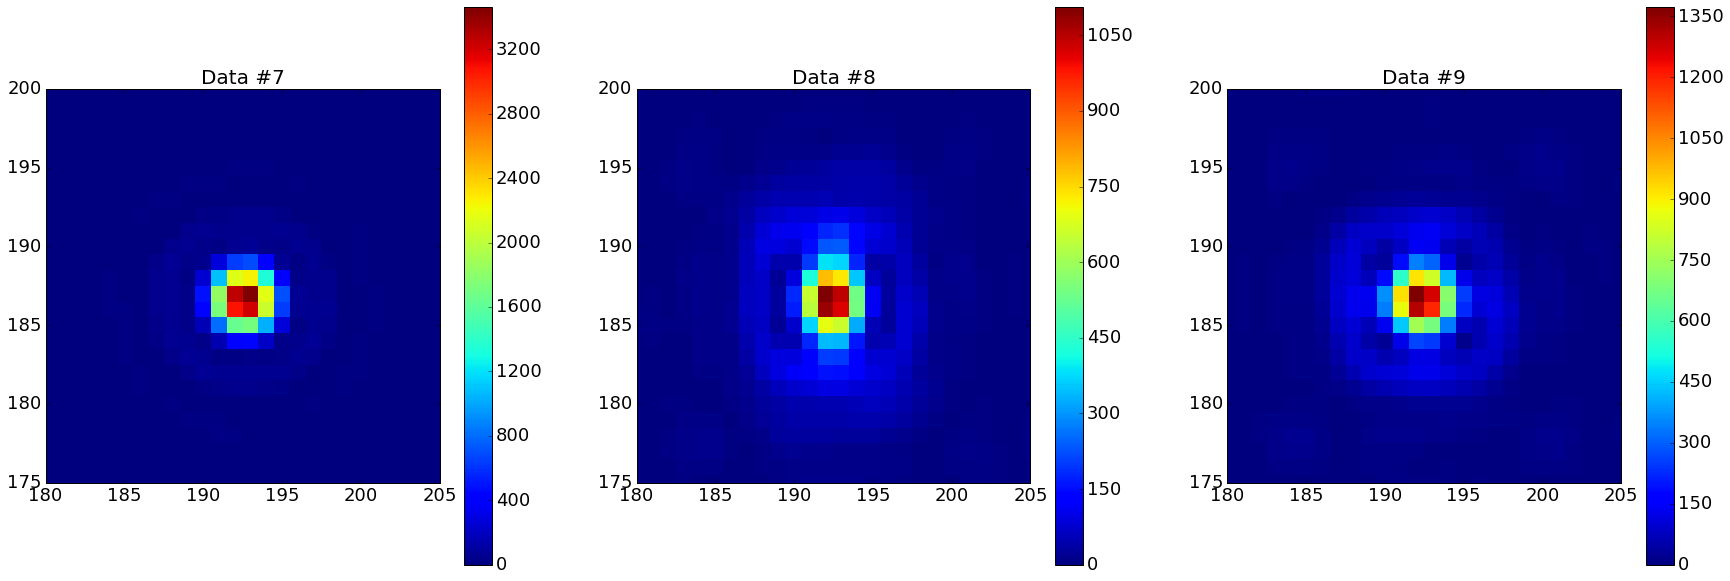

In [28]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #7')
plt.imshow(data_07_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_07_rot))

plt.subplot(132); plt.title('Data #8')
plt.imshow(data_08_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_08_rot))

plt.subplot(133); plt.title('Data #9')
plt.imshow(data_09_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_09_rot))

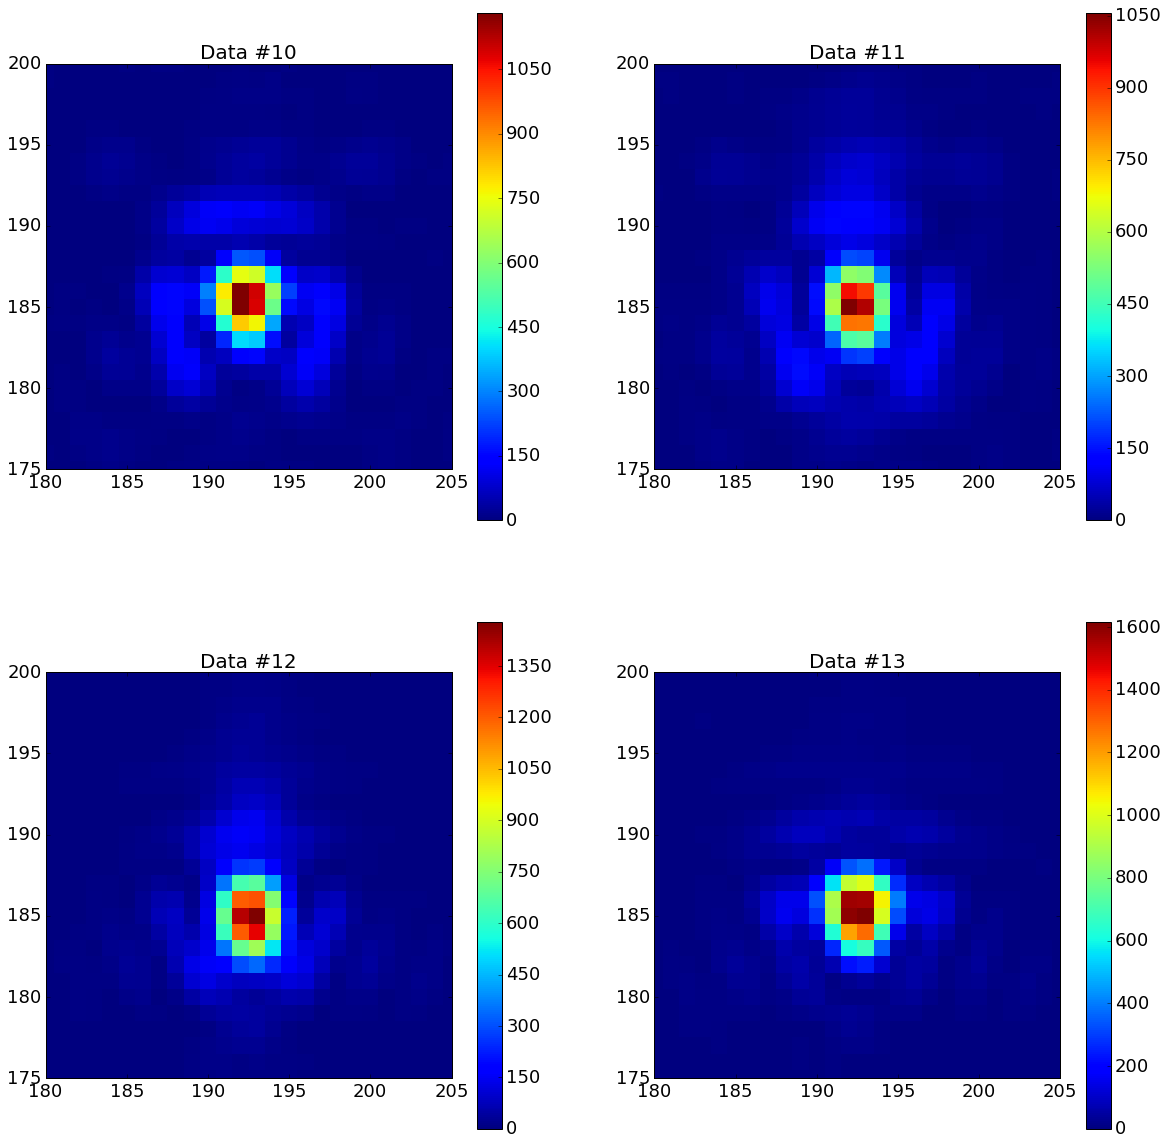

In [35]:
##
plt.figure(figsize=(20,20))
plt.subplot(221); plt.title('Data #10')
plt.imshow(data_10_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_10_rot))

plt.subplot(222); plt.title('Data #11')
plt.imshow(data_11_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_11_rot))

plt.subplot(223); plt.title('Data #12')
plt.imshow(data_12_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_12_rot))

plt.subplot(224); plt.title('Data #13')
plt.imshow(data_13_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_13_rot))

#### Sinusoidal cases
_[(Back to top)](#Contents)_

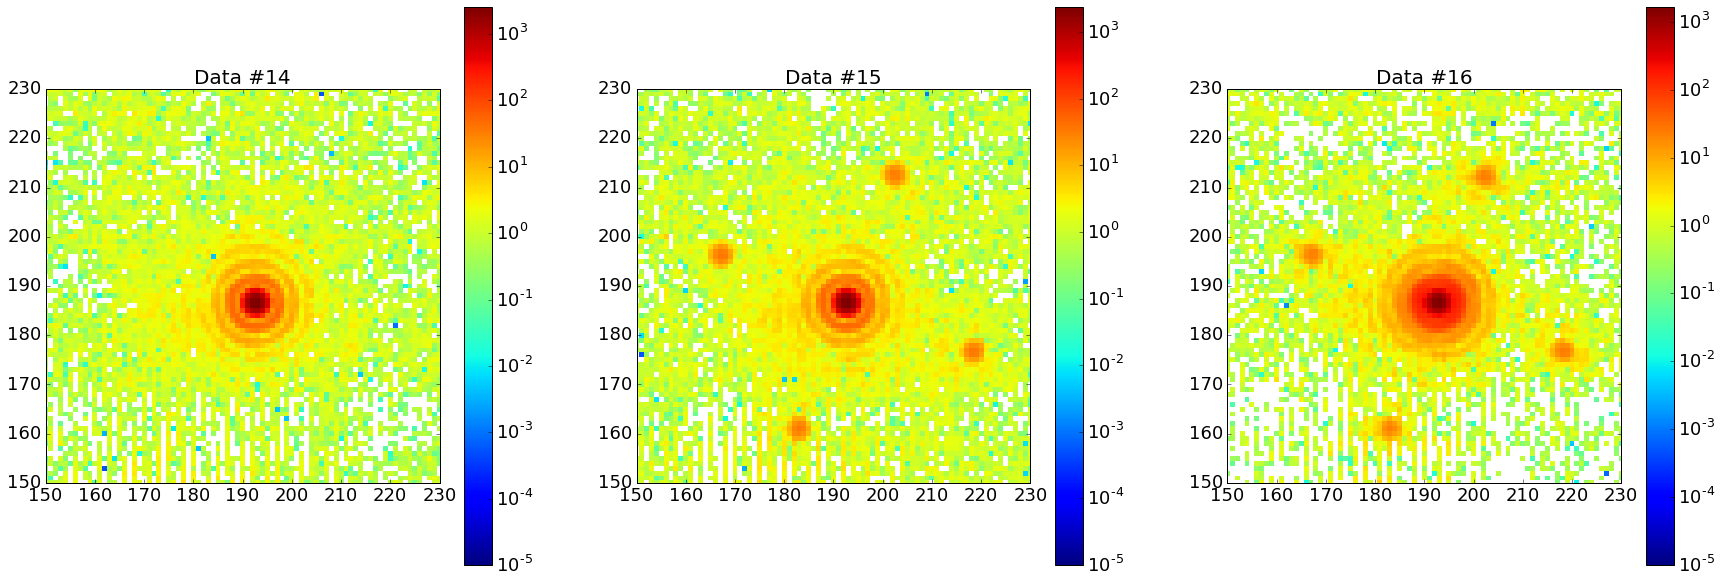

In [36]:
##
xlim3 = (150,230)
ylim3 = (150,230)

##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #14')
plt.imshow(data_14_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_14_rot))

plt.subplot(132); plt.title('Data #15')
plt.imshow(data_15_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_15_rot))

plt.subplot(133); plt.title('Data #16')
plt.imshow(data_16_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_16_rot))

Data #14 is as reported, can't see anything. I'll still run it regardless of this

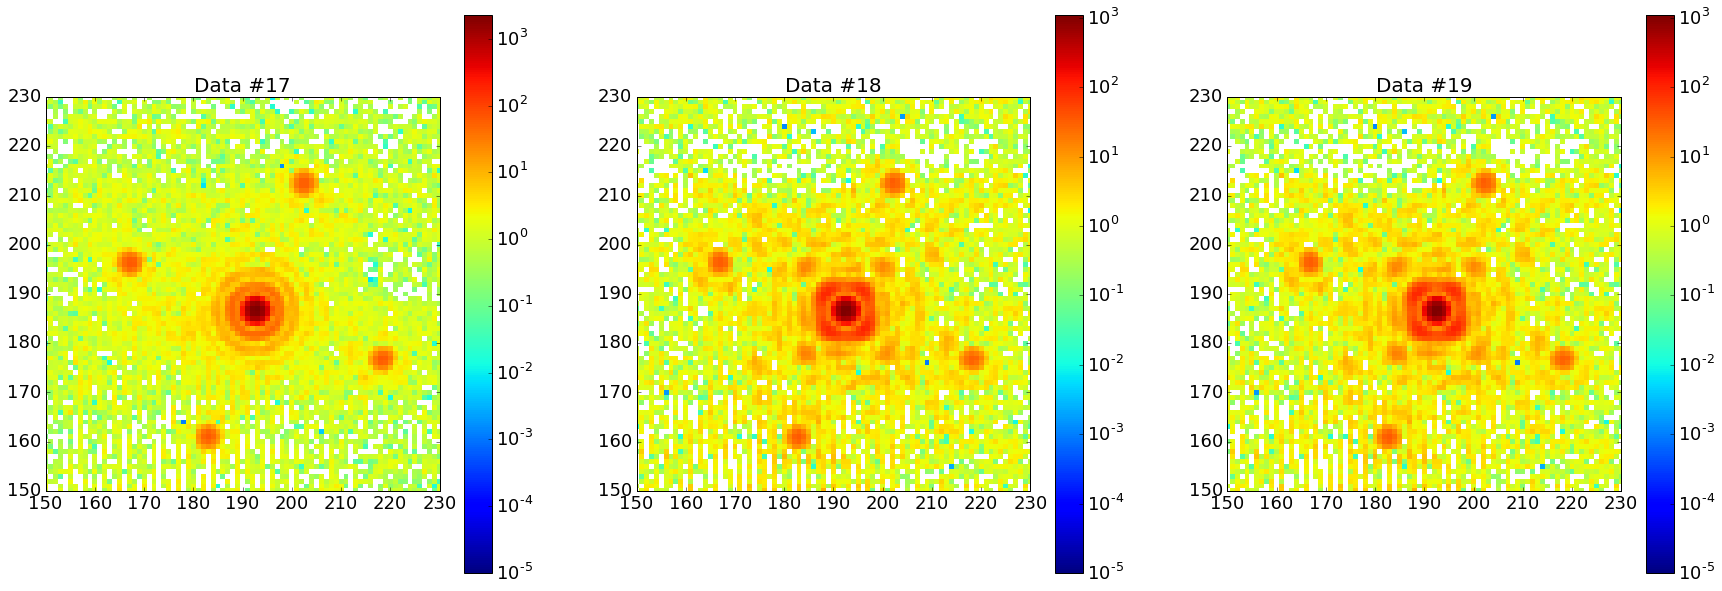

In [37]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #17')
plt.imshow(data_17_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_17_rot))

plt.subplot(132); plt.title('Data #18')
plt.imshow(data_18_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_18_rot))

plt.subplot(133); plt.title('Data #19')
plt.imshow(data_19_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_19_rot))

Let the centers to be (193,186), for all data images.

---
## Defining "oversampling" for PR purpose
** *See the original [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling.ipynb)* **


In our cases, for example, the oversampling (from rotated images) to input to PR routines is 4/2.4~1.67

_[(Back to top)](#Contents)_

---
## <font color="blue">Windowing</font>
Circular windowing. But need different sizes for the Zernike combinations and the sinusoidals (larger)

### Applying circular windows
#### Applying to Zernike mode combinations

In [38]:
Npix = 512
size = 20

ctx,cty = 193, 186

##
data_01_clp = clipping(data_01_rot,Npix=Npix,center=(ctx,cty),size=size)
data_02_clp = clipping(data_02_rot,Npix=Npix,center=(ctx,cty),size=size)
data_03_clp = clipping(data_03_rot,Npix=Npix,center=(ctx,cty),size=size)
data_04_clp = clipping(data_04_rot,Npix=Npix,center=(ctx,cty),size=size)
data_05_clp = clipping(data_05_rot,Npix=Npix,center=(ctx,cty),size=size)
data_06_clp = clipping(data_06_rot,Npix=Npix,center=(ctx,cty),size=size)
data_07_clp = clipping(data_07_rot,Npix=Npix,center=(ctx,cty),size=size)
data_08_clp = clipping(data_08_rot,Npix=Npix,center=(ctx,cty),size=size)
data_09_clp = clipping(data_09_rot,Npix=Npix,center=(ctx,cty),size=size)
data_10_clp = clipping(data_10_rot,Npix=Npix,center=(ctx,cty),size=size)
data_11_clp = clipping(data_11_rot,Npix=Npix,center=(ctx,cty),size=size)
data_12_clp = clipping(data_12_rot,Npix=Npix,center=(ctx,cty),size=size)
data_13_clp = clipping(data_13_rot,Npix=Npix,center=(ctx,cty),size=size)

#### Sinusoidals

In [39]:
size2 = 80
data_14_clp = clipping(data_14_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_15_clp = clipping(data_15_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_16_clp = clipping(data_16_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_17_clp = clipping(data_17_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_18_clp = clipping(data_18_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_19_clp = clipping(data_19_rot,Npix=Npix,center=(ctx,cty),size=size2)

_[(Back to top)](#Contents)_

### Checks
#### Modes

(220, 290)

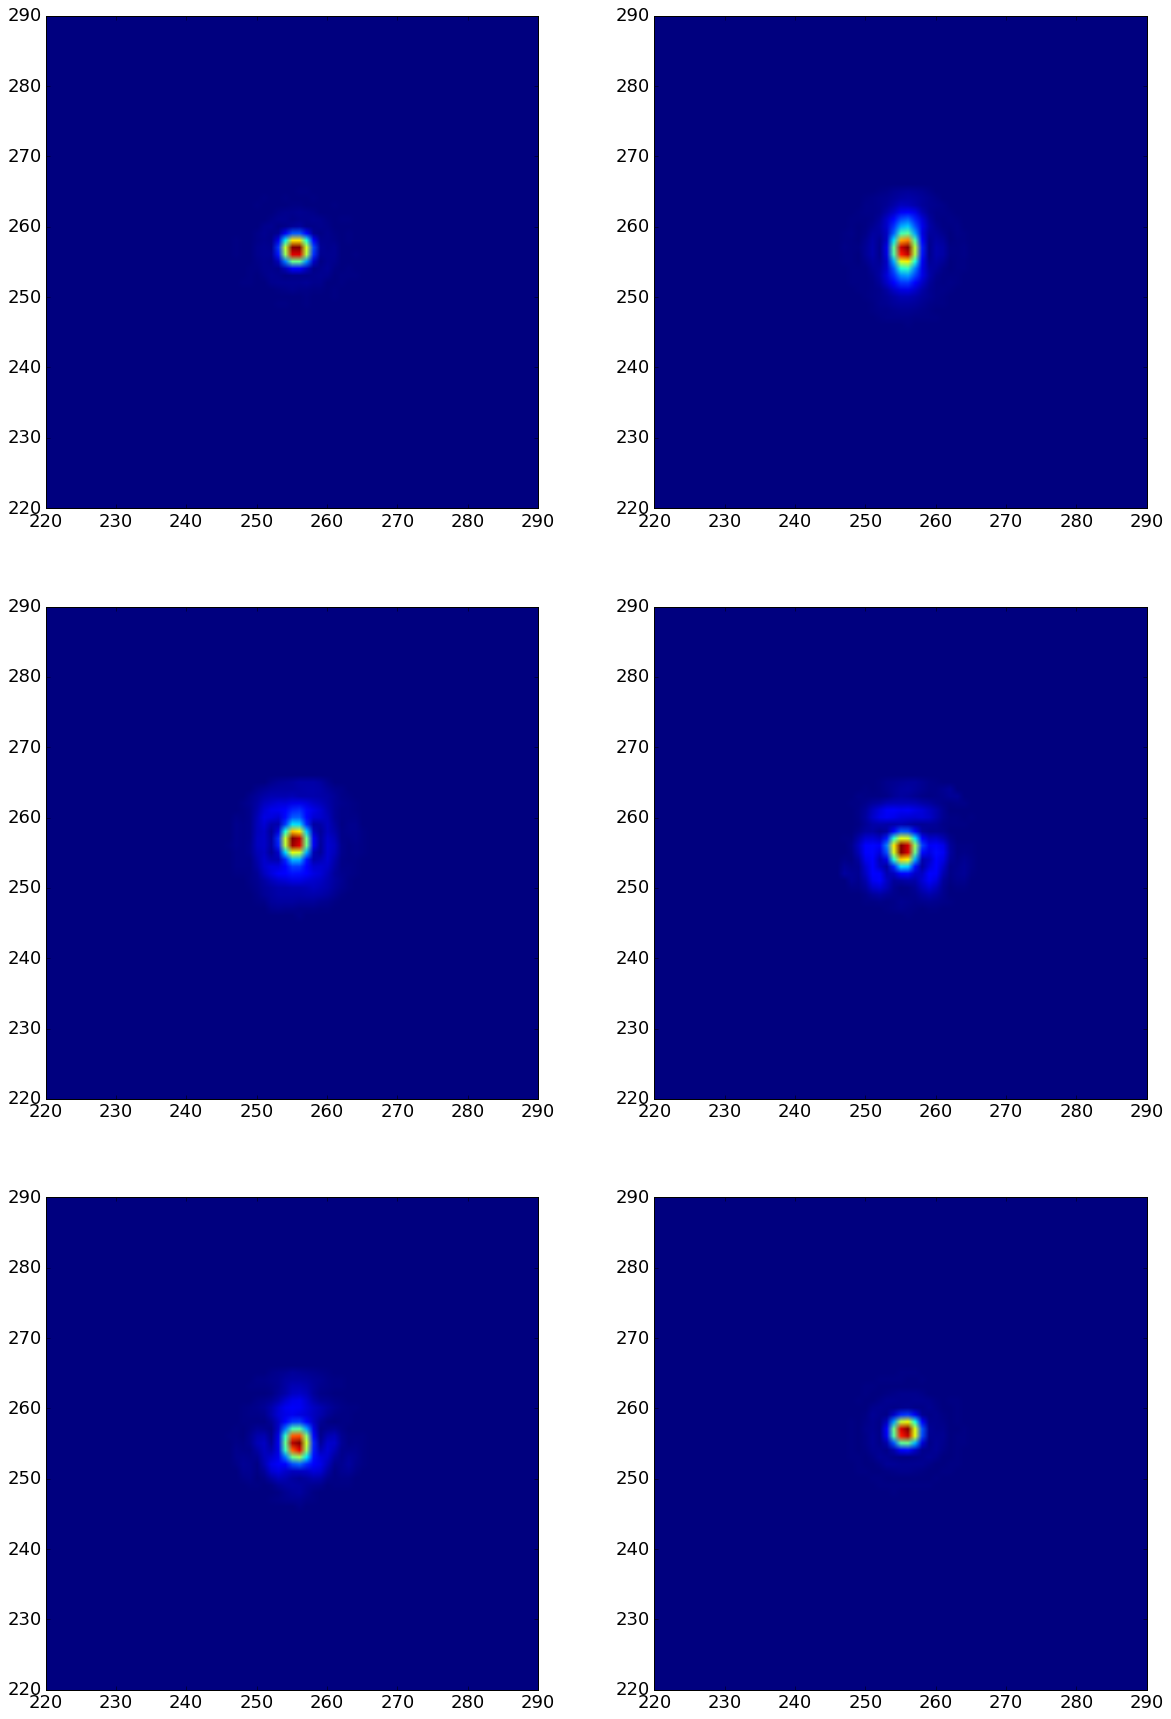

In [41]:
plt.figure(figsize=(20,30))
plt.subplot(321); plt.imshow(data_01_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(322); plt.imshow(data_04_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(323); plt.imshow(data_08_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(324); plt.imshow(data_10_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(325); plt.imshow(data_12_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(326); plt.imshow(data_14_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

This window size may be too small for some cases which possess larger aberrations. Will see

#### Sines

(220, 290)

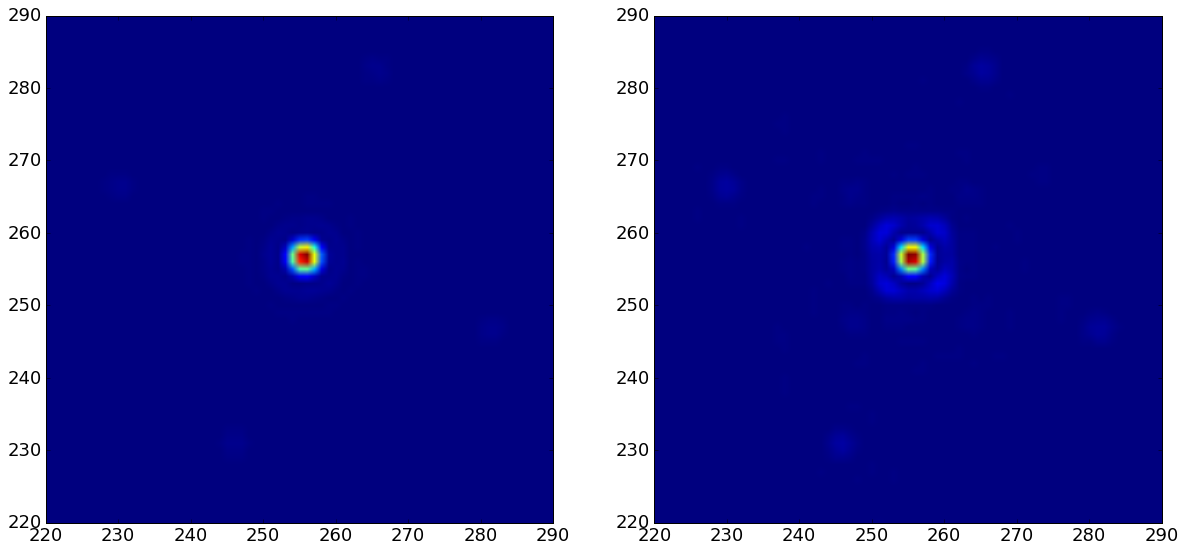

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(data_15_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(122); plt.imshow(data_18_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

OKay. The spots are within the window...

_[(Back to top)](#Contents)_

---
## Orientaion
Before diving into phase retrieval, let's make sure the written coefficients do produce the same PSFs as measured, in terms of orientation

It seems difficult to generate sine waves by finite Zernike modes so I omit them

In [43]:
## convert rms aberration to phase angle
conf = lambda x: x/wvl * 2*np.pi

### Generate true images

In [67]:
%%capture
os  = 1.665
os2 = 1.66
Npix = 154
c1 = [0.]*35

## data 01
d01_c2 = [0.,0.,0.,0.,0.,conf(50.)]+[0.]*29
d01_P,d01_P_,d01_F,d01_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d01_c2,oversamp=os)
## data 02
d02_c2 = [0.,0.,0.,0.,0.,conf(50.)]+[0.]*29
d02_P,d02_P_,d02_F,d02_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d02_c2,oversamp=os)
## data 03
d03_c2 = [0.,0.,0.,0.,0.,conf(150.)]+[0.]*29
d03_P,d03_P_,d03_F,d03_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d03_c2,oversamp=os)
## data 04
d04_c2 = [0.,0.,0.,conf(-150.),0.,conf(50.)]+[0.]*29
d04_P,d04_P_,d04_F,d04_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d04_c2,oversamp=os)
## data 05
d05_c2 = [0.,0.,0.,conf(-150.),0.,0.,0.,conf(150.)]+[0.]*27
d05_P,d05_P_,d05_F,d05_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d05_c2,oversamp=os)
## data 06
d06_c2 = [0.,0.,0.,0.,0.,0.,0.,conf(150.)]+[0.]*27
d06_P,d06_P_,d06_F,d06_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d06_c2,oversamp=os)
## data 07
d07_c2 = [0.]*35
d07_P,d07_P_,d07_F,d07_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d07_c2,oversamp=os,max_aberP=.05)
## data 08
d08_c2 = [0.,0.,0.,conf(-150.),0.,conf(150.)]+[0.]*29
d08_P,d08_P_,d08_F,d08_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d08_c2,oversamp=os)
## data 09
d09_c2 = [0.,0.,0.,0.,0.,conf(150.)]+[0.]*29
d09_P,d09_P_,d09_F,d09_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d09_c2,oversamp=os)
## data 10
d10_c2 = [0.,0.,0.,0.,0.,conf(150.), \
          0.,conf(150.),0.,conf(100.),0.,0.,0.,conf(100.)]+[0.]*21
d10_P,d10_P_,d10_F,d10_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d10_c2,oversamp=os)
## data 11
d11_c2 = [0.,0.,0.,conf(-150.),0.,conf(150.), \
          0.,conf(150.),0.,conf(100.),0.,0.,0.,conf(100.)]+[0.]*21
d11_P,d11_P_,d11_F,d11_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d11_c2,oversamp=os)
## data 12
d12_c2 = [0.,0.,0.,conf(-150.),0.,conf(150.), \
          0.,conf(150.),0.,conf(100.),0.,0.,0.,conf(100.)]+[0.]*21
d12_P,d12_P_,d12_F,d12_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d12_c2,oversamp=os)
## data 13
d13_c2 = [0.,0.,0.,0.,0.,conf(150.), \
          0.,conf(150.),0.,conf(100.),0.,0.,0.,conf(100.)]+[0.]*21
d13_P,d13_P_,d13_F,d13_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d13_c2,oversamp=os)

_([Back to top](#Contents))_

### Compare with measured PSFs

(240, 270)

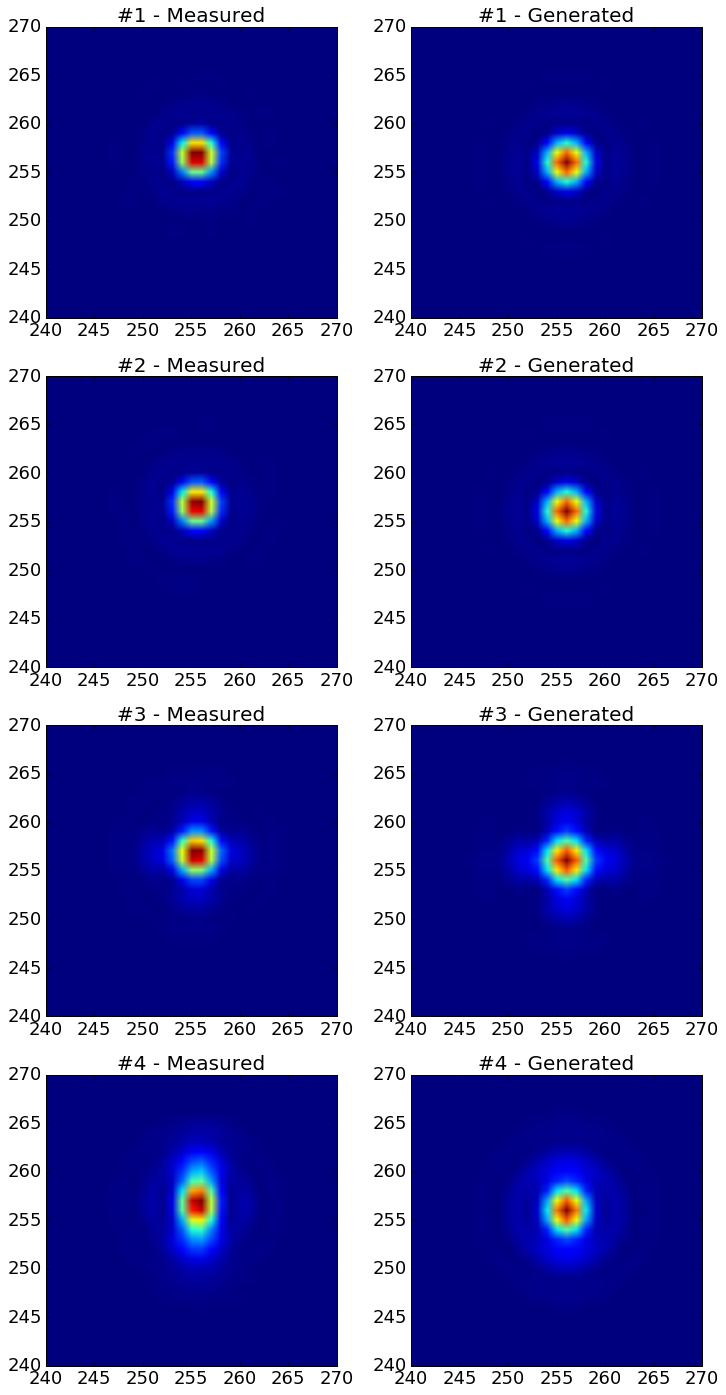

In [68]:
plt.figure(figsize=(12,24))
plt.subplot(421); plt.imshow(data_01_clp,origin='lower'); plt.title('#1 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(422); plt.imshow(d01_F,origin='lower'); plt.title('#1 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(423); plt.imshow(data_02_clp,origin='lower'); plt.title('#2 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(424); plt.imshow(d02_F,origin='lower'); plt.title('#2 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(425); plt.imshow(data_03_clp,origin='lower'); plt.title('#3 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(426); plt.imshow(d03_F,origin='lower'); plt.title('#3 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(427); plt.imshow(data_04_clp,origin='lower'); plt.title('#4 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(428); plt.imshow(d04_F,origin='lower'); plt.title('#4 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

_([Back to top](#Contents))_

---
## <font color="blue">PR</font>
#### <font color="orange">!!! Assumed uniform aperture !!!</font>
> According to headers and data log, this should be true for these data sets.

### Setup

In [54]:
%%capture
d01_PR = PR(foc=data_01_clp,oversamp=os)
d02_PR = PR(foc=data_02_clp,oversamp=os)
d03_PR = PR(foc=data_03_clp,oversamp=os)
d04_PR = PR(foc=data_04_clp,oversamp=os)
d05_PR = PR(foc=data_05_clp,oversamp=os)
d06_PR = PR(foc=data_06_clp,oversamp=os)
d07_PR = PR(foc=data_07_clp,oversamp=os)
d08_PR = PR(foc=data_08_clp,oversamp=os)
d09_PR = PR(foc=data_09_clp,oversamp=os)
d10_PR = PR(foc=data_10_clp,oversamp=os)
d11_PR = PR(foc=data_11_clp,oversamp=os)
d12_PR = PR(foc=data_12_clp,oversamp=os)
d13_PR = PR(foc=data_13_clp,oversamp=os)
d14_PR = PR(foc=data_14_clp,oversamp=os)
d15_PR = PR(foc=data_15_clp,oversamp=os)
d16_PR = PR(foc=data_16_clp,oversamp=os)
d17_PR = PR(foc=data_17_clp,oversamp=os)
d18_PR = PR(foc=data_18_clp,oversamp=os)
d19_PR = PR(foc=data_19_clp,oversamp=os)

### Run

In [57]:
%%capture
d01_p,d01_f,d01_err,d01_pj,d01_errp = d01_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d02_p,d02_f,d02_err,d02_pj,d02_errp = d02_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d03_p,d03_f,d03_err,d03_pj,d03_errp = d03_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d04_p,d04_f,d04_err,d04_pj,d04_errp = d04_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d05_p,d05_f,d05_err,d05_pj,d05_errp = d05_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d06_p,d06_f,d06_err,d06_pj,d06_errp = d06_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d07_p,d07_f,d07_err,d07_pj,d07_errp = d07_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d08_p,d08_f,d08_err,d08_pj,d08_errp = d08_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d09_p,d09_f,d09_err,d09_pj,d09_errp = d09_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d10_p,d10_f,d10_err,d10_pj,d10_errp = d10_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d11_p,d11_f,d11_err,d11_pj,d11_errp = d11_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d12_p,d12_f,d12_err,d12_pj,d12_errp = d12_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d13_p,d13_f,d13_err,d13_pj,d13_errp = d13_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d14_p,d14_f,d14_err,d14_pj,d14_errp = d14_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d15_p,d15_f,d15_err,d15_pj,d15_errp = d15_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d16_p,d16_f,d16_err,d16_pj,d16_errp = d16_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d17_p,d17_f,d17_err,d17_pj,d17_errp = d17_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d18_p,d18_f,d18_err,d18_pj,d18_errp = d18_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [ ]:
%%capture
d19_p,d19_f,d19_err,d19_pj,d19_errp = d19_PR.OSS(beta=0.5,force_only_phase=True,init='random')

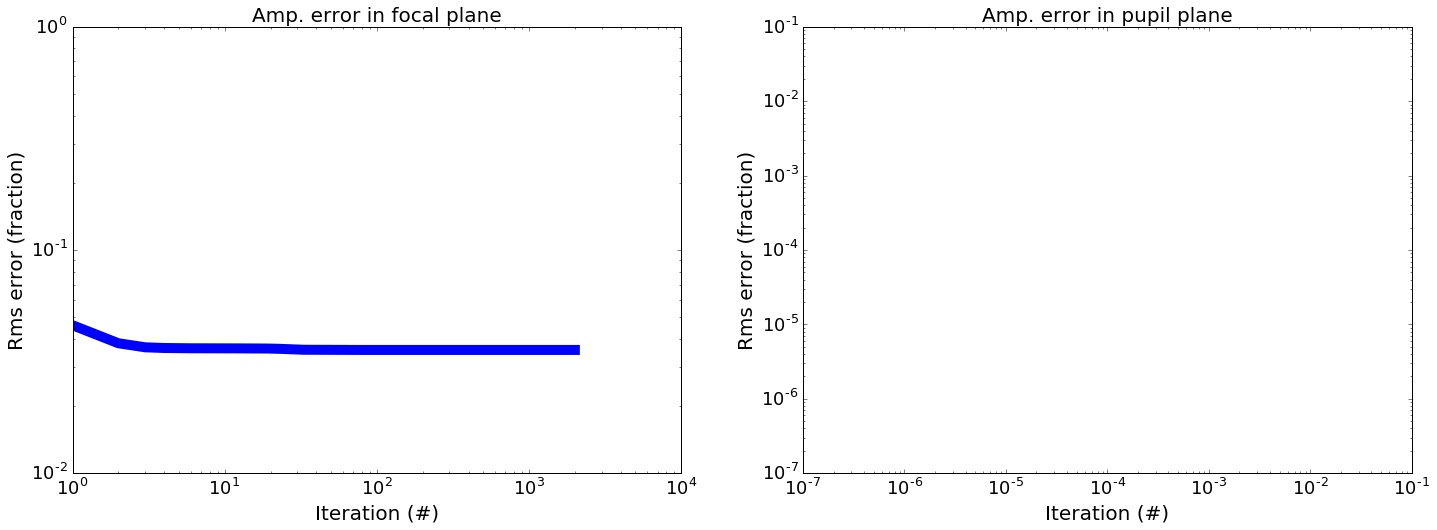

In [93]:
plot_errlist(no_aber_errlist,no_aber_errpuplist)

### Results

_([Back to top](#Contents))_

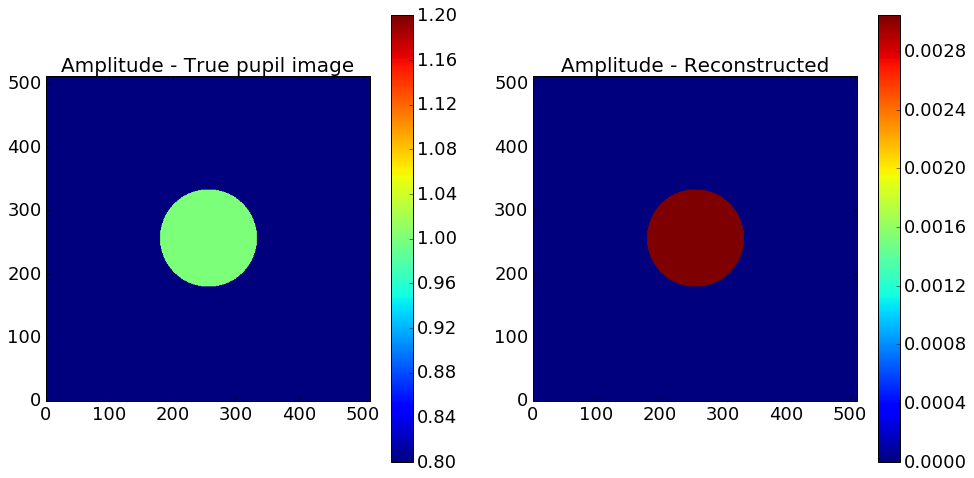

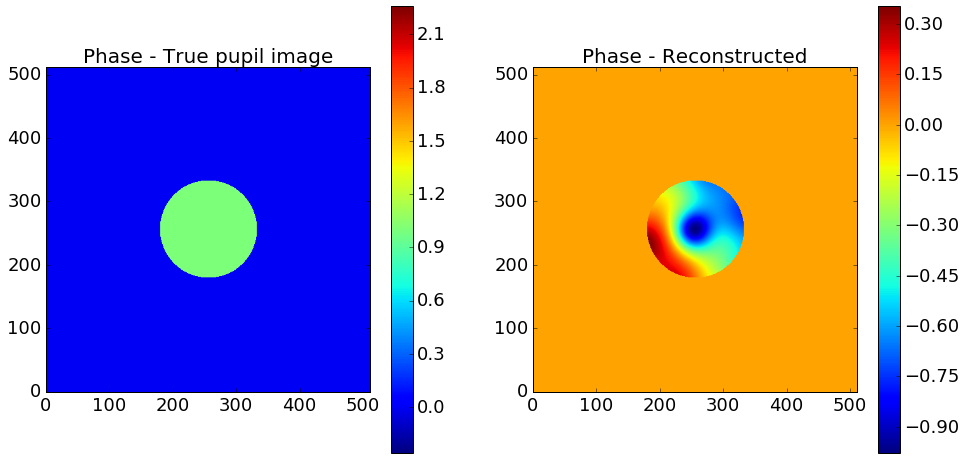

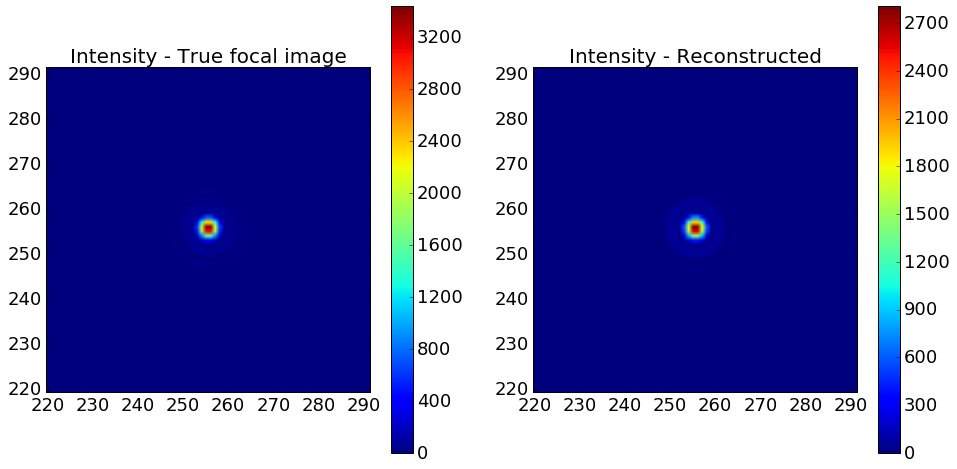

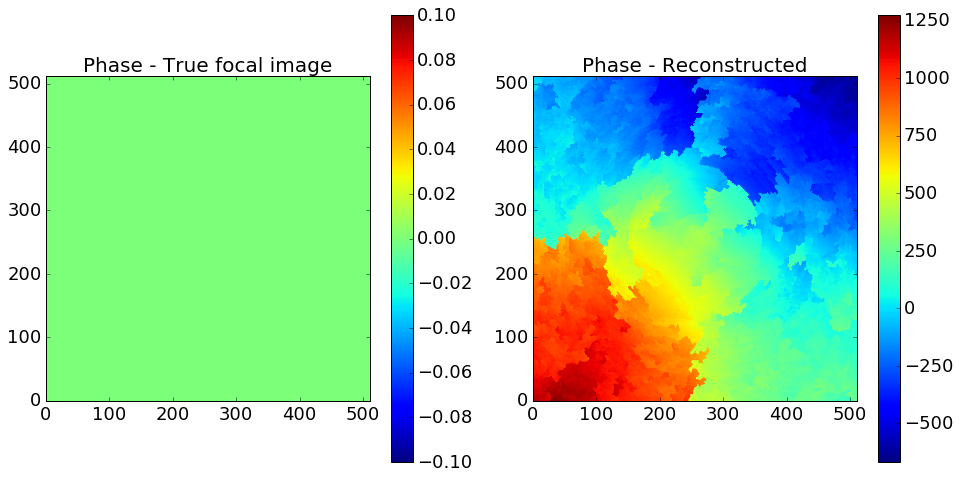

In [199]:
plot_recon(no_aber_P_,np.sqrt(no_aber_PR.foc),no_aber_pup_proj,no_aber_foc)

The PSF is reproduced SUPER detailed... though it seems not "no-aberration" at all.

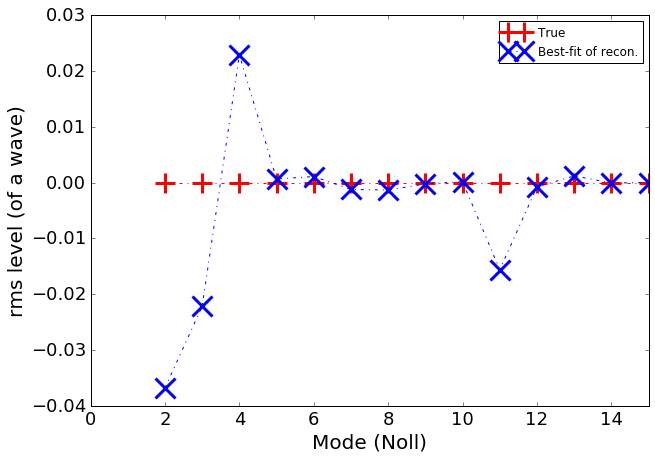

In [211]:
coef_no_aber_true, \
coef_no_aber_reco = wrap_up_zern_fit(no_aber_PR,
                                    Recon_phasor=no_aber_pup_proj,
                                    P_phasor=no_aber_P_,
                                    oversamp=1.66)

#### 2. Plus 300nm
_([Back to top](#Contents))_

In [216]:
plus_300_PR = PR(foc=plus_300_clp,oversamp=oversamp)

## "true" img as per data log
#-- coeff
plus_300_c2 = [0.,0.,0.,-300./wvl * 2*np.pi]+[0.]*31
#--
plus_300_P,plus_300_P_,plus_300_F,plus_300_F_ = true_imgs(Npix=154,
                                                          coeff1=coeff1,
                                                          coeff2=plus_300_c2,
                                                          oversamp=1.665)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


/Library/Python/2.7/site-packages/ipykernel/__main__.py:73: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in true_divide


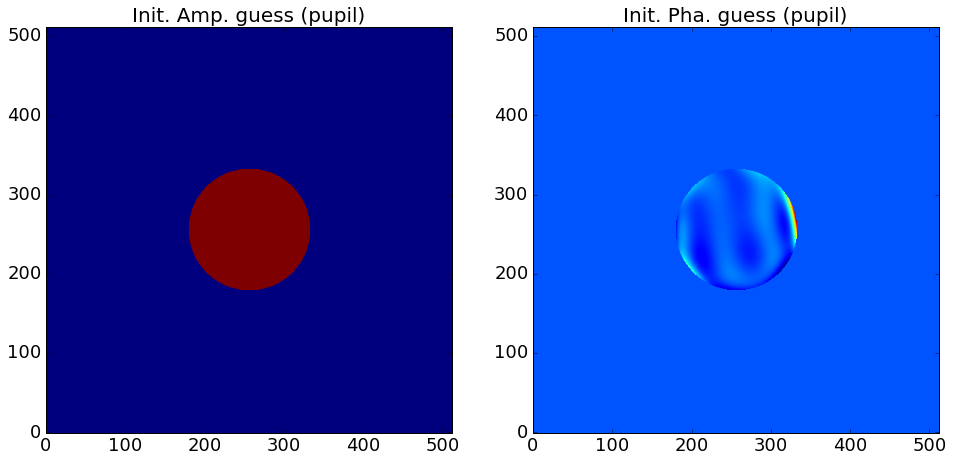

Current filter:


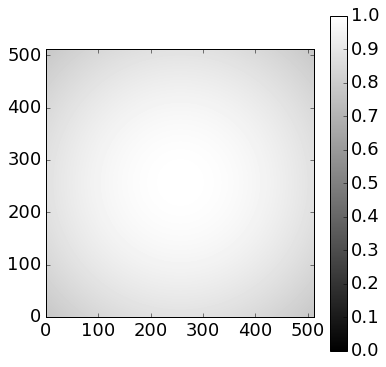

Current iter. : 100
        Error : 3.28e-02
Current iter. : 200
        Error : 3.28e-02
Current filter:


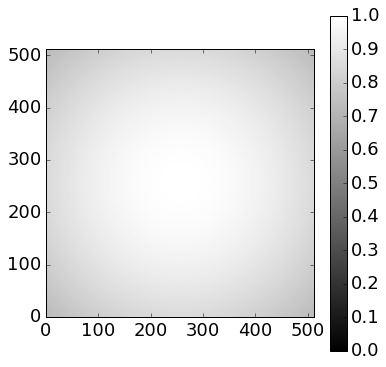

Current iter. : 300
        Error : 3.28e-02
Current iter. : 400
        Error : 3.28e-02
Current filter:


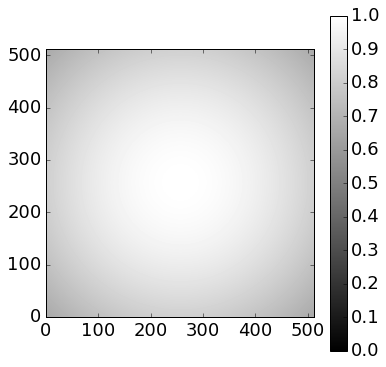

Current iter. : 500
        Error : 3.28e-02
Current iter. : 600
        Error : 3.28e-02
Current filter:


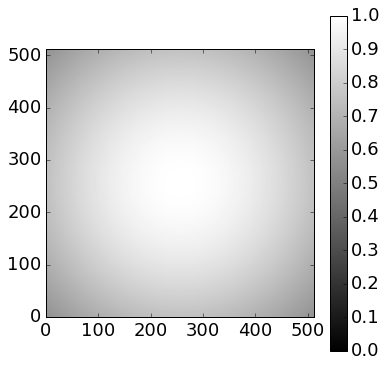

Current iter. : 700
        Error : 3.28e-02
Current iter. : 800
        Error : 3.28e-02
Current filter:


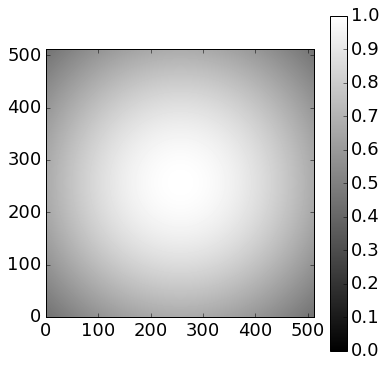

Current iter. : 900
        Error : 3.28e-02
Current iter. : 1000
        Error : 3.28e-02
Current filter:


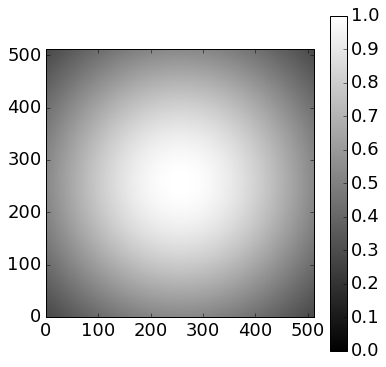

Current iter. : 1100
        Error : 3.28e-02
Current iter. : 1200
        Error : 3.28e-02
Current filter:


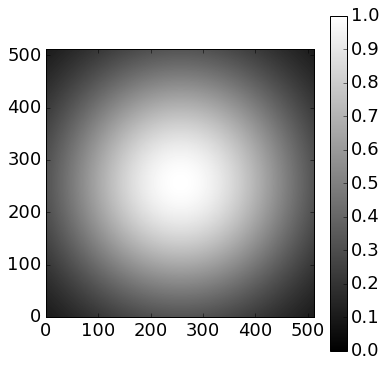

Current iter. : 1300
        Error : 3.28e-02
Current iter. : 1400
        Error : 3.28e-02
Current filter:


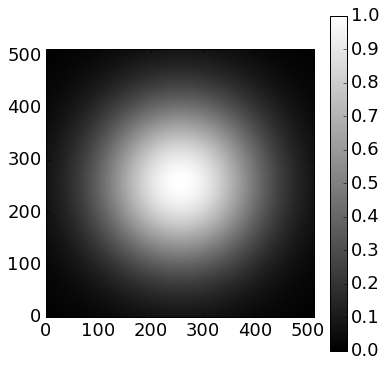

Current iter. : 1500
        Error : 3.28e-02
Current iter. : 1600
        Error : 3.28e-02
Current filter:


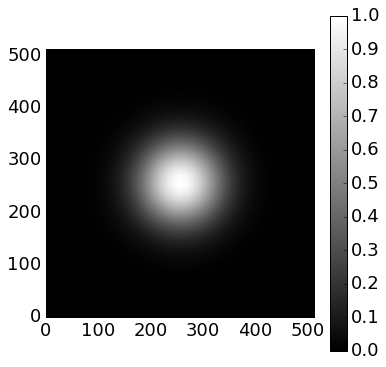

Current iter. : 1700
        Error : 3.28e-02
Current iter. : 1800
        Error : 3.28e-02
Current filter:


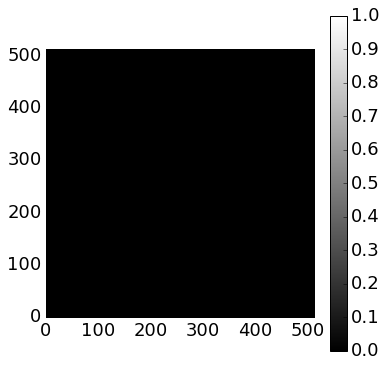

Current iter. : 1900
        Error : 3.28e-02
Current iter. : 2000
        Error : 3.28e-02
-----------------------
First iteration error: 8.40e-02
Final iteration : 2000
Final Error: 3.28e-02


In [96]:
plus_300_pup,plus_300_foc, \
plus_300_errlist, \
plus_300_pup_proj, \
plus_300_errpuplist = plus_300_PR.OSS(beta=0.5,force_only_phase=True,init='random')

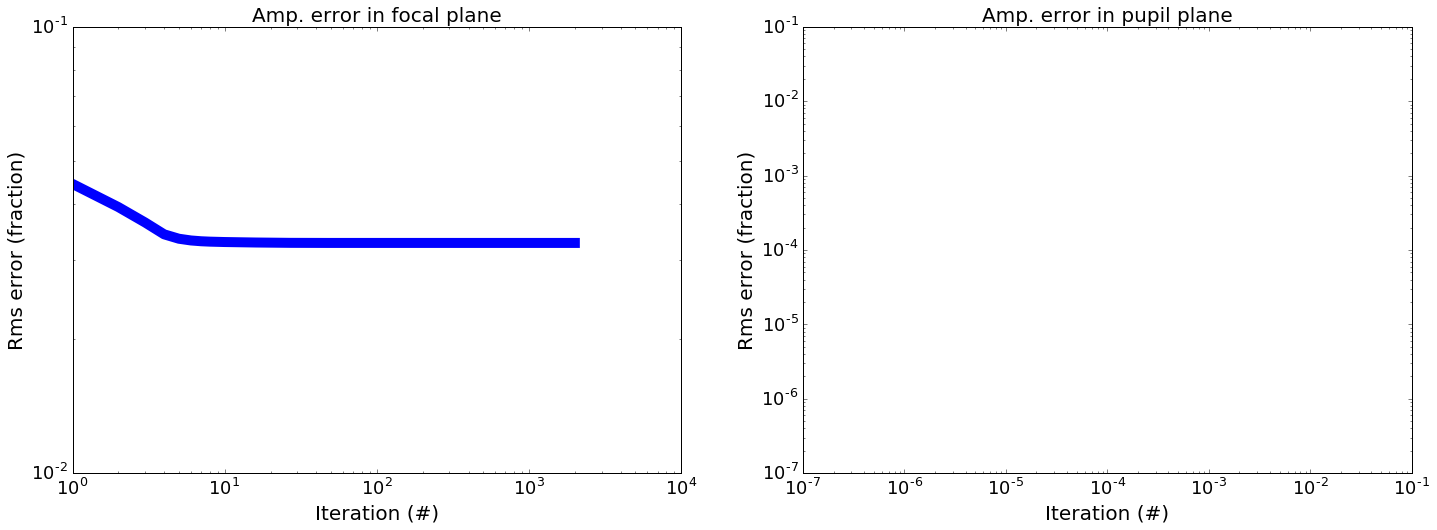

In [97]:
plot_errlist(plus_300_errlist,plus_300_errpuplist)

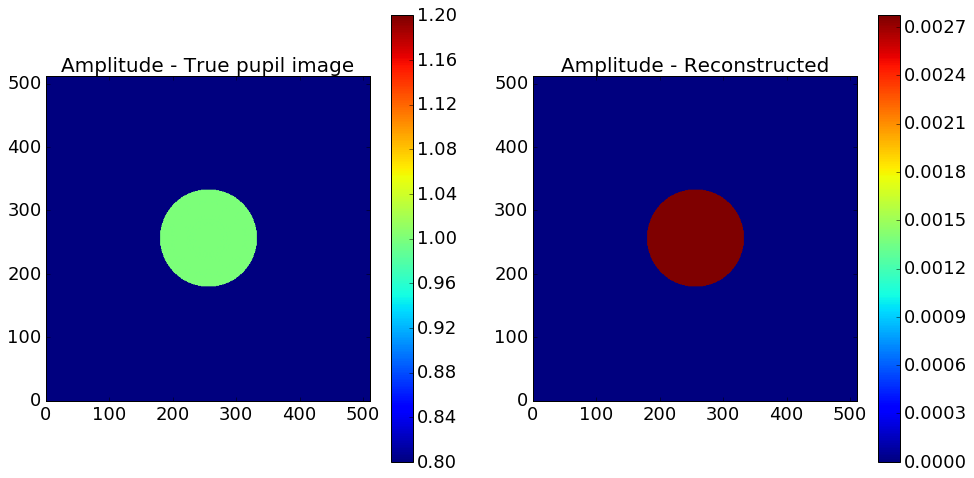

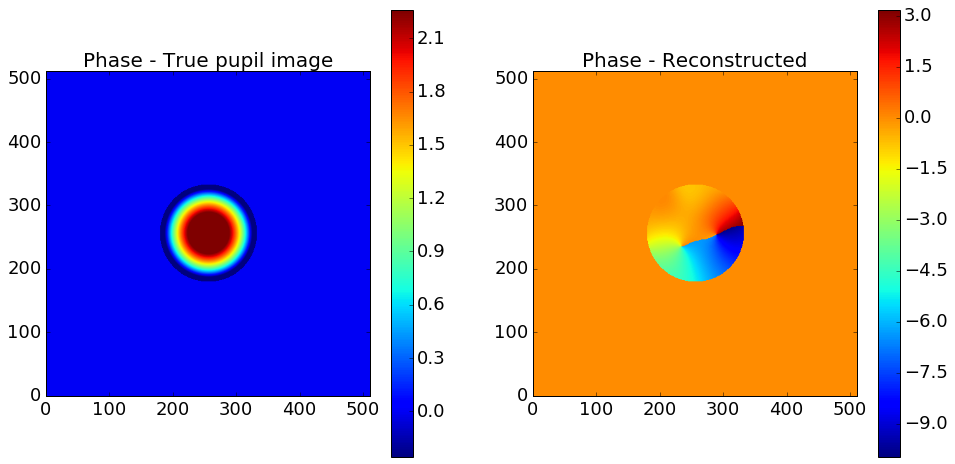

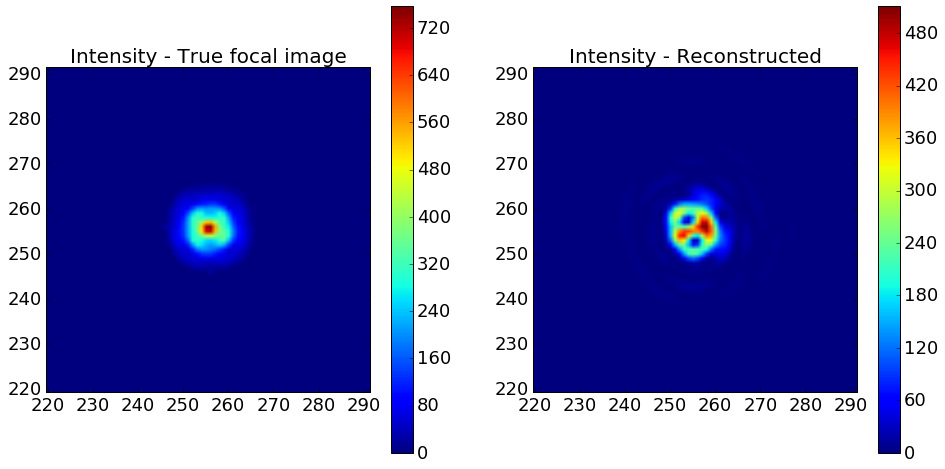

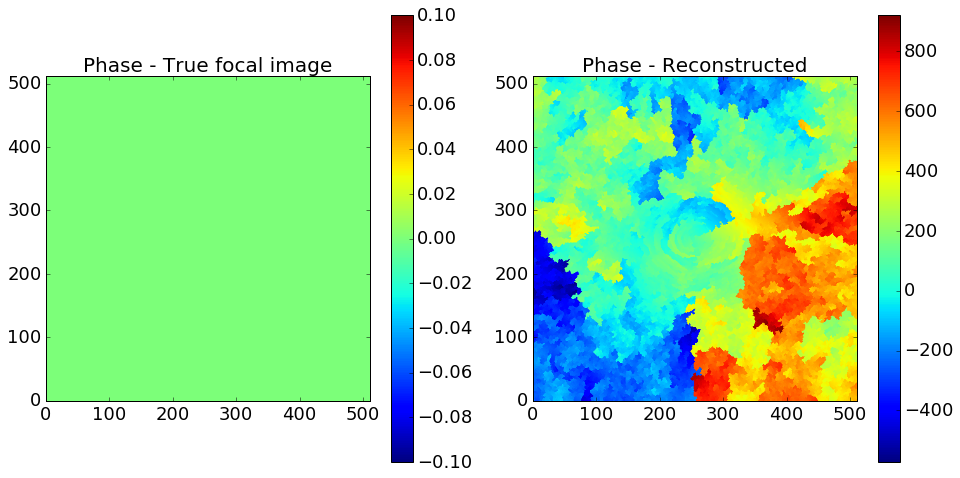

In [217]:
plot_recon(plus_300_P_,np.sqrt(plus_300_PR.foc),plus_300_pup_proj,plus_300_foc)

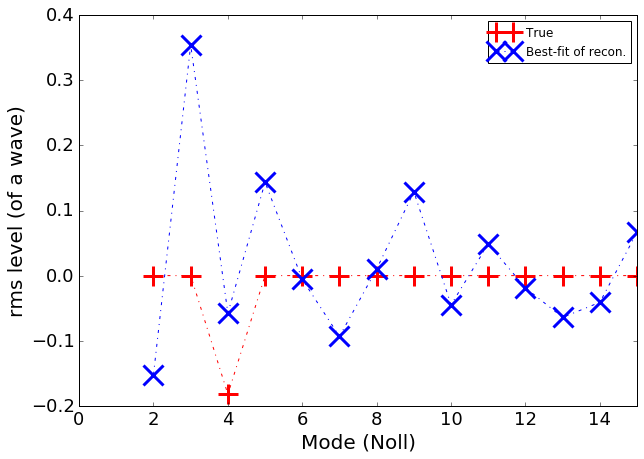

In [218]:
coef_plus_300_true, \
coef_plus_300_reco = wrap_up_zern_fit(plus_300_PR,
                                      Recon_phasor=plus_300_pup_proj,
                                      P_phasor=plus_300_P_,
                                      oversamp=1.66)

:P The window size might be too small. But the artifacts are more suspected. The PSF doesn't look at all like pure defocusing...

#### 3. Ast. 150nm
_([Back to top](#Contents))_

In [219]:
ast_150_PR = PR(foc=ast_150_clp,oversamp=oversamp)

## "true" img as per data log
#-- coeff
ast_150_c2 = [0.,0.,0.,-150./wvl* 2*np.pi,0.,150./wvl* 2*np.pi]+[0.]*29
#--
ast_150_P,ast_150_P_,ast_150_F,ast_150_F_ = true_imgs(Npix=154,
                                                      coeff1=coeff1,
                                                      coeff2=ast_150_c2,
                                                      oversamp=1.665)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


/Library/Python/2.7/site-packages/ipykernel/__main__.py:73: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in true_divide


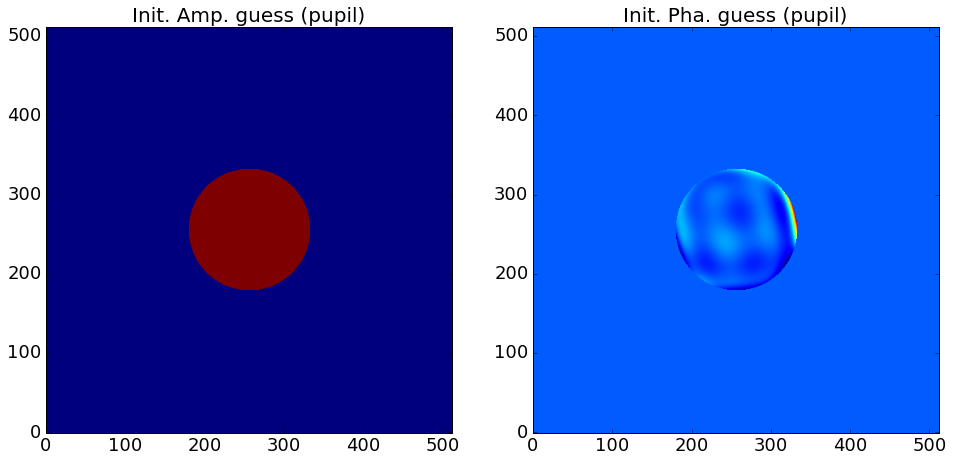

Current filter:


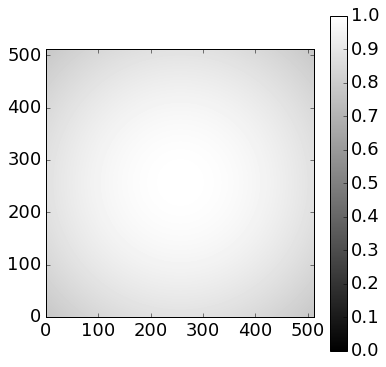

Current iter. : 100
        Error : 2.76e-02
Current iter. : 200
        Error : 2.76e-02
Current filter:


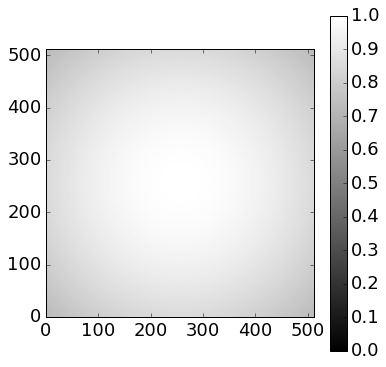

Current iter. : 300
        Error : 2.76e-02
Current iter. : 400
        Error : 2.76e-02
Current filter:


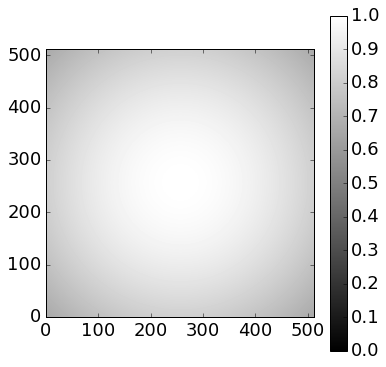

Current iter. : 500
        Error : 2.76e-02
Current iter. : 600
        Error : 2.76e-02
Current filter:


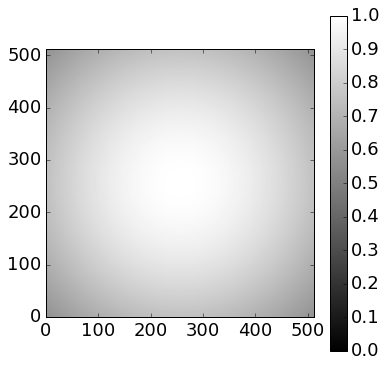

Current iter. : 700
        Error : 2.76e-02
Current iter. : 800
        Error : 2.76e-02
Current filter:


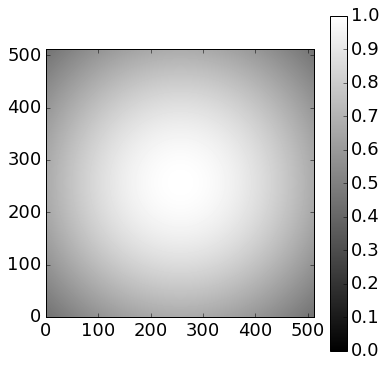

Current iter. : 900
        Error : 2.76e-02
Current iter. : 1000
        Error : 2.76e-02
Current filter:


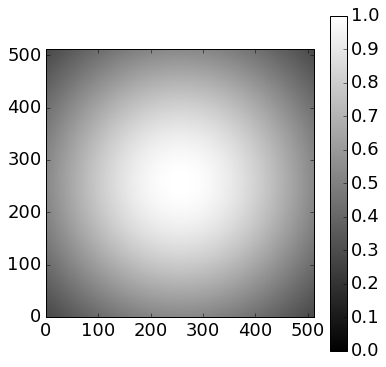

Current iter. : 1100
        Error : 2.76e-02
Current iter. : 1200
        Error : 2.76e-02
Current filter:


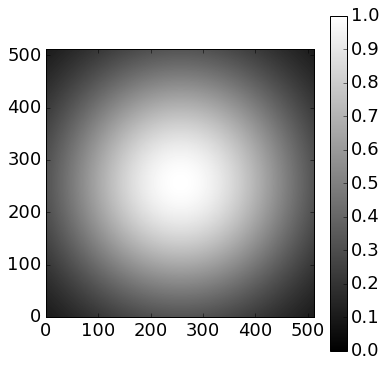

Current iter. : 1300
        Error : 2.76e-02
Current iter. : 1400
        Error : 2.76e-02
Current filter:


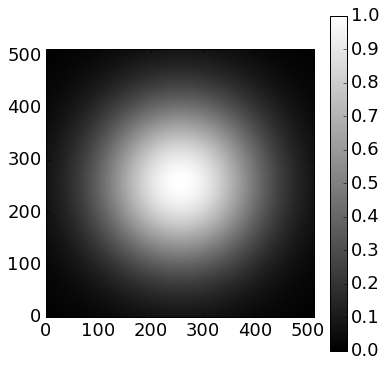

Current iter. : 1500
        Error : 2.76e-02
Current iter. : 1600
        Error : 2.76e-02
Current filter:


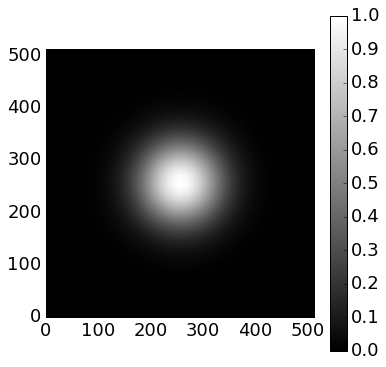

Current iter. : 1700
        Error : 2.76e-02
Current iter. : 1800
        Error : 2.76e-02
Current filter:


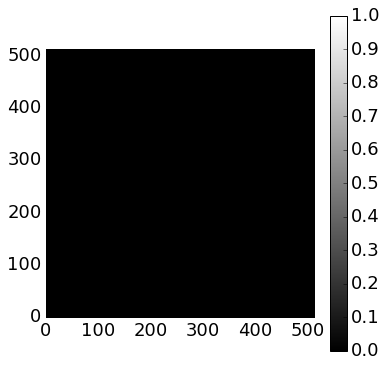

Current iter. : 1900
        Error : 2.76e-02
Current iter. : 2000
        Error : 2.76e-02
-----------------------
First iteration error: 9.45e-02
Final iteration : 2000
Final Error: 2.76e-02


In [101]:
ast_150_pup,ast_150_foc, \
ast_150_errlist, \
ast_150_pup_proj, \
ast_150_errpuplist = ast_150_PR.OSS(beta=0.5,force_only_phase=True,init='random')

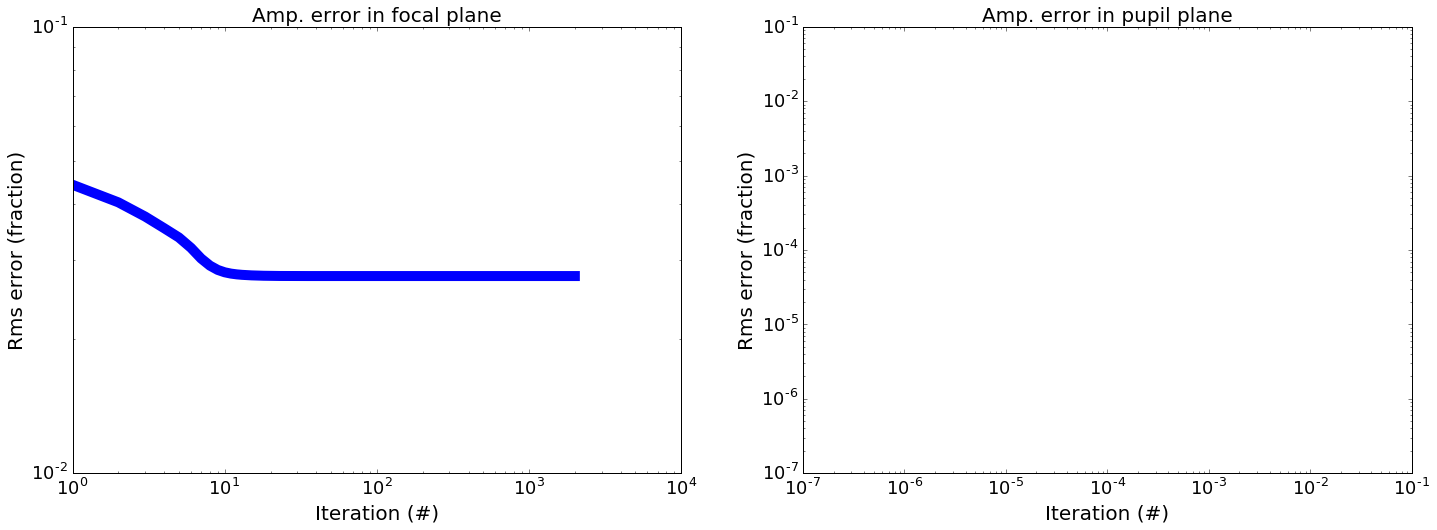

In [102]:
plot_errlist(ast_150_errlist,ast_150_errpuplist)

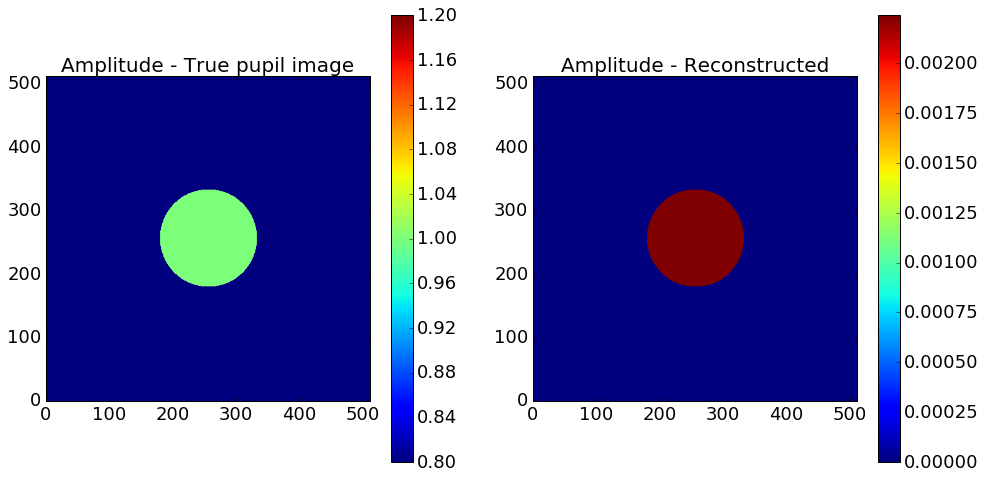

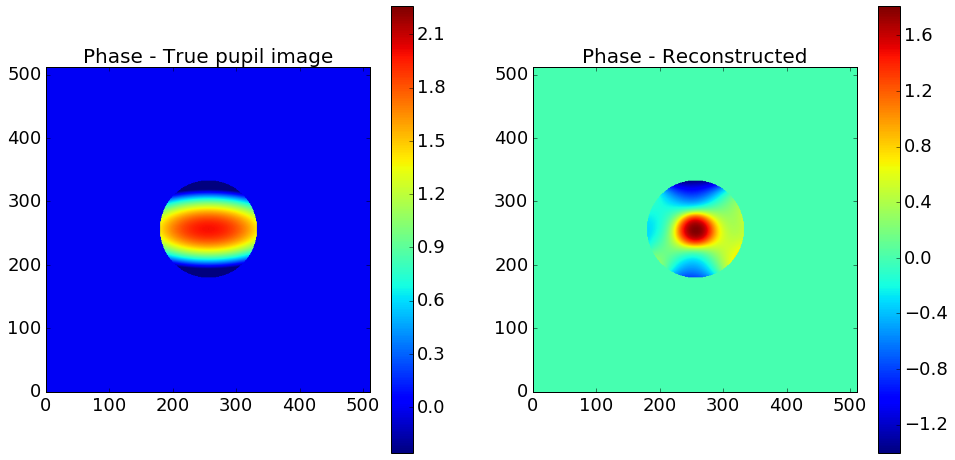

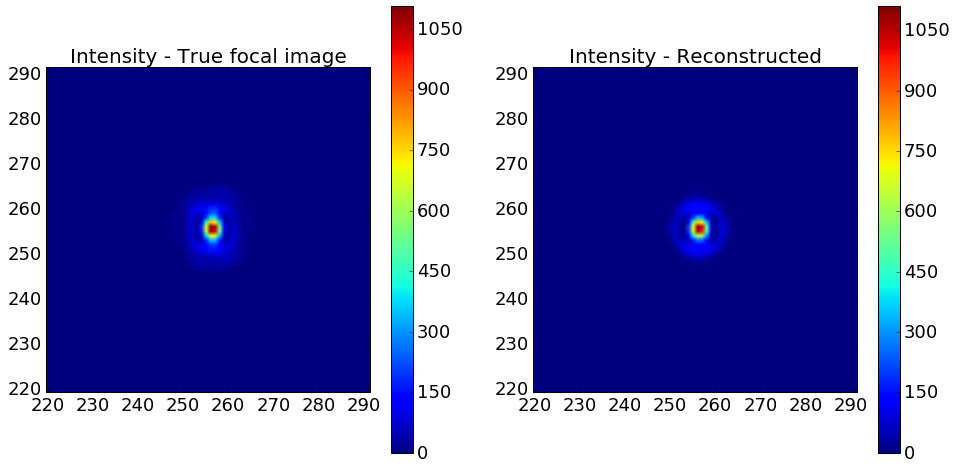

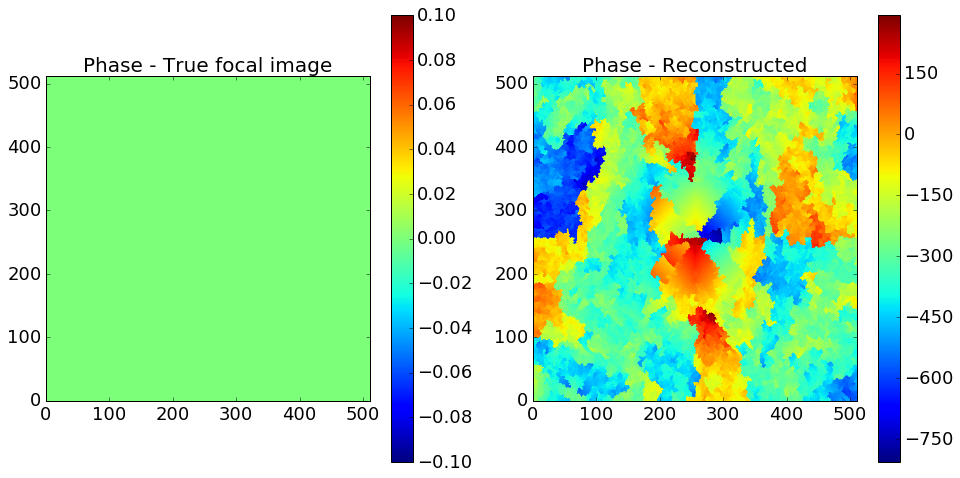

In [220]:
plot_recon(ast_150_P_,np.sqrt(ast_150_PR.foc),ast_150_pup_proj,ast_150_foc)

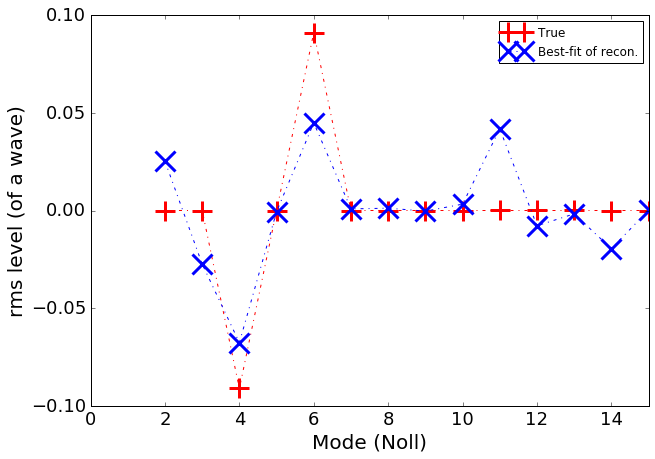

In [221]:
coef_ast_150_true, \
coef_ast_150_reco = wrap_up_zern_fit(ast_150_PR,
                                     Recon_phasor=ast_150_pup_proj,
                                     P_phasor=ast_150_P_,
                                     oversamp=1.66)

Good. We know the data was generated from -150nm defocus (or equivalently +150nm focus) and 150nm astigmatism!

#### 4. Ast. 50nm only
_Note: I think the log somehow mistook 2,-2 as 2,2 ast._

_([Back to top](#Contents))_

In [228]:
ast_50_PR = PR(foc=ast_50_clp,oversamp=oversamp)

## "true" img as per data log
#-- coeff
ast_50_c2 = [0.,0.,0.,0.,50./wvl* 2*np.pi,0.]+[0.]*29
#--
ast_50_P,ast_50_P_,ast_50_F,ast_50_F_ = true_imgs(Npix=154,
                                                  coeff1=coeff1,
                                                  coeff2=ast_50_c2,
                                                  oversamp=1.665)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


/Library/Python/2.7/site-packages/ipykernel/__main__.py:73: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in true_divide


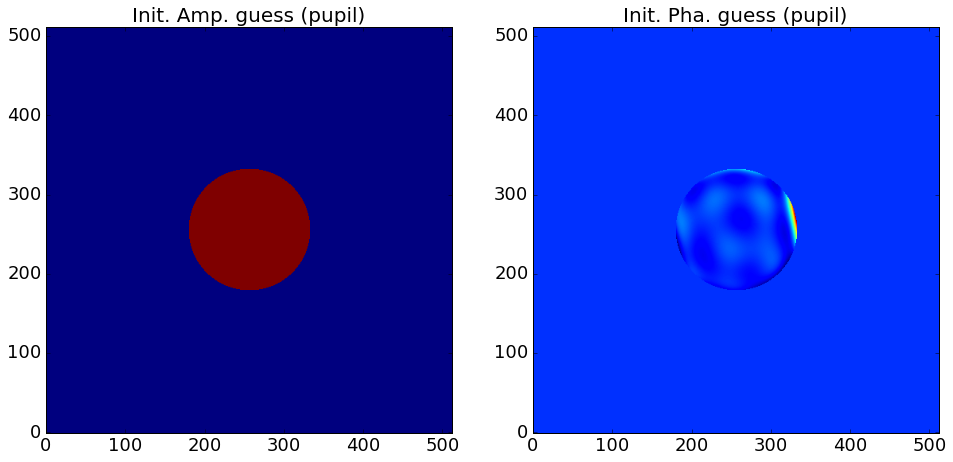

Current filter:


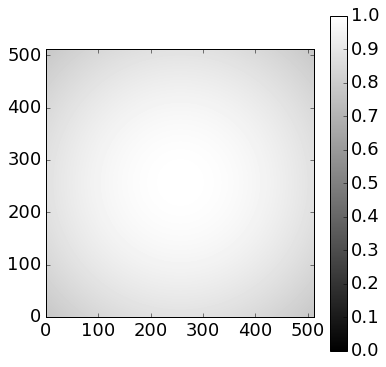

Current iter. : 100
        Error : 2.73e-02
Current iter. : 200
        Error : 2.73e-02
Current filter:


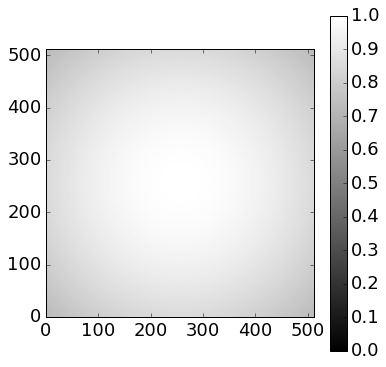

Current iter. : 300
        Error : 2.73e-02
Current iter. : 400
        Error : 2.73e-02
Current filter:


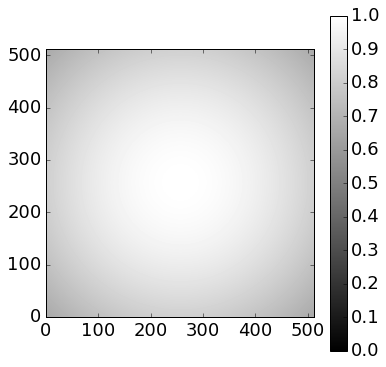

Current iter. : 500
        Error : 2.73e-02
Current iter. : 600
        Error : 2.73e-02
Current filter:


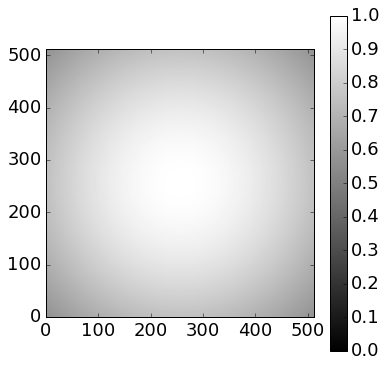

Current iter. : 700
        Error : 2.73e-02
Current iter. : 800
        Error : 2.73e-02
Current filter:


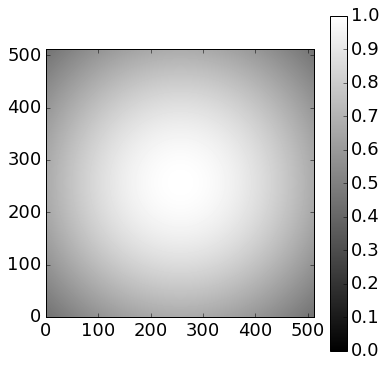

Current iter. : 900
        Error : 2.73e-02
Current iter. : 1000
        Error : 2.73e-02
Current filter:


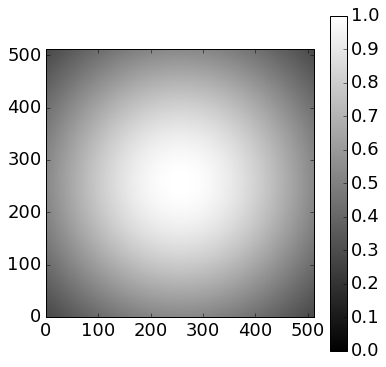

Current iter. : 1100
        Error : 2.73e-02
Current iter. : 1200
        Error : 2.73e-02
Current filter:


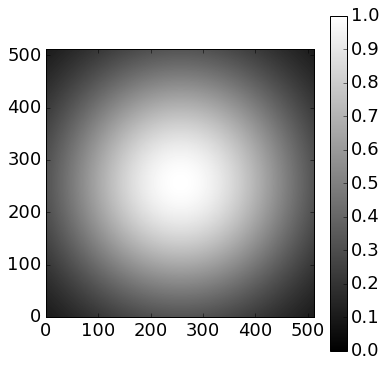

Current iter. : 1300
        Error : 2.73e-02
Current iter. : 1400
        Error : 2.73e-02
Current filter:


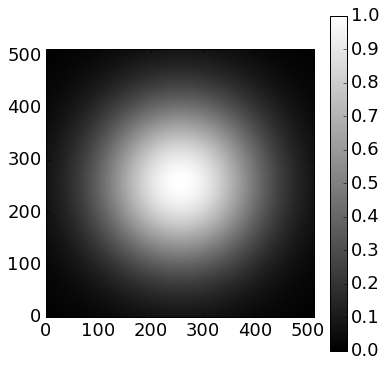

Current iter. : 1500
        Error : 2.73e-02
Current iter. : 1600
        Error : 2.73e-02
Current filter:


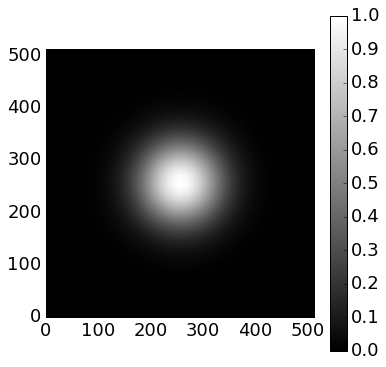

Current iter. : 1700
        Error : 2.73e-02
Current iter. : 1800
        Error : 2.73e-02
Current filter:


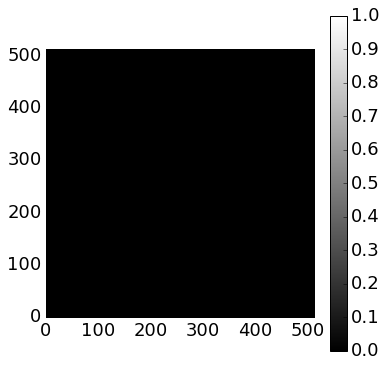

Current iter. : 1900
        Error : 2.73e-02
Current iter. : 2000
        Error : 2.73e-02
-----------------------
First iteration error: 1.20e-01
Final iteration : 2000
Final Error: 2.73e-02


In [156]:
ast_50_pup,ast_50_foc, \
ast_50_errlist, \
ast_50_pup_proj, \
ast_50_errpuplist = ast_50_PR.OSS(beta=0.5,force_only_phase=True,init='random')

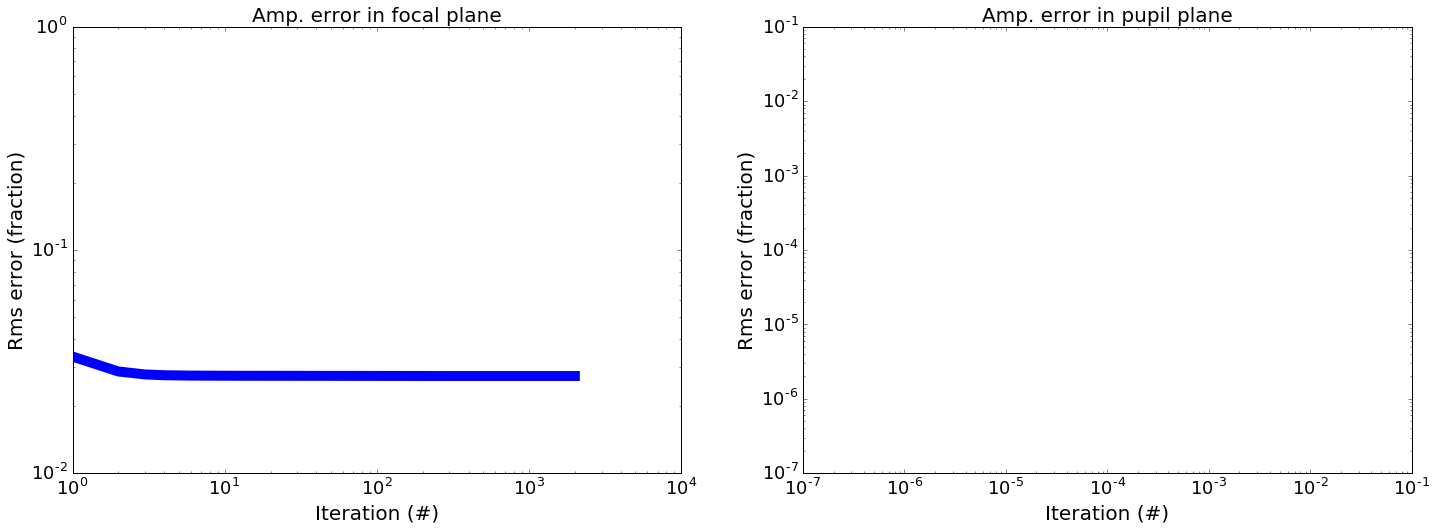

In [157]:
plot_errlist(ast_50_errlist,ast_50_errpuplist)

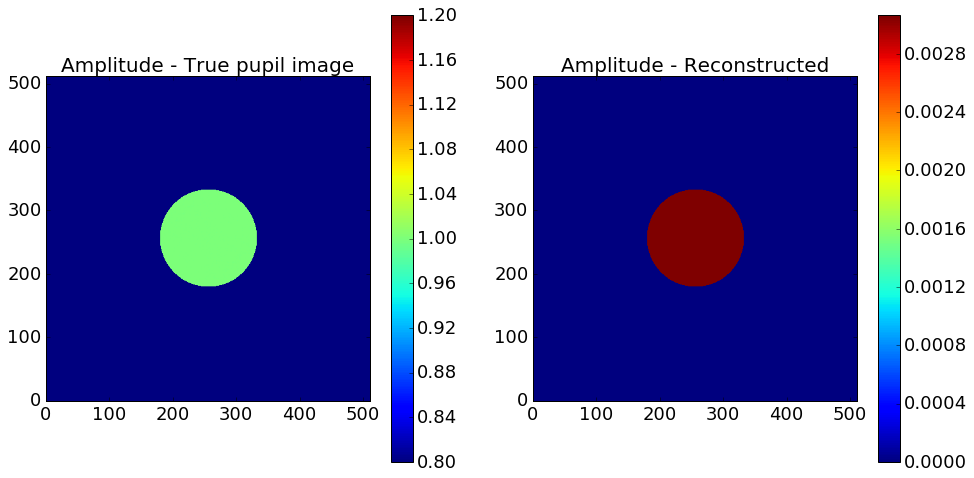

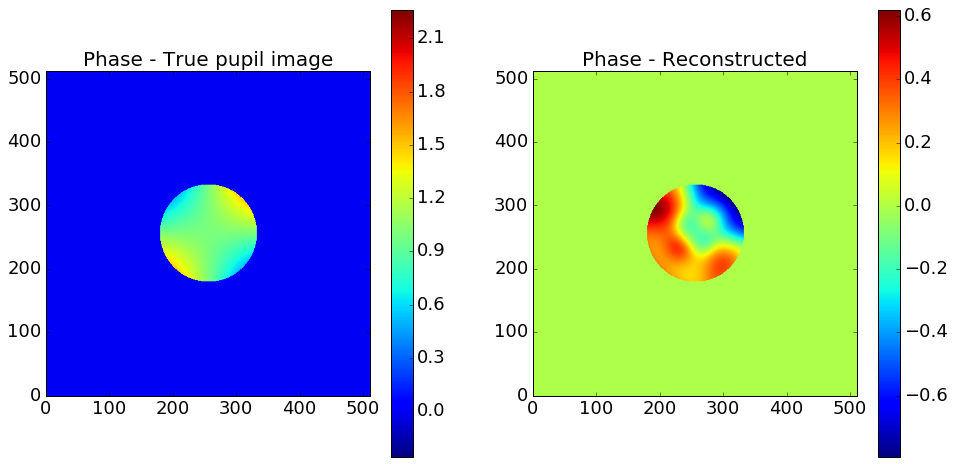

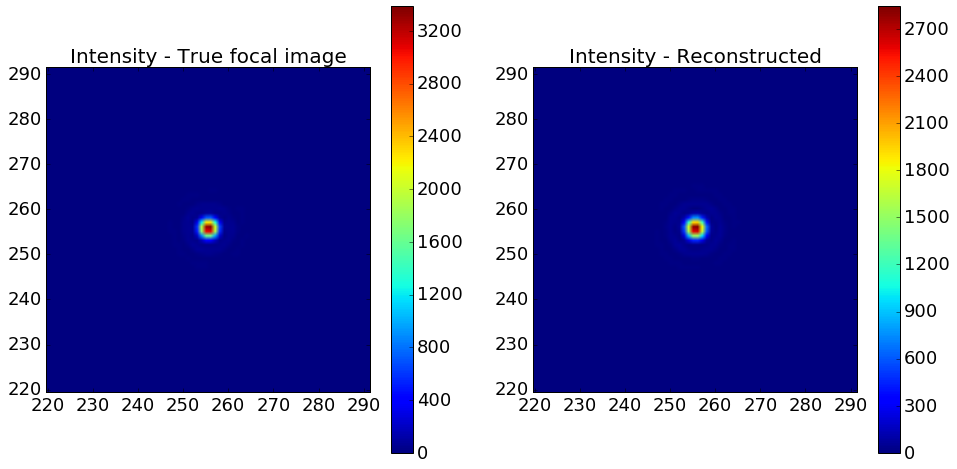

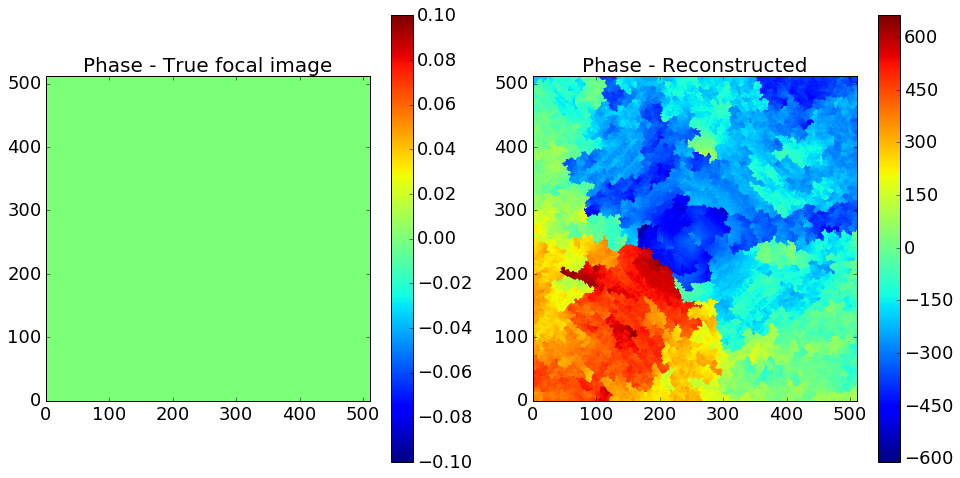

In [229]:
plot_recon(ast_50_P_,np.sqrt(ast_50_PR.foc),ast_50_pup_proj,ast_50_foc)

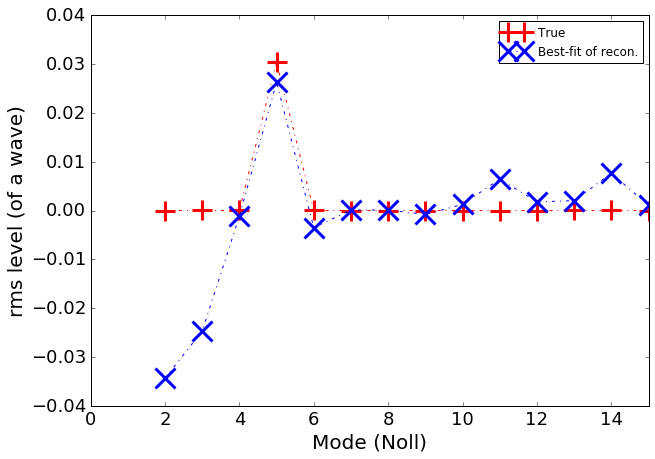

In [230]:
coef_ast_50_true, \
coef_ast_50_reco = wrap_up_zern_fit(ast_50_PR,
                                    Recon_phasor=ast_50_pup_proj,
                                    P_phasor=ast_50_P_,
                                    oversamp=1.66,flip=True)

**Note**: The obl. ast. is almost perfectly recovered, if the log is really wrong as noted above

#### 5. Complex
_Note: Similar to previous case, something must have been wrong_

_([Back to top](#Contents))_

In [240]:
complex1_PR = PR(foc=complex1_clp,oversamp=oversamp)

## "true" img as per data log
#-- coeff
complex1_c2 = [0.,0.,0.,0.,0.,150./wvl* 2*np.pi,0.,
               150./wvl* 2*np.pi,0.,
               100./wvl* 2*np.pi,0.,0.,0.,100./wvl* 2*np.pi]+[0.]*21
#--
complex1_P,complex1_P_,complex1_F,complex1_F_ = true_imgs(Npix=154,
                                                          coeff1=coeff1,
                                                          coeff2=complex1_c2,
                                                          oversamp=1.665)

Down-sampled array dimension is not even: 153 pix
 Changed to nearest oversamp: 1.66 that gives even-sized arrays


/Library/Python/2.7/site-packages/ipykernel/__main__.py:73: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in true_divide


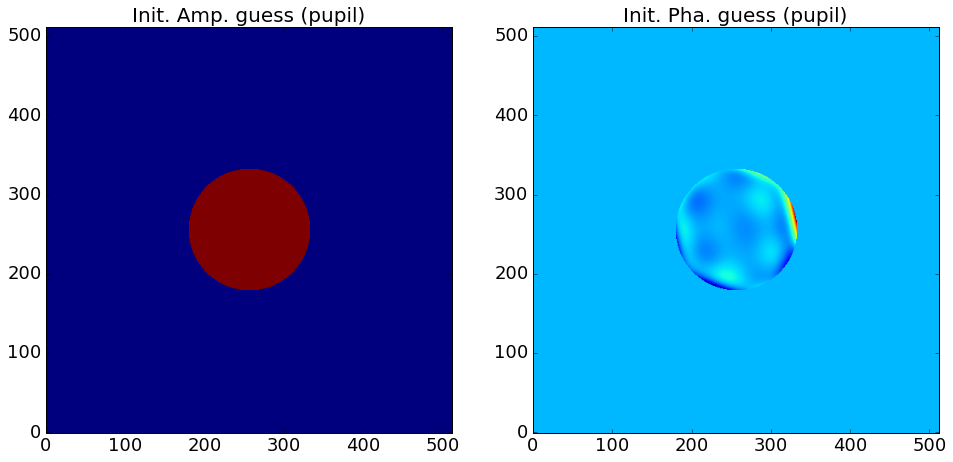

Current filter:


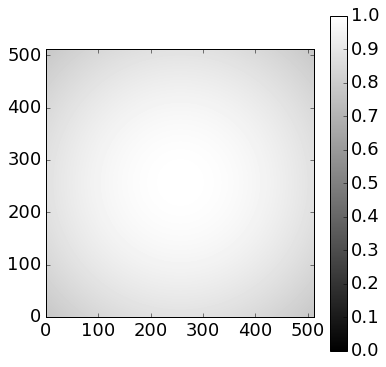

Current iter. : 100
        Error : 2.37e-02
Current iter. : 200
        Error : 2.37e-02
Current filter:


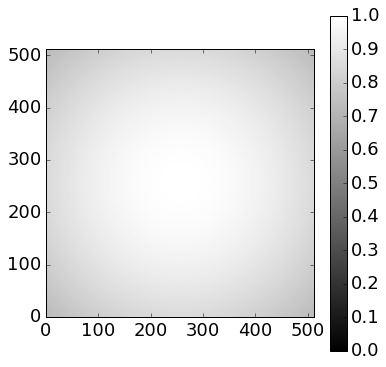

Current iter. : 300
        Error : 2.37e-02
Current iter. : 400
        Error : 2.37e-02
Current filter:


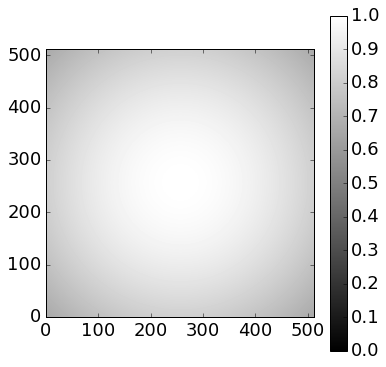

Current iter. : 500
        Error : 2.37e-02
Current iter. : 600
        Error : 2.37e-02
Current filter:


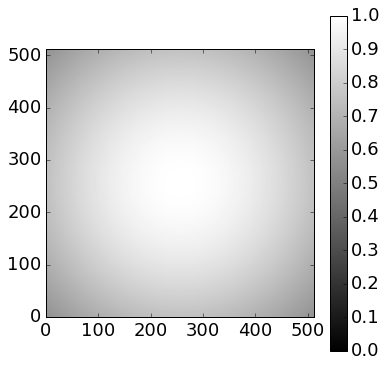

Current iter. : 700
        Error : 2.37e-02
Current iter. : 800
        Error : 2.37e-02
Current filter:


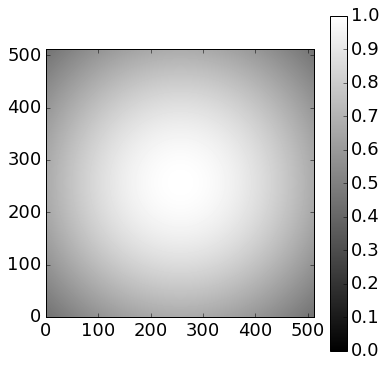

Current iter. : 900
        Error : 2.37e-02
Current iter. : 1000
        Error : 2.37e-02
Current filter:


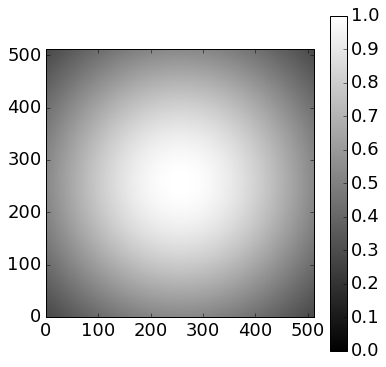

Current iter. : 1100
        Error : 2.37e-02
Current iter. : 1200
        Error : 2.37e-02
Current filter:


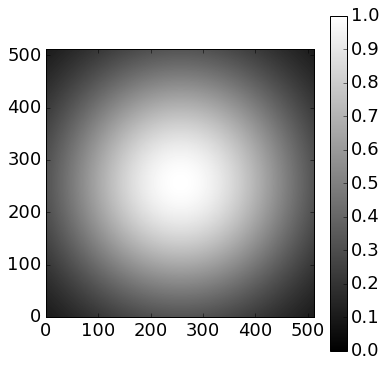

Current iter. : 1300
        Error : 2.37e-02
Current iter. : 1400
        Error : 2.37e-02
Current filter:


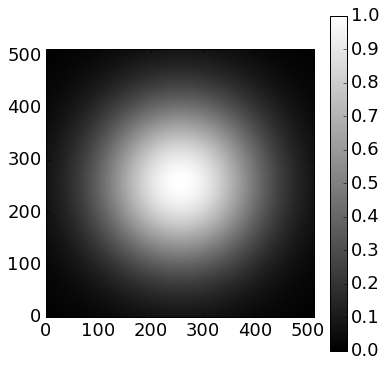

Current iter. : 1500
        Error : 2.37e-02
Current iter. : 1600
        Error : 2.37e-02
Current filter:


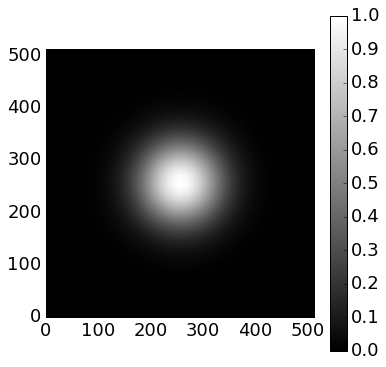

Current iter. : 1700
        Error : 2.37e-02
Current iter. : 1800
        Error : 2.37e-02
Current filter:


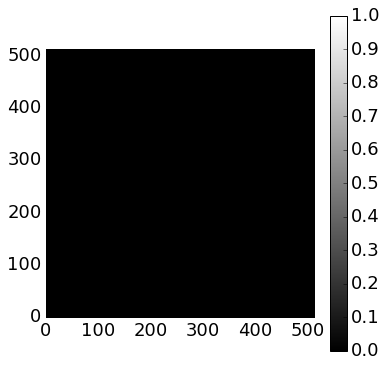

Current iter. : 1900
        Error : 2.37e-02
Current iter. : 2000
        Error : 2.37e-02
-----------------------
First iteration error: 7.72e-02
Final iteration : 2000
Final Error: 2.37e-02


In [161]:
complex1_pup,complex1_foc, \
complex1_errlist, \
complex1_pup_proj, \
complex1_errpuplist = complex1_PR.OSS(beta=0.5,force_only_phase=True,init='random')

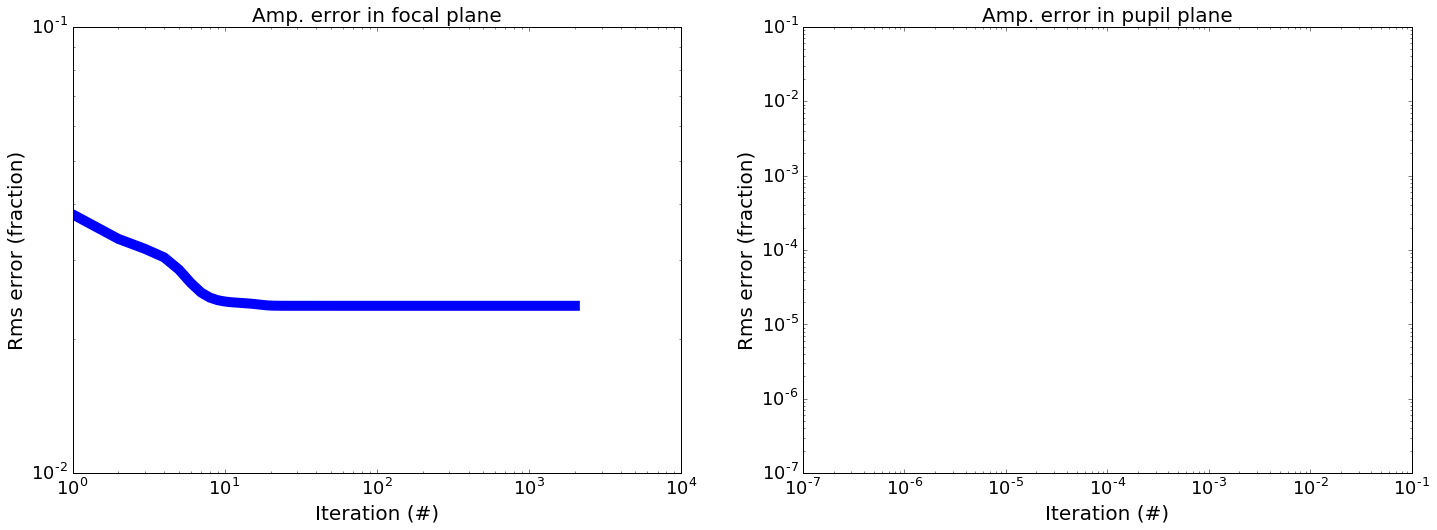

In [162]:
plot_errlist(complex1_errlist,complex1_errpuplist)

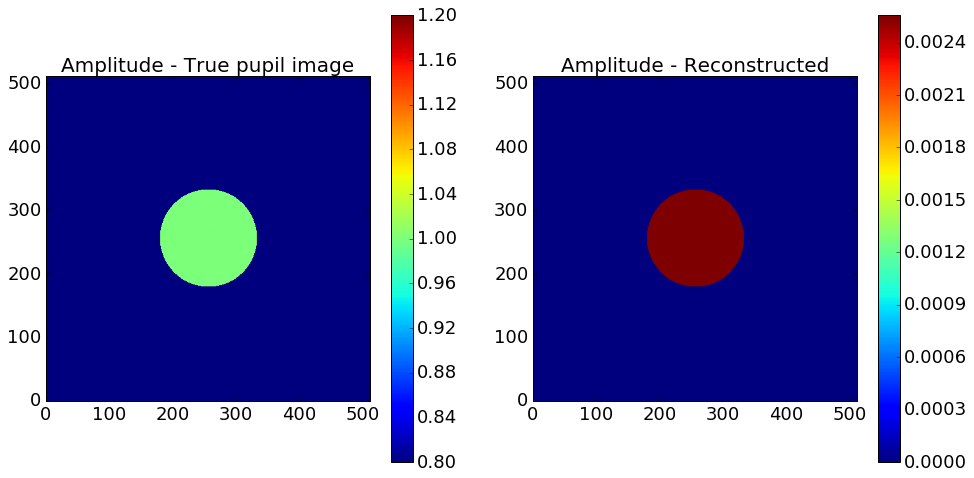

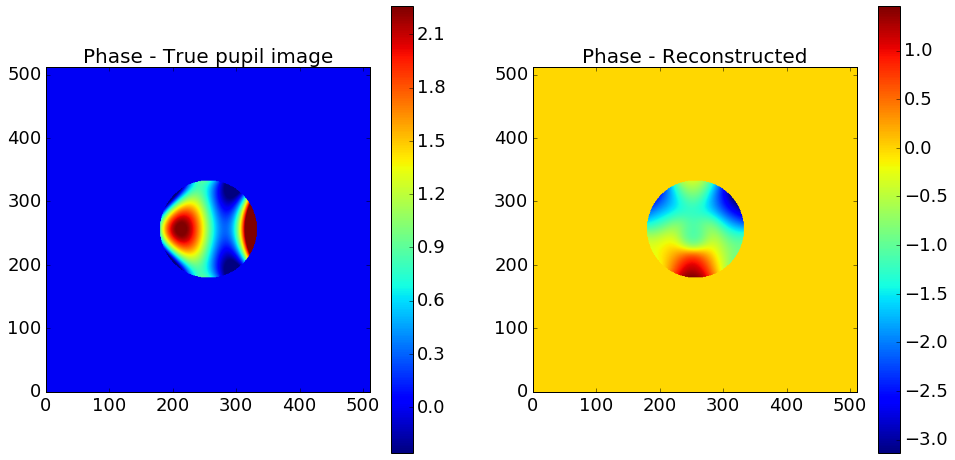

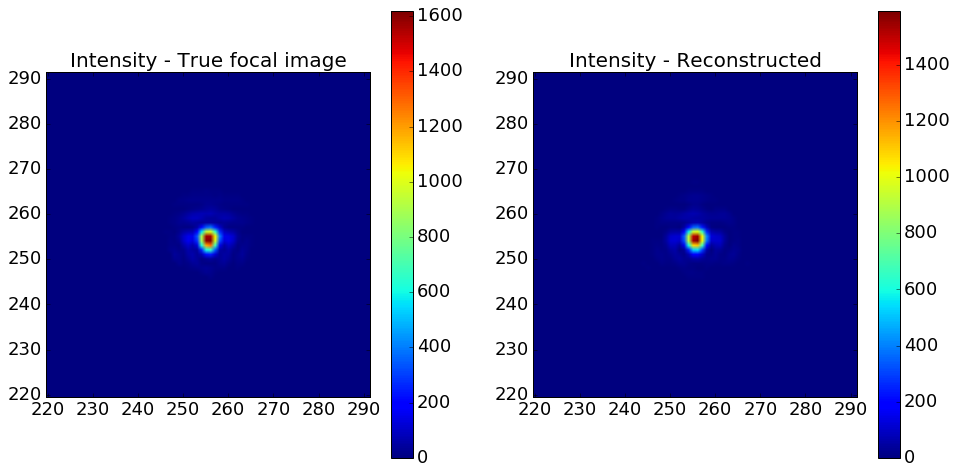

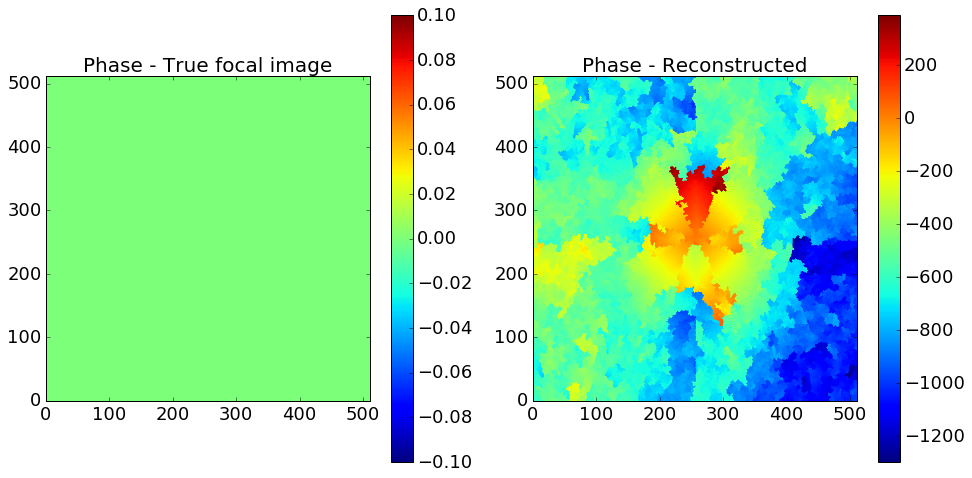

In [232]:
plot_recon(complex1_P_,np.sqrt(complex1_PR.foc),complex1_pup_proj,complex1_foc)

(220, 290)

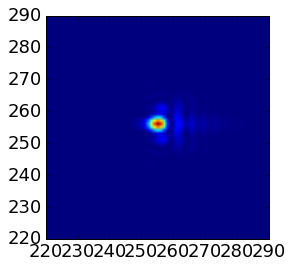

In [241]:
plt.imshow(complex1_F,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

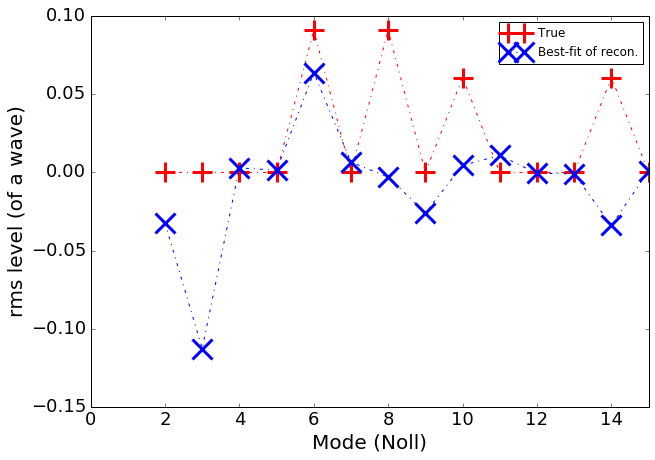

In [234]:
coef_complex1_true, \
coef_complex1_reco = wrap_up_zern_fit(complex1_PR,
                                      Recon_phasor=complex1_pup_proj,
                                      P_phasor=complex1_P_,
                                      oversamp=1.66,flip=True)

The "answer" is (Noll#6) +150 astig (2,2), (Noll#8) +150 coma (3,1), (Noll#10) +100 trefoil (3,3), and (Noll#14) +100 quadifoil (4,4). Only partly correct...

<br>
<font color="red">Need to check the convention adopted in the log. The PSF generated from the given parameters looks 90-degree rotated!</font>

### How about the "original" PSFs
_i.e. without rotation..._

_([Back to top](#Contents))_

#### Centers

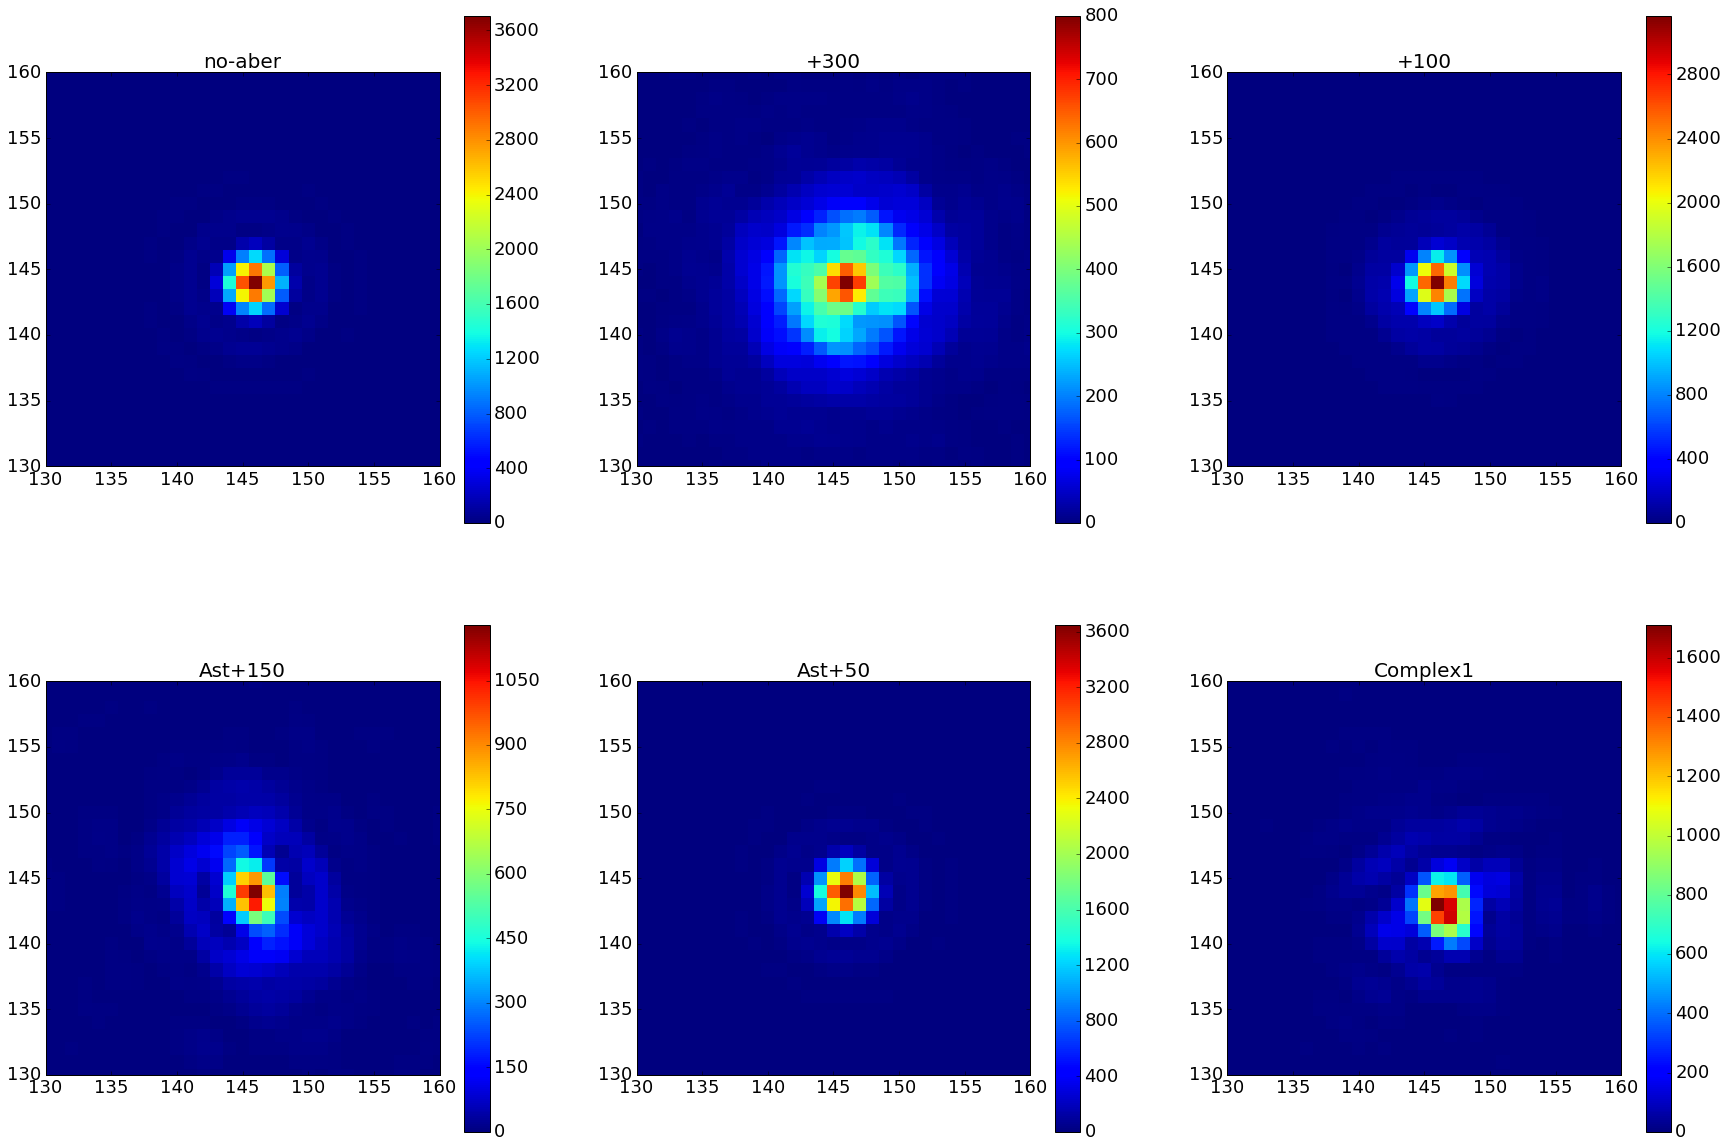

In [167]:
##
plt.figure(figsize=(30,20))
plt.subplot(231); plt.title('no-aber')
plt.imshow(no_aber.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(no_aber.data_slc))

plt.subplot(232); plt.title('+300')
plt.imshow(plus_300.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(plus_300.data_slc))

plt.subplot(233); plt.title('+100')
plt.imshow(plus_100.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(plus_100.data_slc))

plt.subplot(234); plt.title('Ast+150')
plt.imshow(ast_150.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(ast_150.data_slc))

plt.subplot(235); plt.title('Ast+50')
plt.imshow(ast_50.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(ast_50.data_slc))

plt.subplot(236); plt.title('Complex1')
plt.imshow(complex1.data_slc,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(complex1.data_slc))

I kinda doubt that the +300 is really +300 only... One can clearly see some ast...

In [168]:
size=20
no_aber_ori_clp  = clipping(no_aber.data_slc, Npix=Npix,center=(146,144),size=size)
plus_300_ori_clp = clipping(plus_300.data_slc,Npix=Npix,center=(146,144),size=size)
plus_100_ori_clp = clipping(plus_100.data_slc,Npix=Npix,center=(146,144),size=size)
ast_150_ori_clp  = clipping(ast_150.data_slc, Npix=Npix,center=(146,144),size=size)
ast_50_ori_clp   = clipping(ast_50.data_slc,  Npix=Npix,center=(146,144),size=size)
complex1_ori_clp = clipping(complex1.data_slc,Npix=Npix,center=(146,144),size=size)

(220, 290)

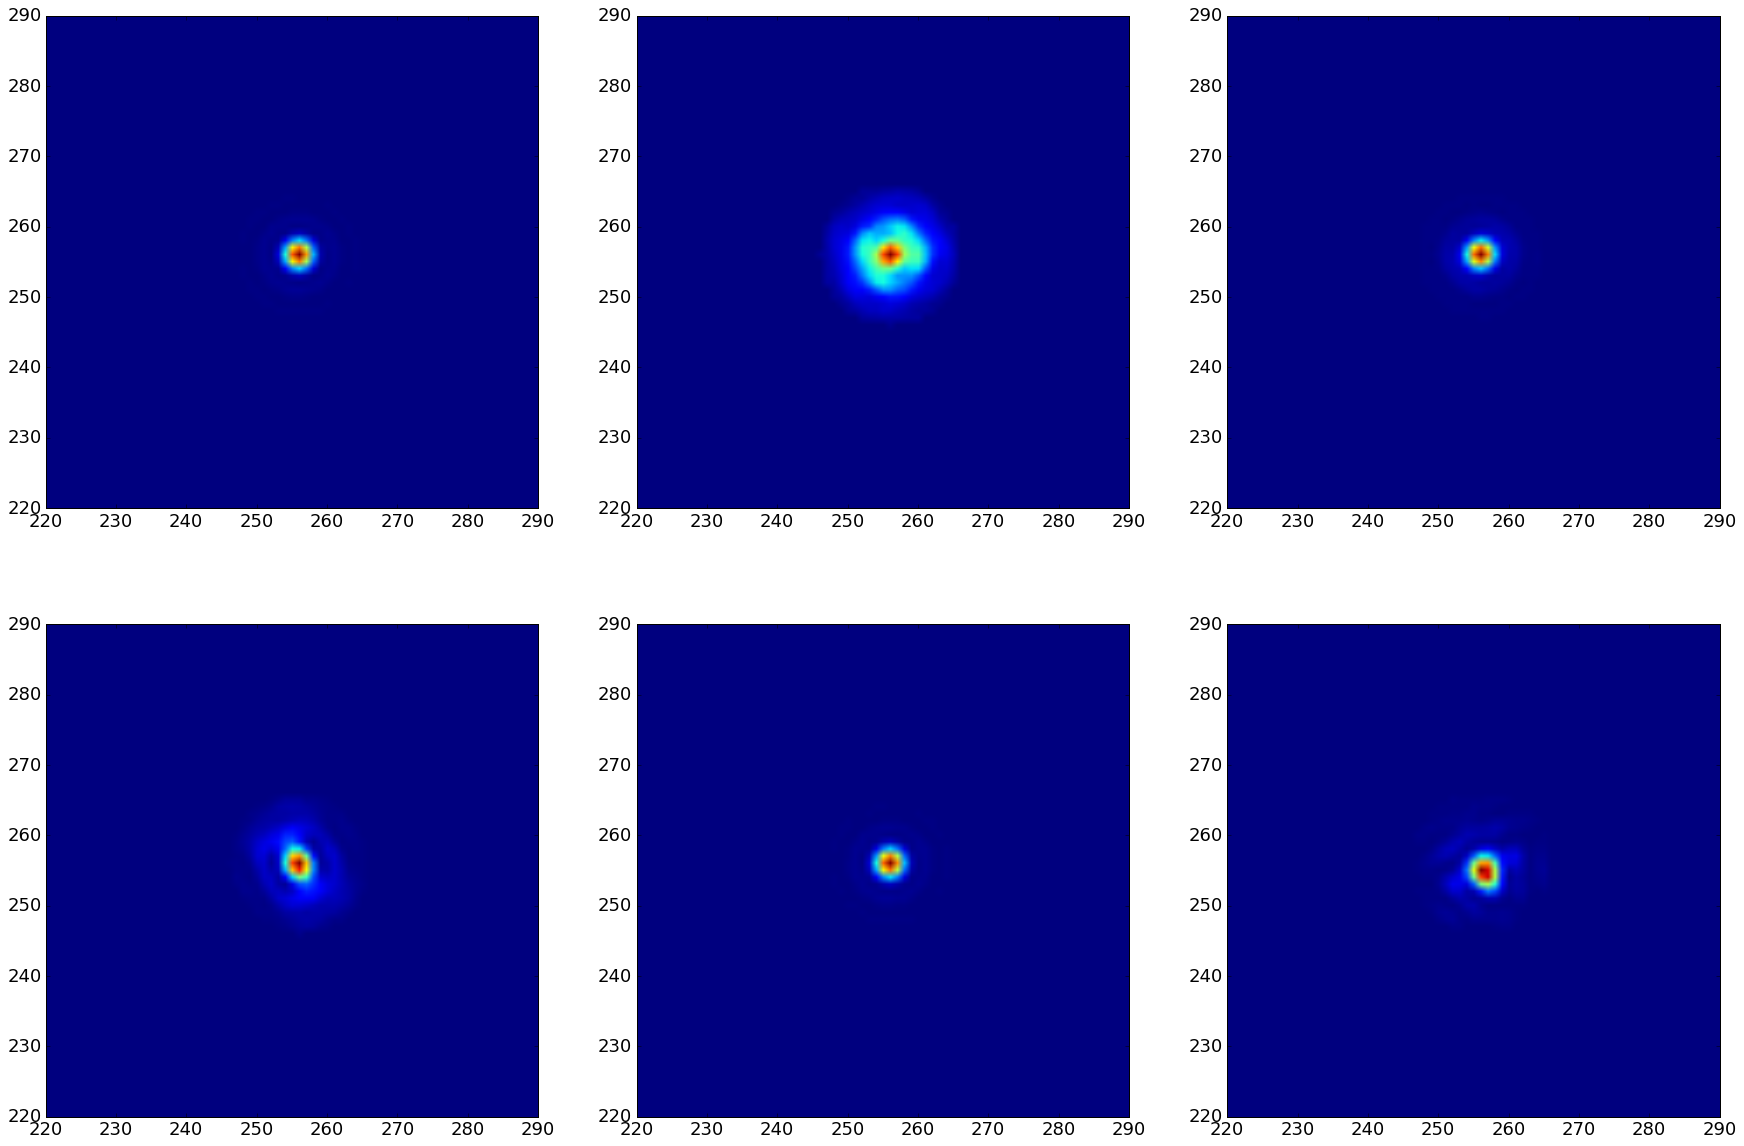

In [169]:
plt.figure(figsize=(30,20))
plt.subplot(231); plt.imshow(no_aber_ori_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(232); plt.imshow(plus_300_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(233); plt.imshow(plus_100_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(234); plt.imshow(ast_150_ori_clp, origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(235); plt.imshow(ast_50_ori_clp,  origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(236); plt.imshow(complex1_ori_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)

### Then go...
#### 1. no-aber

In [173]:
## assume all images were taken under same condition
oversampo = 3/2.4

## setup
no_aber_ori_PR = PR(foc=no_aber_ori_clp,oversamp=oversampo)

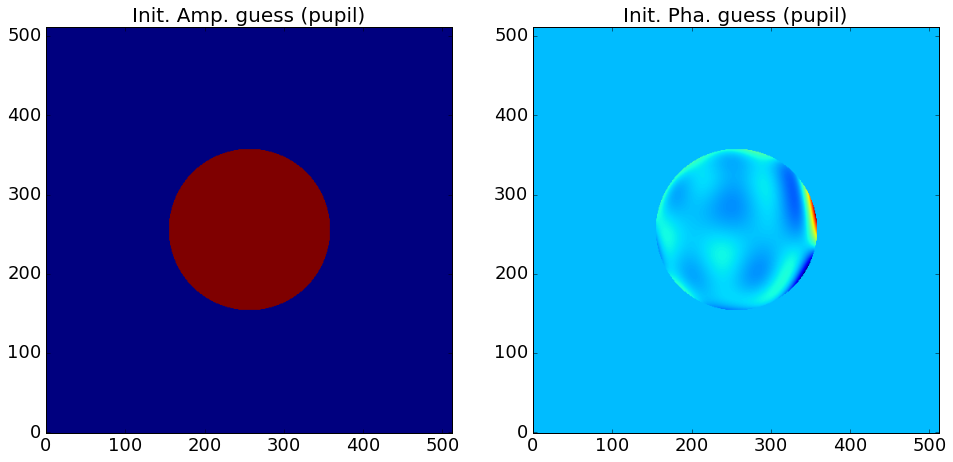

Current filter:


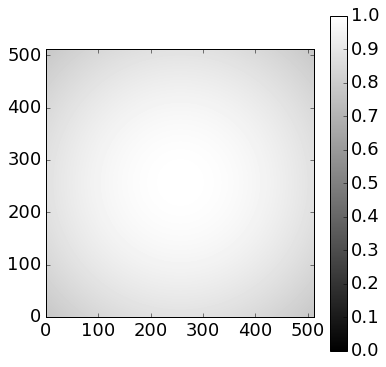

Current iter. : 100
        Error : 3.07e-02
Current iter. : 200
        Error : 3.07e-02
Current filter:


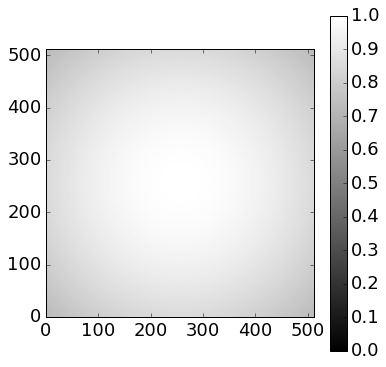

Current iter. : 300
        Error : 3.07e-02
Current iter. : 400
        Error : 3.07e-02
Current filter:


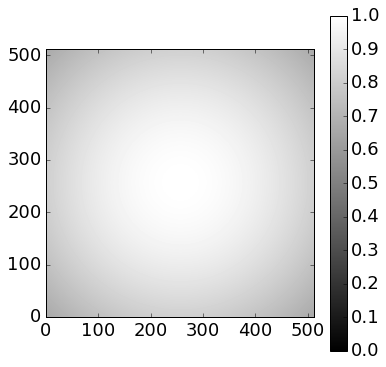

Current iter. : 500
        Error : 3.07e-02
Current iter. : 600
        Error : 3.07e-02
Current filter:


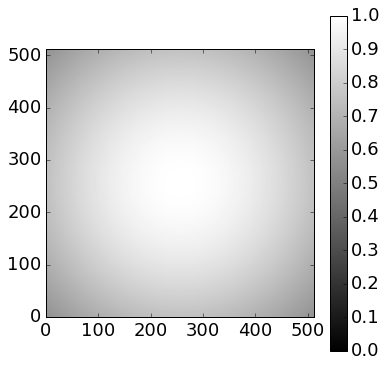

Current iter. : 700
        Error : 3.07e-02
Current iter. : 800
        Error : 3.07e-02
Current filter:


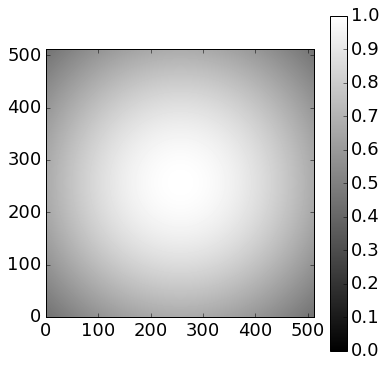

Current iter. : 900
        Error : 3.07e-02
Current iter. : 1000
        Error : 3.07e-02
Current filter:


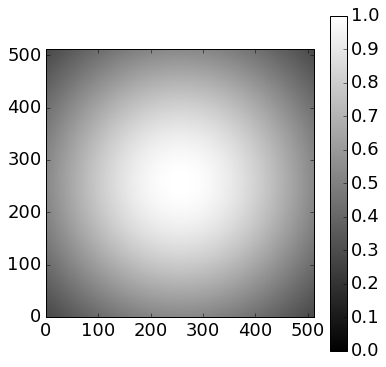

Current iter. : 1100
        Error : 3.07e-02
Current iter. : 1200
        Error : 3.07e-02
Current filter:


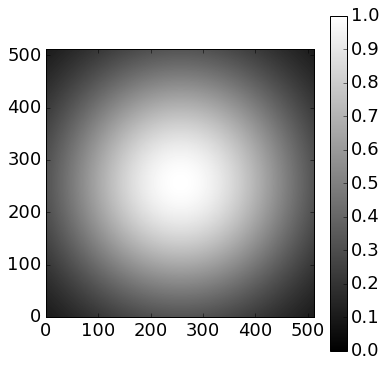

Current iter. : 1300
        Error : 3.07e-02
Current iter. : 1400
        Error : 3.07e-02
Current filter:


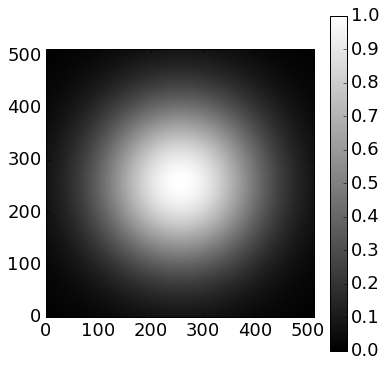

Current iter. : 1500
        Error : 3.07e-02
Current iter. : 1600
        Error : 3.07e-02
Current filter:


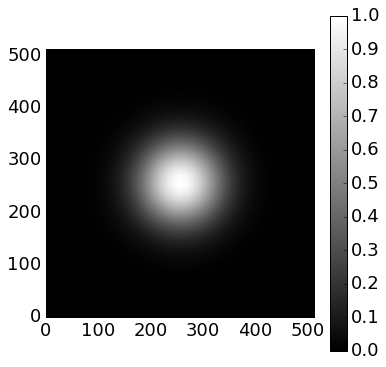

Current iter. : 1700
        Error : 3.07e-02
Current iter. : 1800
        Error : 3.07e-02
Current filter:


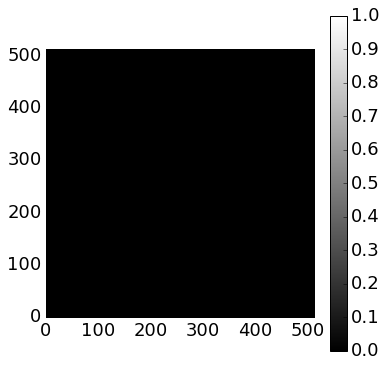

Current iter. : 1900
        Error : 3.07e-02
Current iter. : 2000
        Error : 3.07e-02
-----------------------
First iteration error: 9.48e-02
Final iteration : 2000
Final Error: 3.07e-02


In [130]:
no_aber_ori_pup,no_aber_ori_foc, \
no_aber_ori_errlist, \
no_aber_ori_pup_proj, \
no_aber_ori_errpuplist = no_aber_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

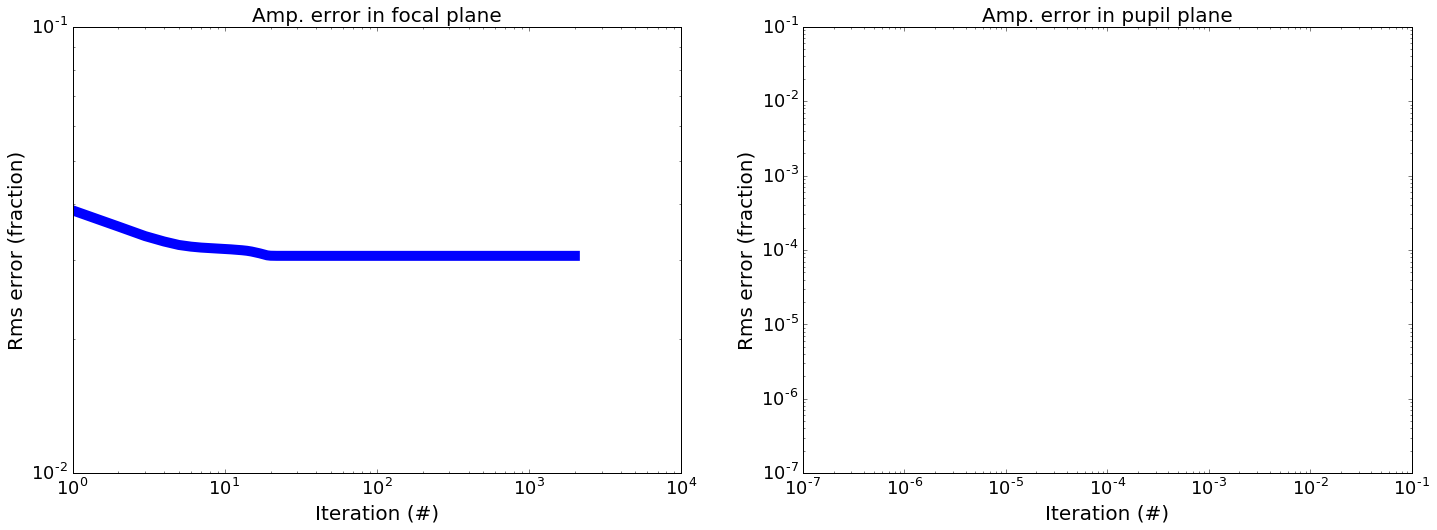

In [131]:
plot_errlist(no_aber_ori_errlist,no_aber_ori_errpuplist)

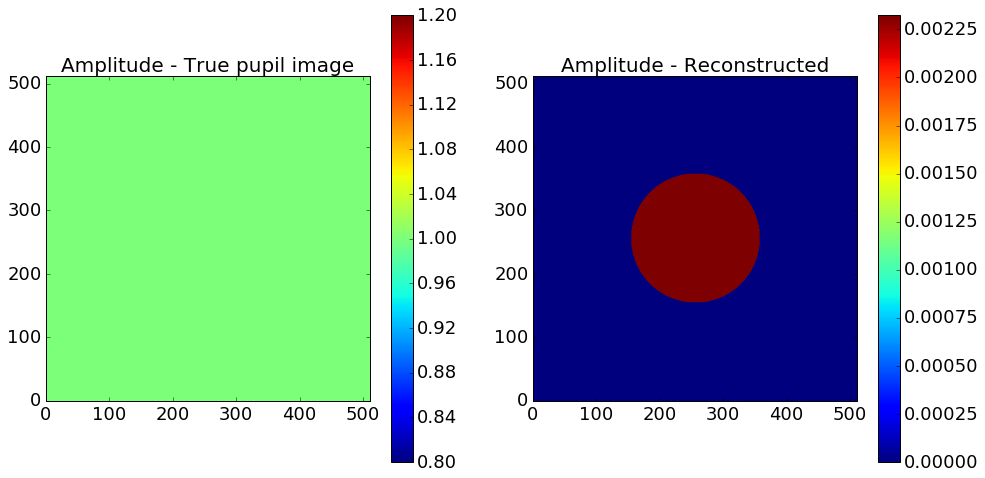

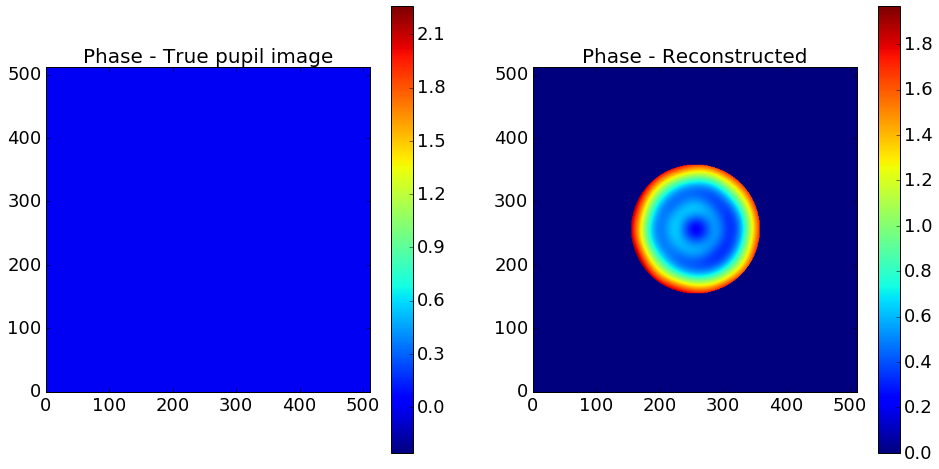

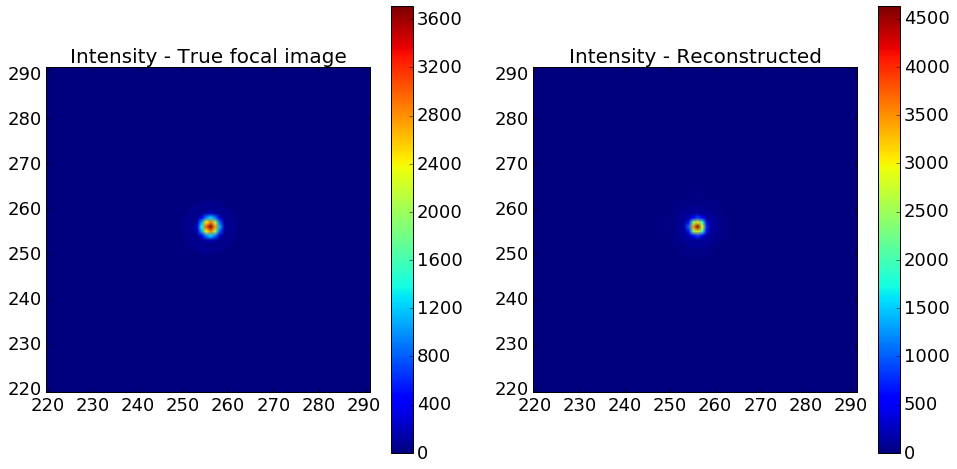

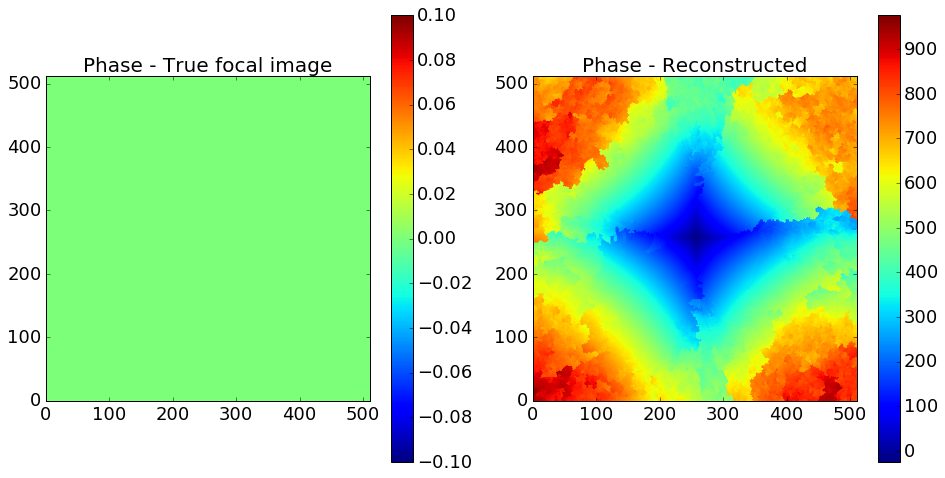

In [132]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(no_aber_ori_PR.foc),no_aber_ori_pup_proj,no_aber_ori_foc)

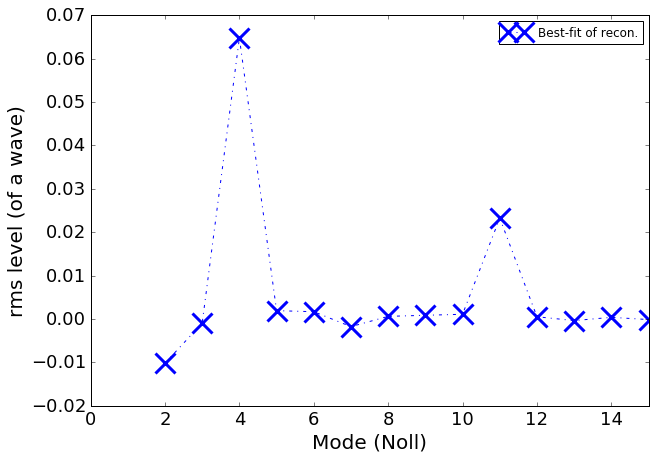

In [242]:
coef_no_aber_ori_true, \
coef_no_aber_ori_reco = wrap_up_zern_fit(no_aber_ori_PR,
                                         Recon_phasor=no_aber_ori_pup_proj,
                                         oversamp=oversampo)

OK. If we trust the code, then this "-150nm focus" adjusted to correct for intrinsic defocusing is then not precise enough - leaving some small defocusing.

And the 11th mode is spherical

#### 2. Plus 300

In [133]:
plus_300_ori_PR = PR(foc=plus_300_ori_clp,oversamp=oversampo)

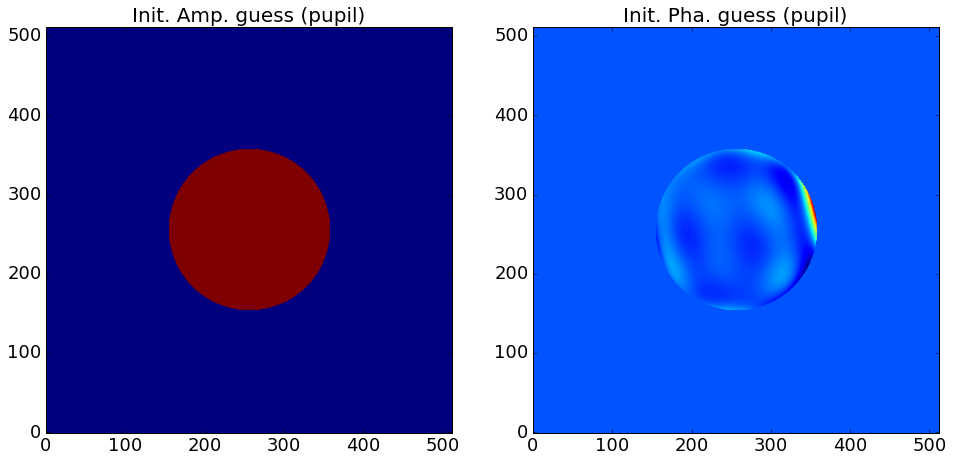

Current filter:


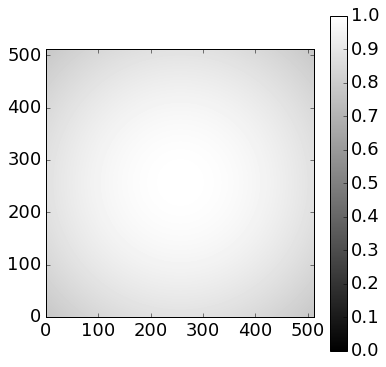

Current iter. : 100
        Error : 2.38e-02
Current iter. : 200
        Error : 2.38e-02
Current filter:


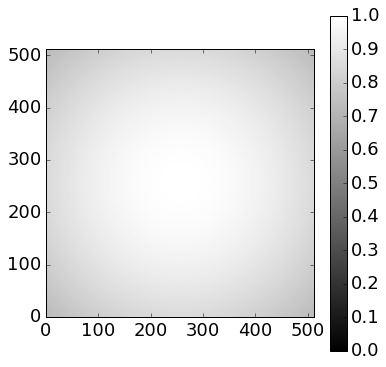

Current iter. : 300
        Error : 2.38e-02
Current iter. : 400
        Error : 2.38e-02
Current filter:


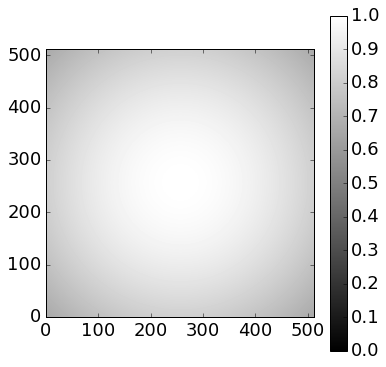

Current iter. : 500
        Error : 2.38e-02
Current iter. : 600
        Error : 2.38e-02
Current filter:


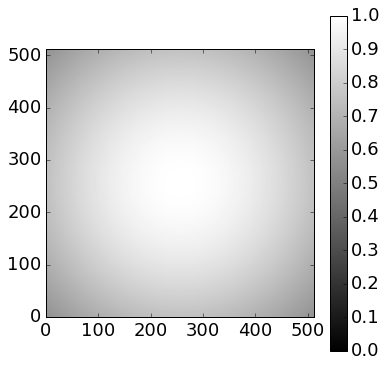

Current iter. : 700
        Error : 2.38e-02
Current iter. : 800
        Error : 2.38e-02
Current filter:


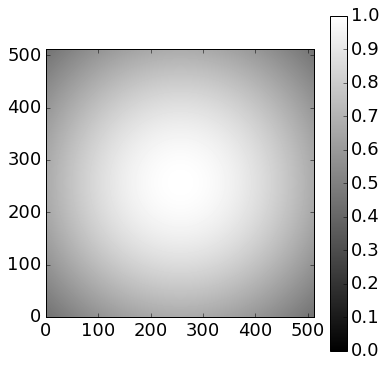

Current iter. : 900
        Error : 2.38e-02
Current iter. : 1000
        Error : 2.38e-02
Current filter:


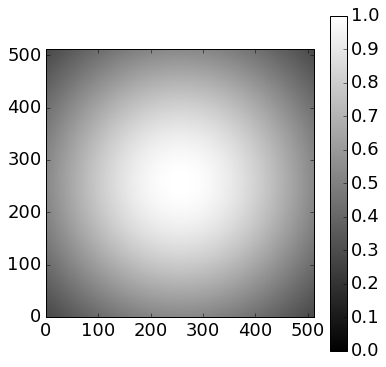

Current iter. : 1100
        Error : 2.38e-02
Current iter. : 1200
        Error : 2.38e-02
Current filter:


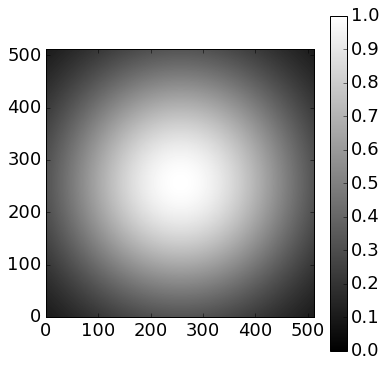

Current iter. : 1300
        Error : 2.38e-02
Current iter. : 1400
        Error : 2.38e-02
Current filter:


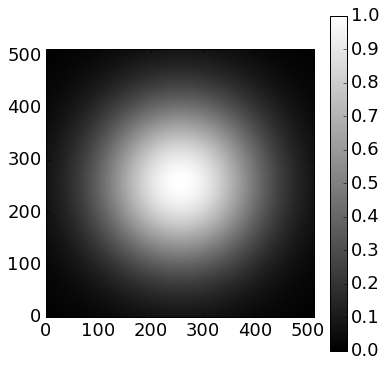

Current iter. : 1500
        Error : 2.38e-02
Current iter. : 1600
        Error : 2.38e-02
Current filter:


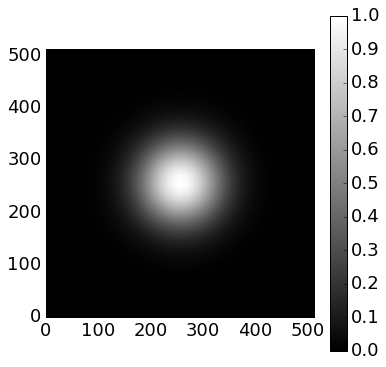

Current iter. : 1700
        Error : 2.38e-02
Current iter. : 1800
        Error : 2.38e-02
Current filter:


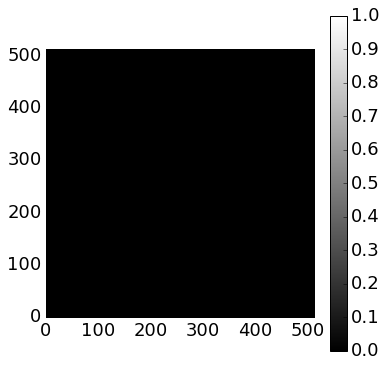

Current iter. : 1900
        Error : 2.38e-02
Current iter. : 2000
        Error : 2.38e-02
-----------------------
First iteration error: 5.69e-02
Final iteration : 2000
Final Error: 2.38e-02


In [134]:
plus_300_ori_pup,plus_300_ori_foc, \
plus_300_ori_errlist, \
plus_300_ori_pup_proj, \
plus_300_ori_errpuplist = plus_300_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

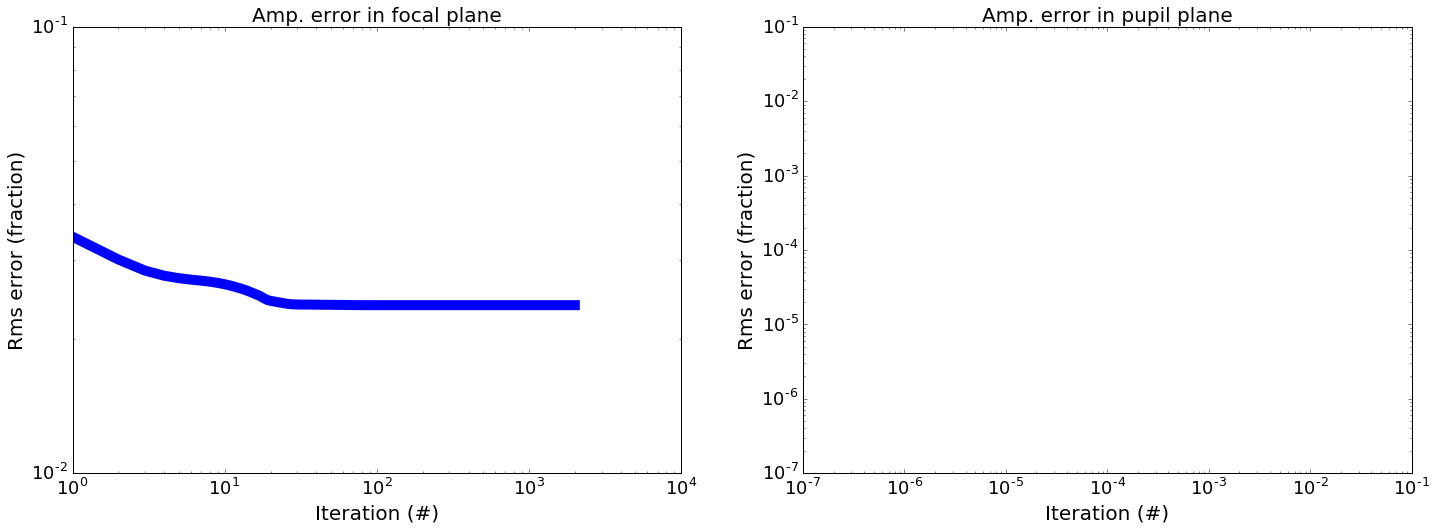

In [135]:
plot_errlist(plus_300_ori_errlist,plus_300_ori_errpuplist)

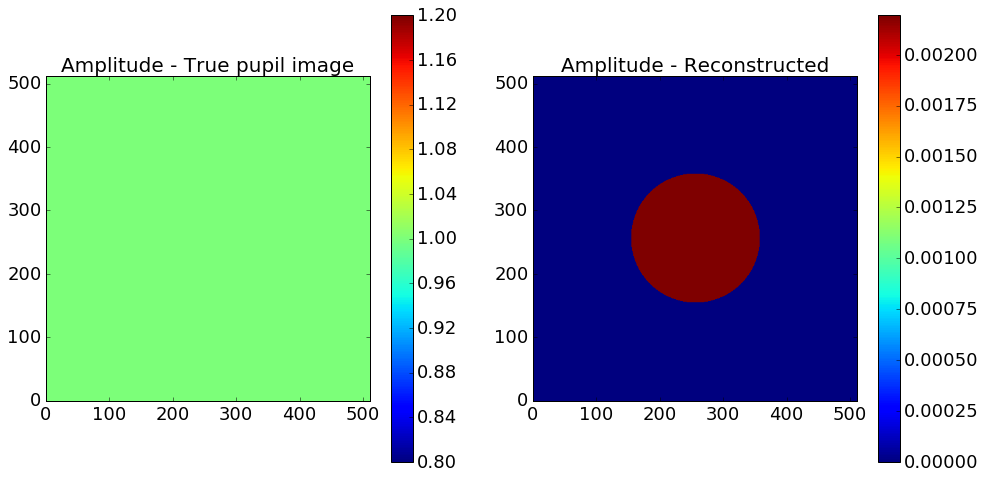

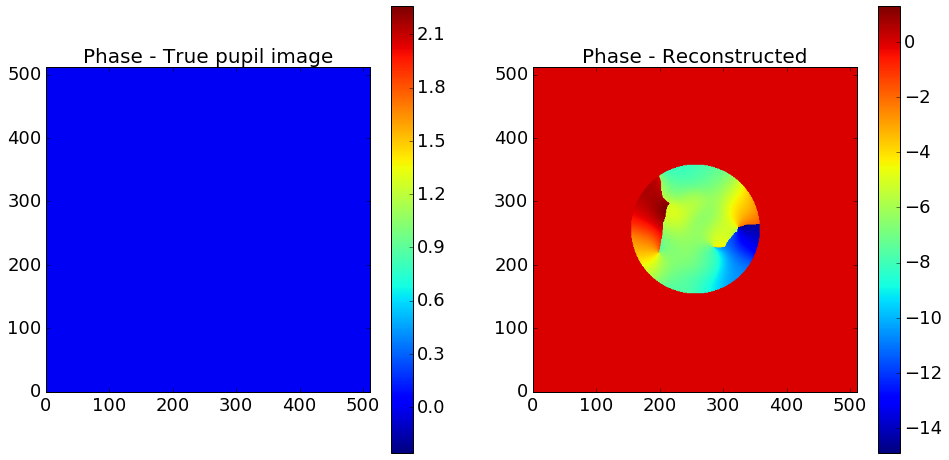

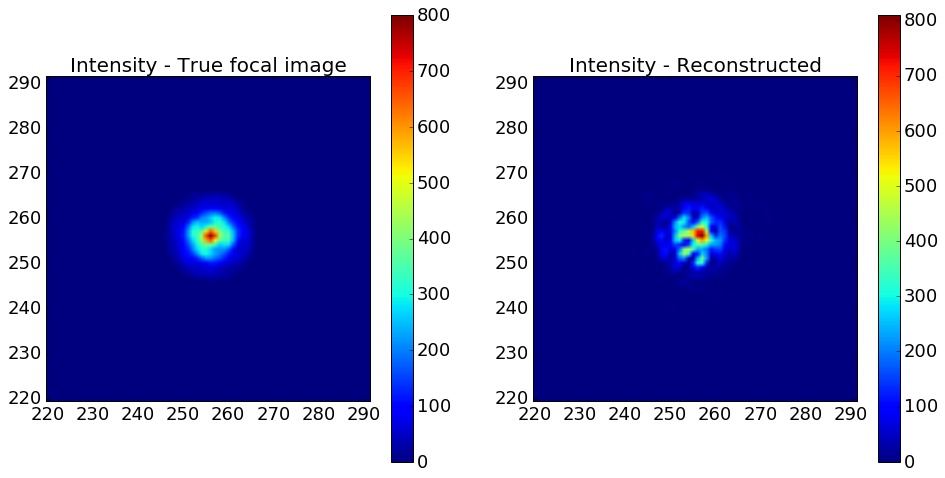

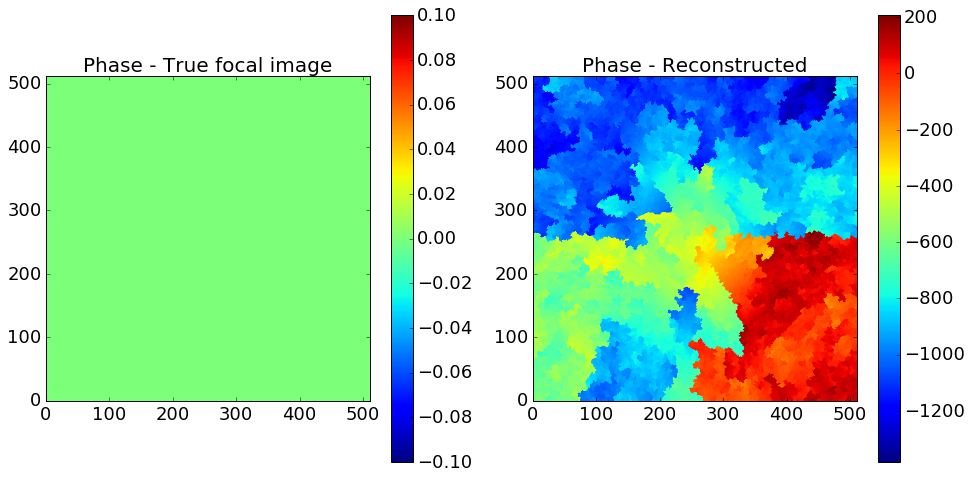

In [136]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(plus_300_ori_PR.foc),plus_300_ori_pup_proj,plus_300_ori_foc)

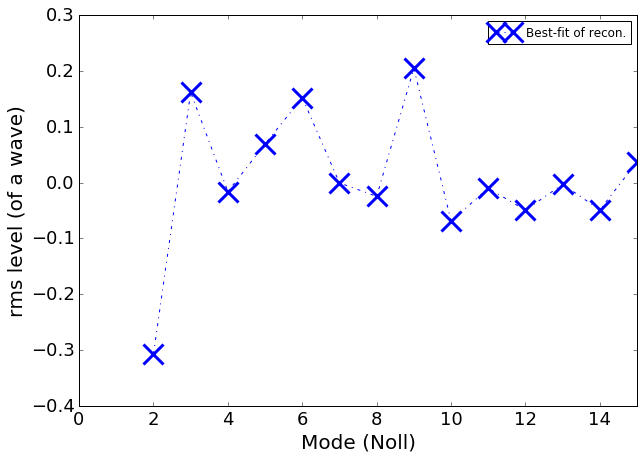

In [243]:
coef_plus_300_ori_true, \
coef_plus_300_ori_reco = wrap_up_zern_fit(plus_300_ori_PR,
                                          Recon_phasor=plus_300_ori_pup_proj,
                                          oversamp=oversampo)

What exactly was done for this image?

#### 3. Ast. 150

In [138]:
ast_150_ori_PR = PR(foc=ast_150_ori_clp,oversamp=oversampo)

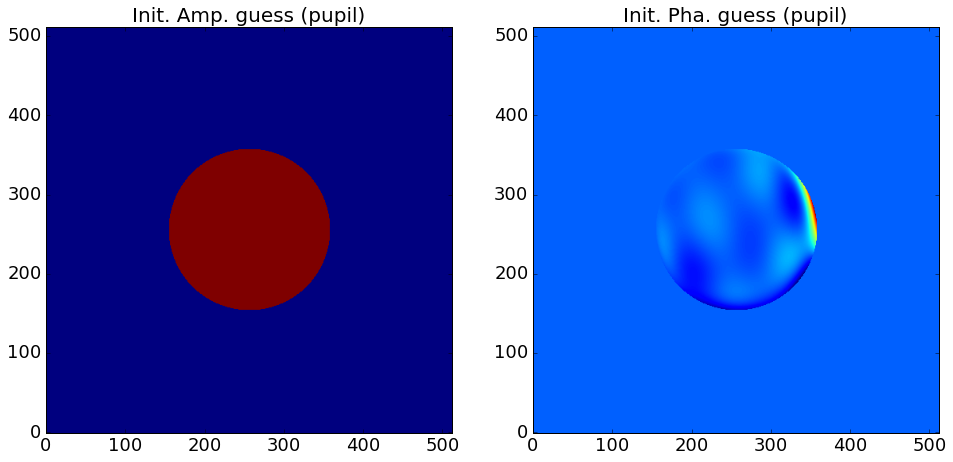

Current filter:


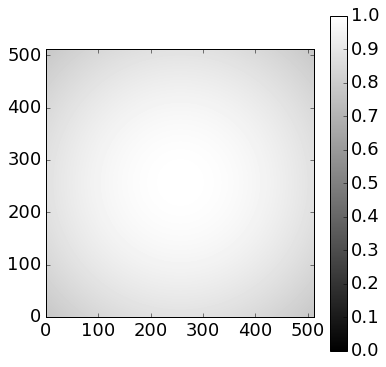

Current iter. : 100
        Error : 2.57e-02
Current iter. : 200
        Error : 2.57e-02
Current filter:


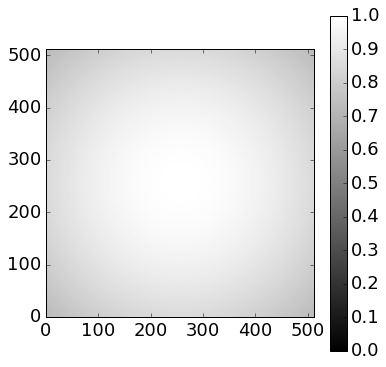

Current iter. : 300
        Error : 2.57e-02
Current iter. : 400
        Error : 2.57e-02
Current filter:


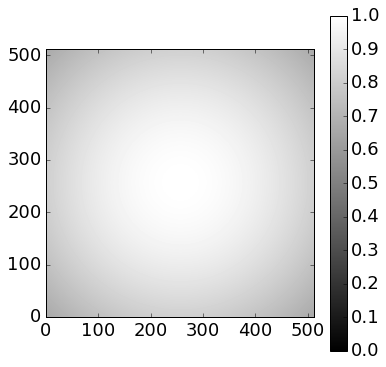

Current iter. : 500
        Error : 2.57e-02
Current iter. : 600
        Error : 2.57e-02
Current filter:


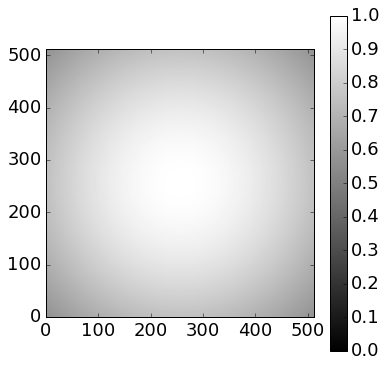

Current iter. : 700
        Error : 2.57e-02
Current iter. : 800
        Error : 2.57e-02
Current filter:


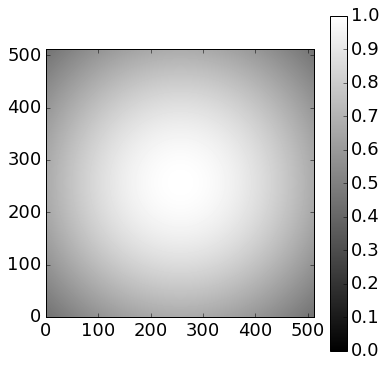

Current iter. : 900
        Error : 2.57e-02
Current iter. : 1000
        Error : 2.57e-02
Current filter:


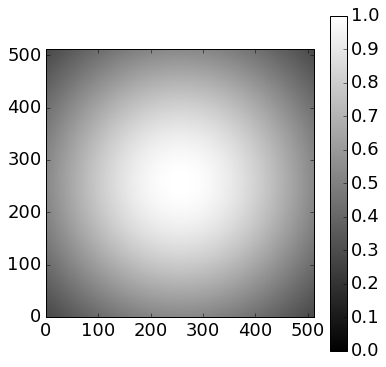

Current iter. : 1100
        Error : 2.57e-02
Current iter. : 1200
        Error : 2.57e-02
Current filter:


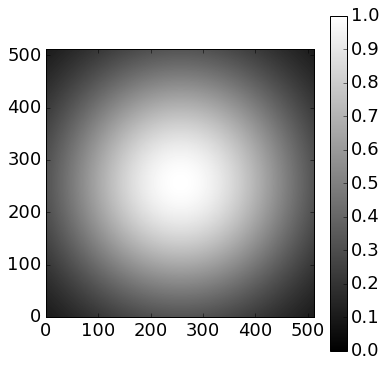

Current iter. : 1300
        Error : 2.57e-02
Current iter. : 1400
        Error : 2.57e-02
Current filter:


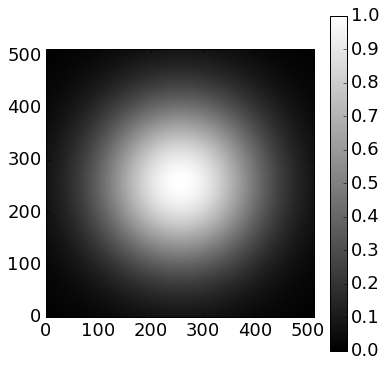

Current iter. : 1500
        Error : 2.57e-02
Current iter. : 1600
        Error : 2.57e-02
Current filter:


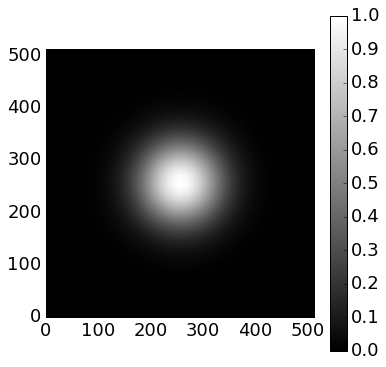

Current iter. : 1700
        Error : 2.57e-02
Current iter. : 1800
        Error : 2.57e-02
Current filter:


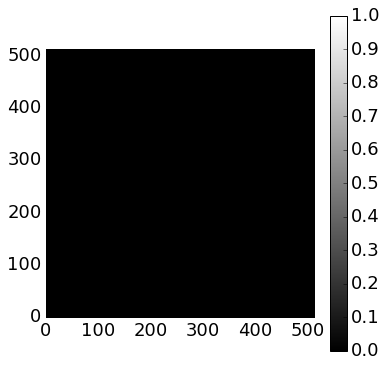

Current iter. : 1900
        Error : 2.57e-02
Current iter. : 2000
        Error : 2.57e-02
-----------------------
First iteration error: 5.67e-02
Final iteration : 2000
Final Error: 2.57e-02


In [139]:
ast_150_ori_pup,ast_150_ori_foc, \
ast_150_ori_errlist, \
ast_150_ori_pup_proj, \
ast_150_ori_errpuplist = ast_150_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

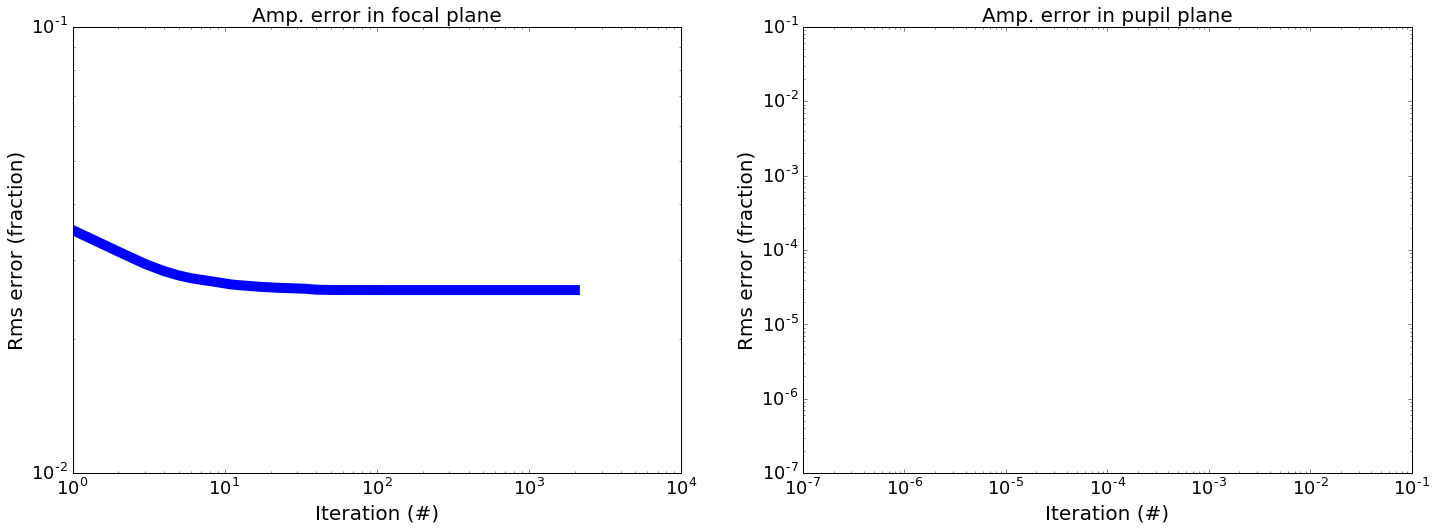

In [140]:
plot_errlist(ast_150_ori_errlist,ast_150_ori_errpuplist)

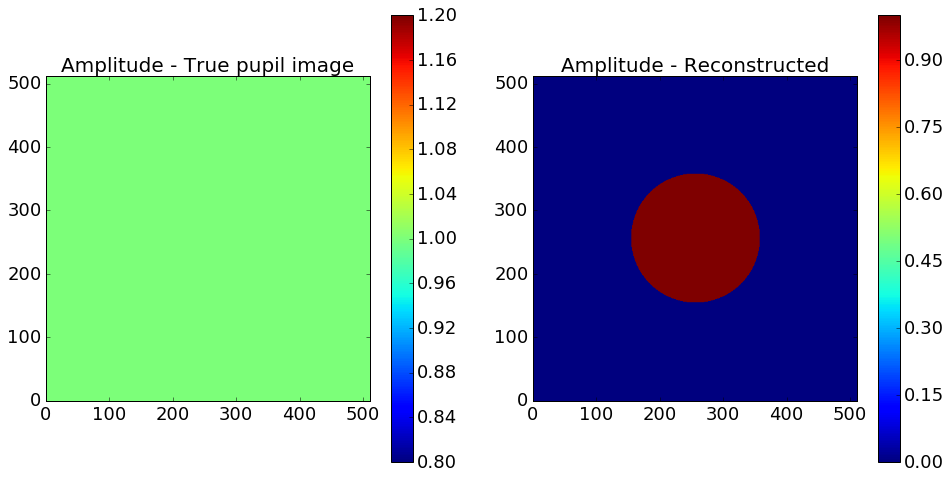

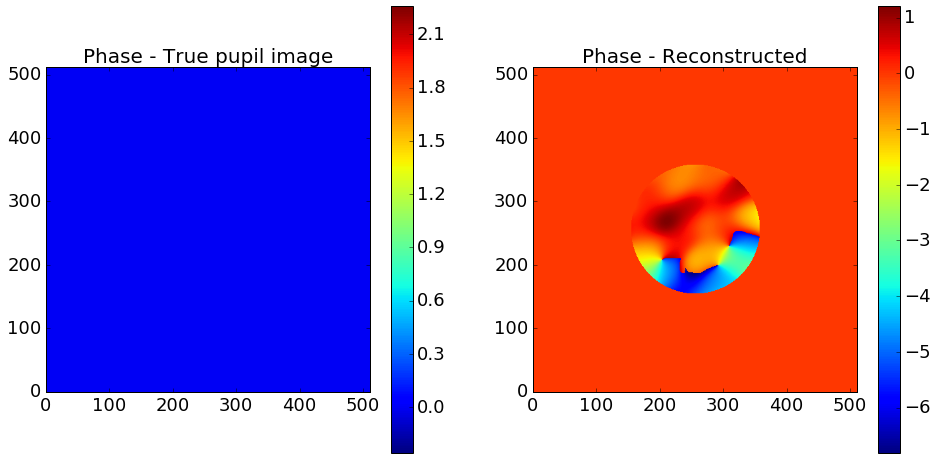

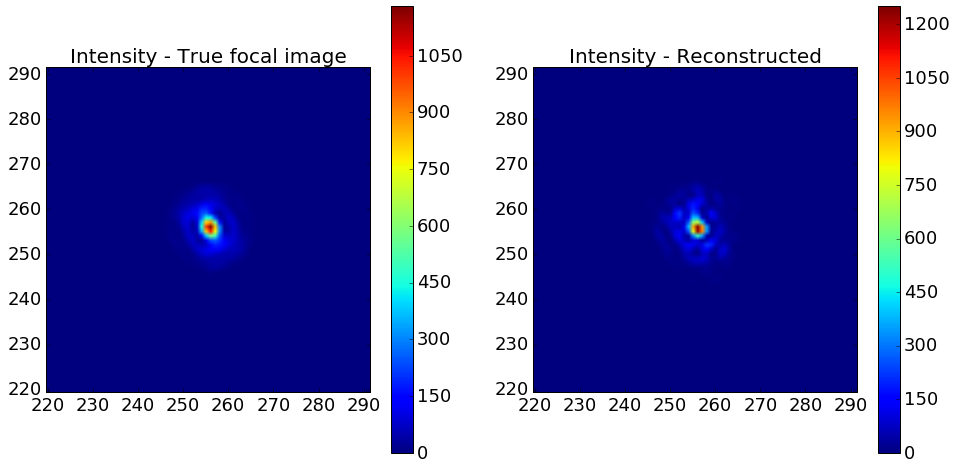

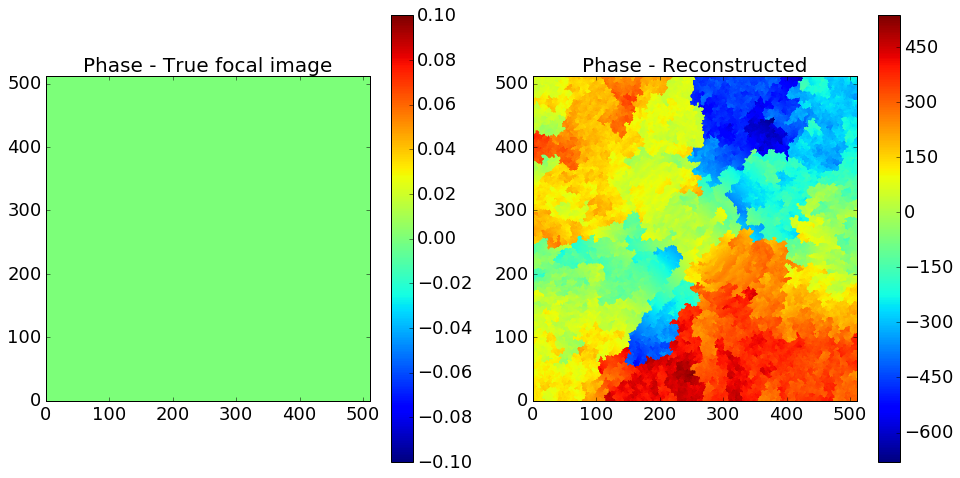

In [141]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_150_ori_PR.foc),ast_150_ori_pup_proj,ast_150_ori_foc)

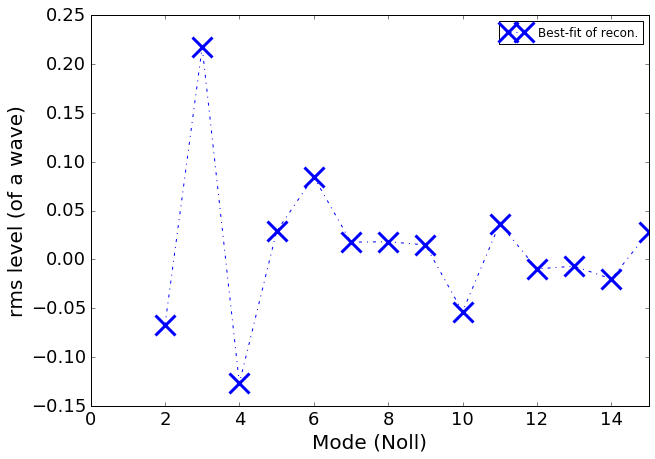

In [244]:
coef_ast_ori_150_true, \
coef_ast_ori_150_reco = wrap_up_zern_fit(ast_150_ori_PR,
                                         Recon_phasor=ast_150_ori_pup_proj,
                                         oversamp=oversampo)

#### 4. Ast. 50 only

In [174]:
ast_50_ori_PR = PR(foc=ast_50_ori_clp,oversamp=oversampo)

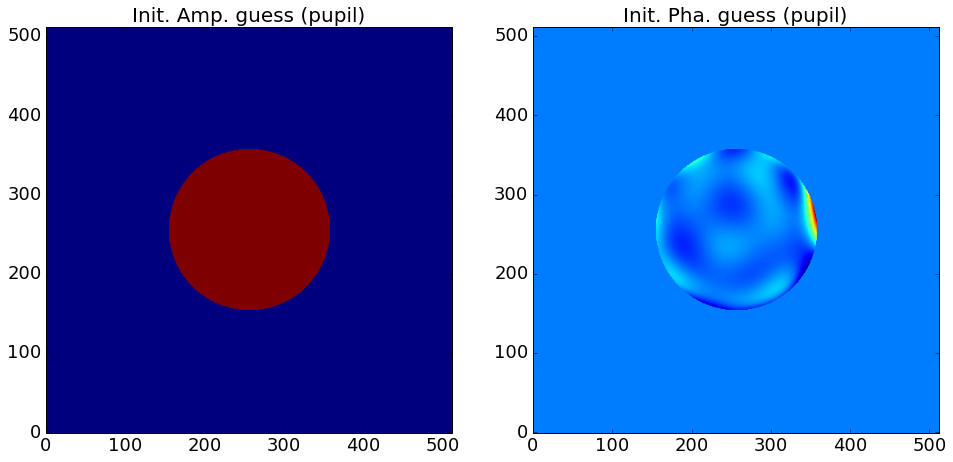

Current filter:


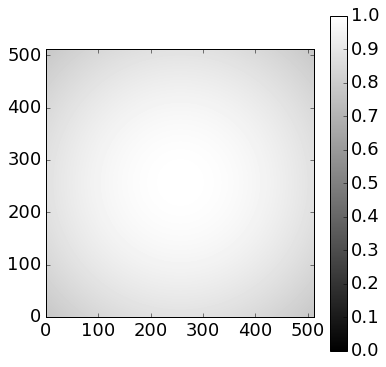

Current iter. : 100
        Error : 3.06e-02
Current iter. : 200
        Error : 3.03e-02
Current filter:


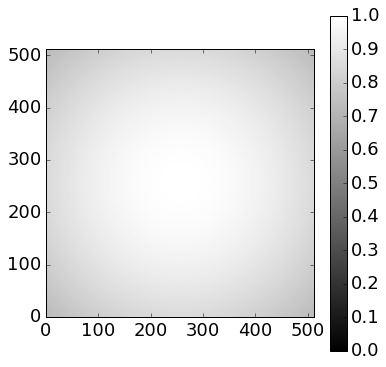

Current iter. : 300
        Error : 3.03e-02
Current iter. : 400
        Error : 3.03e-02
Current filter:


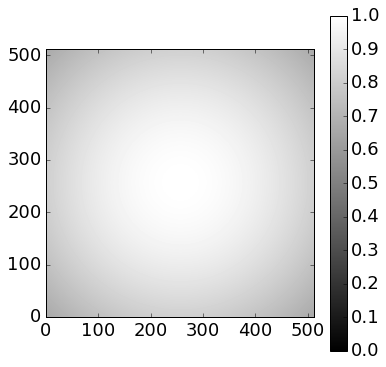

Current iter. : 500
        Error : 3.03e-02
Current iter. : 600
        Error : 3.03e-02
Current filter:


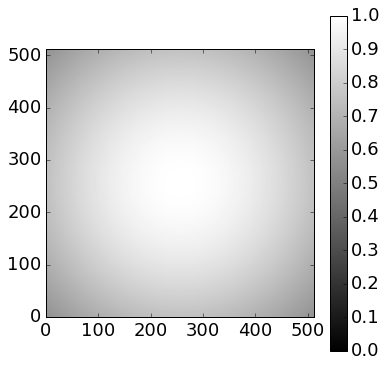

Current iter. : 700
        Error : 3.03e-02
Current iter. : 800
        Error : 3.03e-02
Current filter:


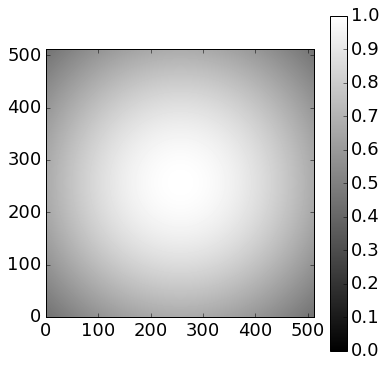

Current iter. : 900
        Error : 3.03e-02
Current iter. : 1000
        Error : 3.03e-02
Current filter:


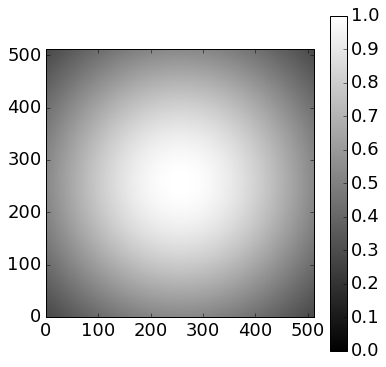

Current iter. : 1100
        Error : 3.03e-02
Current iter. : 1200
        Error : 3.03e-02
Current filter:


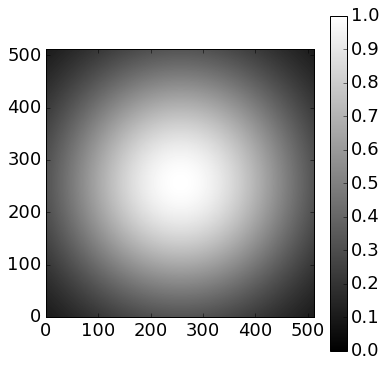

Current iter. : 1300
        Error : 3.03e-02
Current iter. : 1400
        Error : 3.03e-02
Current filter:


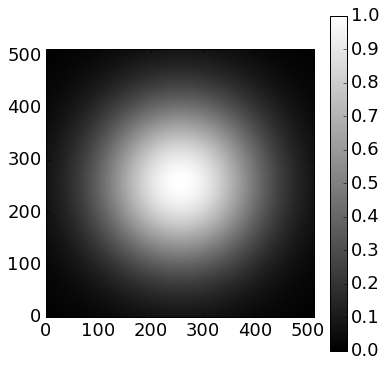

Current iter. : 1500
        Error : 3.03e-02
Current iter. : 1600
        Error : 3.03e-02
Current filter:


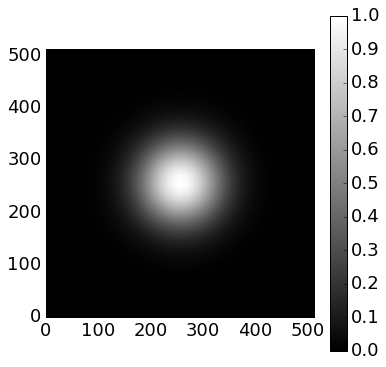

Current iter. : 1700
        Error : 3.03e-02
Current iter. : 1800
        Error : 3.03e-02
Current filter:


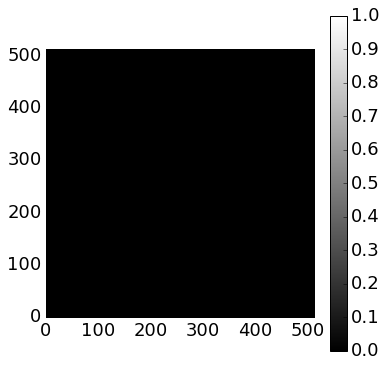

Current iter. : 1900
        Error : 3.03e-02
Current iter. : 2000
        Error : 3.03e-02
-----------------------
First iteration error: 1.07e-01
Final iteration : 2000
Final Error: 3.03e-02


In [175]:
ast_50_ori_pup,ast_50_ori_foc, \
ast_50_ori_errlist, \
ast_50_ori_pup_proj, \
ast_50_ori_errpuplist = ast_50_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

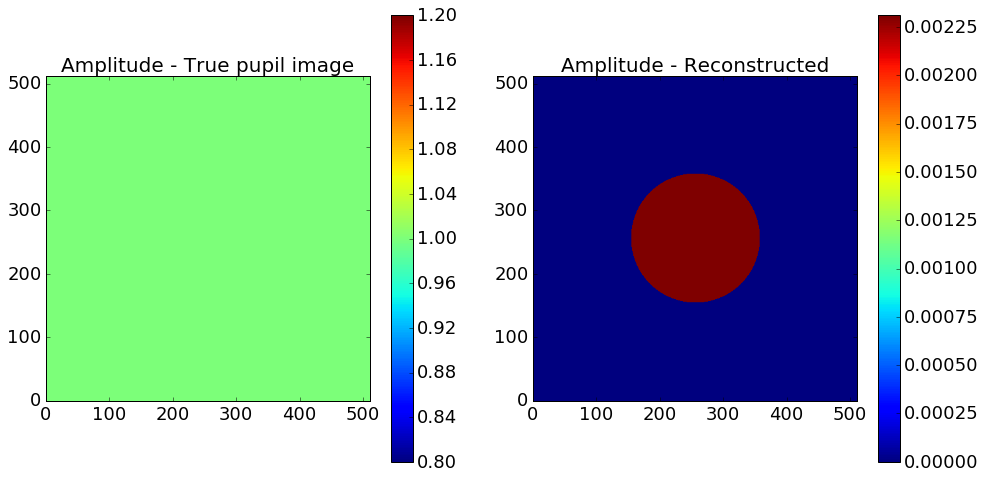

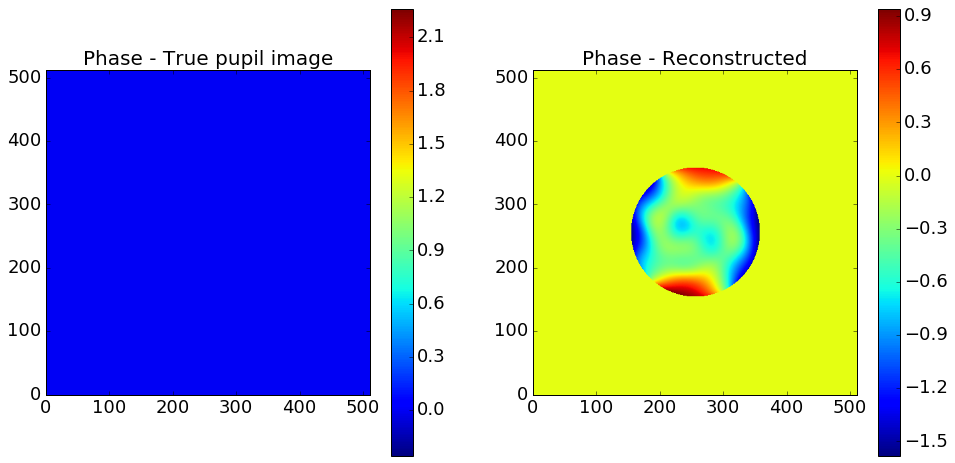

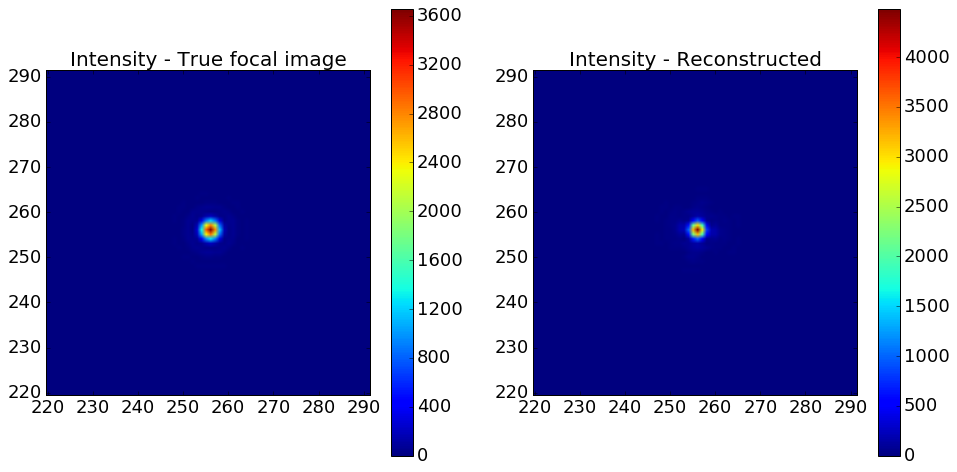

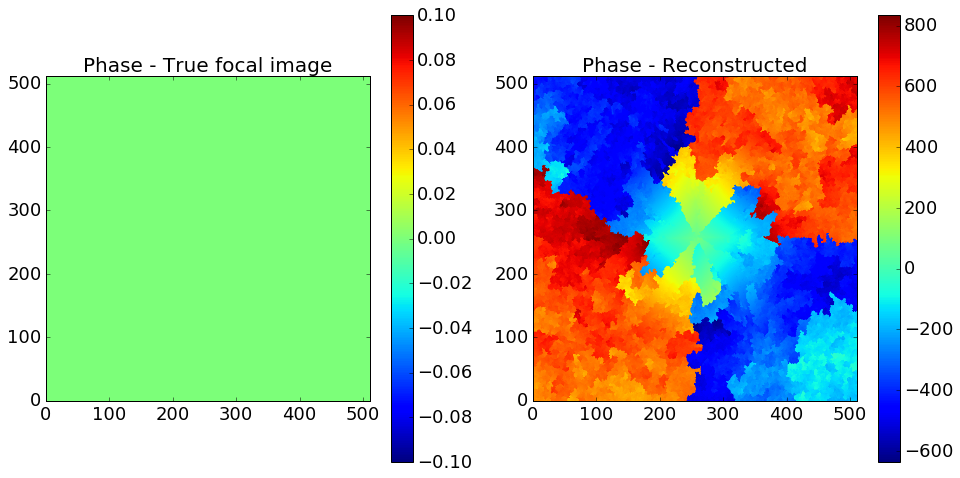

In [176]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(ast_50_ori_PR.foc),ast_50_ori_pup_proj,ast_50_ori_foc)

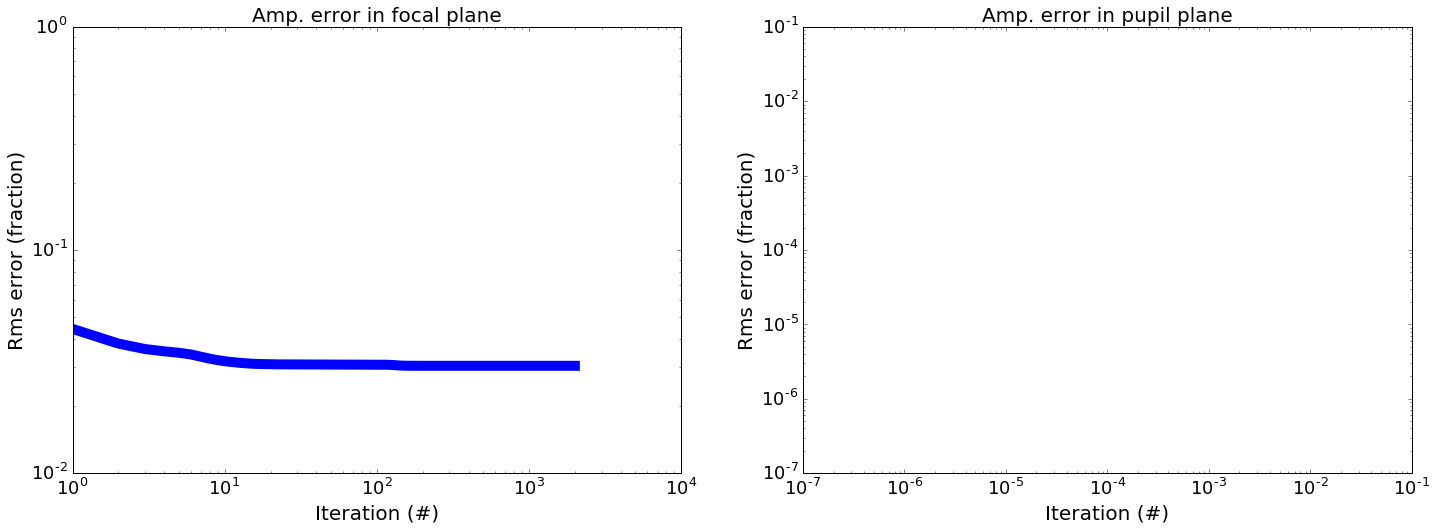

In [177]:
plot_errlist(ast_50_ori_errlist,ast_50_ori_errpuplist)

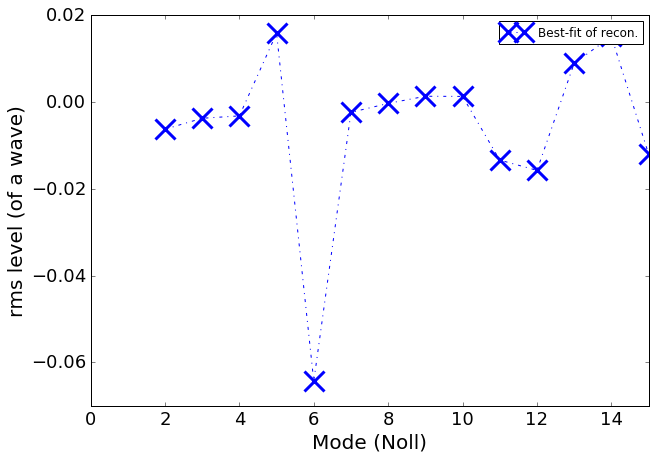

In [245]:
coef_ast_ori_50_true, \
coef_ast_ori_50_reco = wrap_up_zern_fit(ast_50_ori_PR,
                                        Recon_phasor=ast_50_ori_pup_proj,
                                        oversamp=oversampo)

Interesting... Now it fails

#### 5. Complex1

In [179]:
complex1_ori_PR = PR(foc=complex1_ori_clp,oversamp=oversampo)

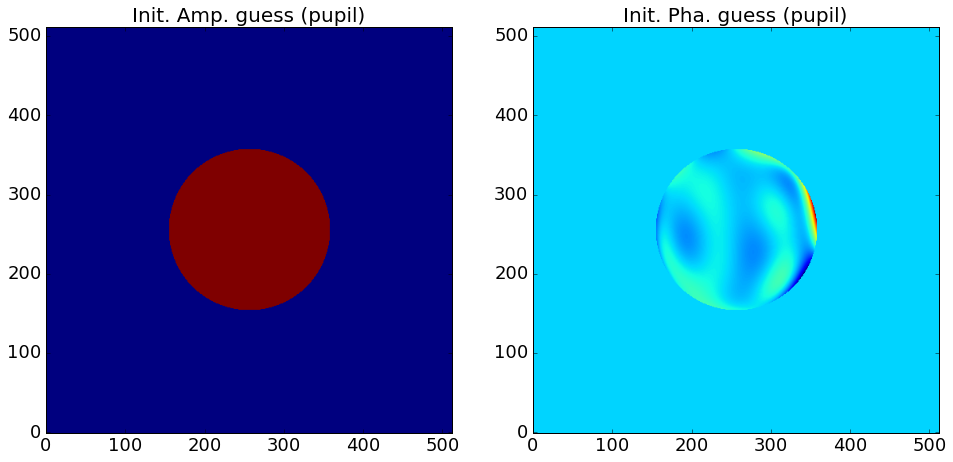

Current filter:


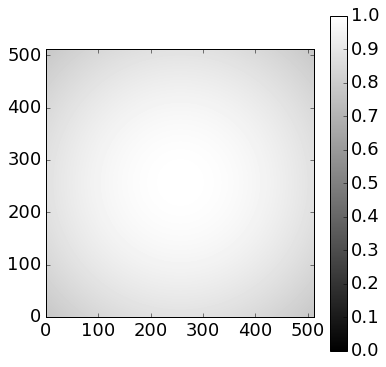

Current iter. : 100
        Error : 2.57e-02
Current iter. : 200
        Error : 2.57e-02
Current filter:


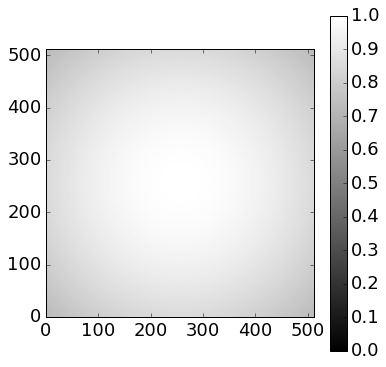

Current iter. : 300
        Error : 2.57e-02
Current iter. : 400
        Error : 2.57e-02
Current filter:


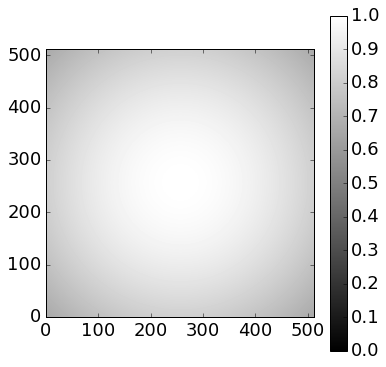

Current iter. : 500
        Error : 2.57e-02
Current iter. : 600
        Error : 2.57e-02
Current filter:


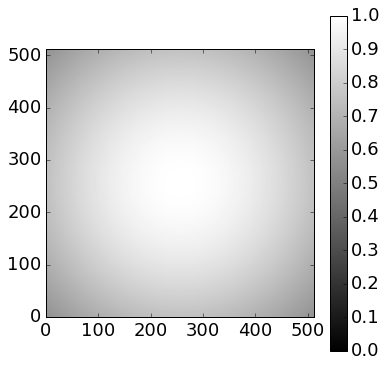

Current iter. : 700
        Error : 2.57e-02
Current iter. : 800
        Error : 2.57e-02
Current filter:


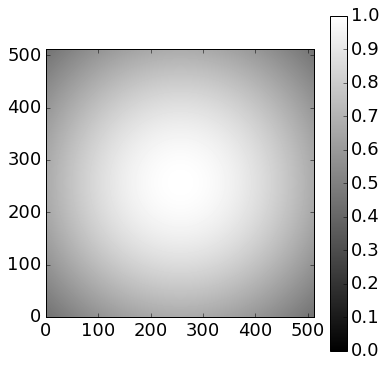

Current iter. : 900
        Error : 2.57e-02
Current iter. : 1000
        Error : 2.57e-02
Current filter:


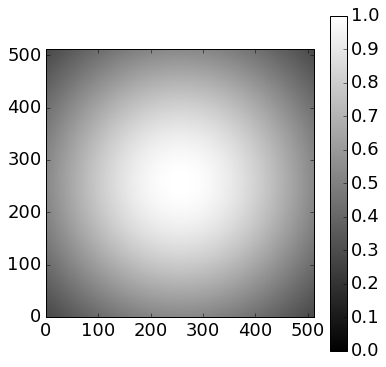

Current iter. : 1100
        Error : 2.57e-02
Current iter. : 1200
        Error : 2.57e-02
Current filter:


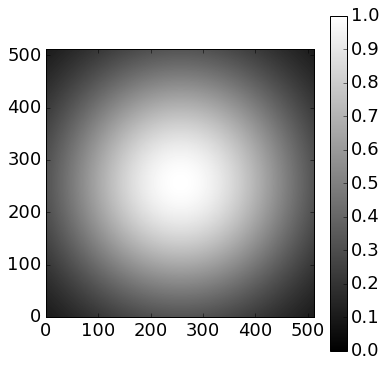

Current iter. : 1300
        Error : 2.57e-02
Current iter. : 1400
        Error : 2.57e-02
Current filter:


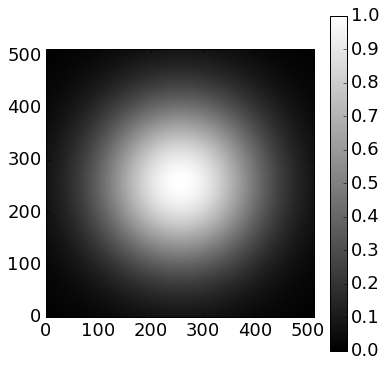

Current iter. : 1500
        Error : 2.57e-02
Current iter. : 1600
        Error : 2.57e-02
Current filter:


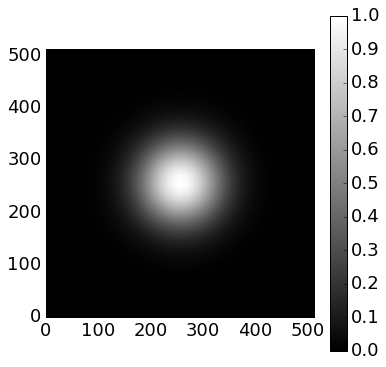

Current iter. : 1700
        Error : 2.57e-02
Current iter. : 1800
        Error : 2.57e-02
Current filter:


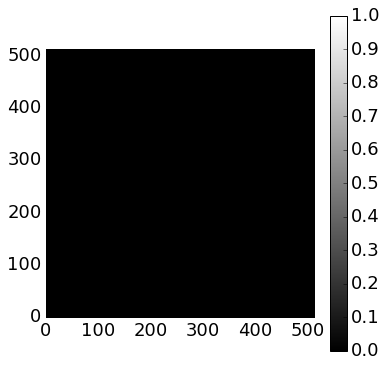

Current iter. : 1900
        Error : 2.57e-02
Current iter. : 2000
        Error : 2.57e-02
-----------------------
First iteration error: 8.78e-02
Final iteration : 2000
Final Error: 2.57e-02


In [180]:
complex1_ori_pup,complex1_ori_foc, \
complex1_ori_errlist, \
complex1_ori_pup_proj, \
complex1_ori_errpuplist = complex1_ori_PR.OSS(beta=0.5,force_only_phase=True,init='random')

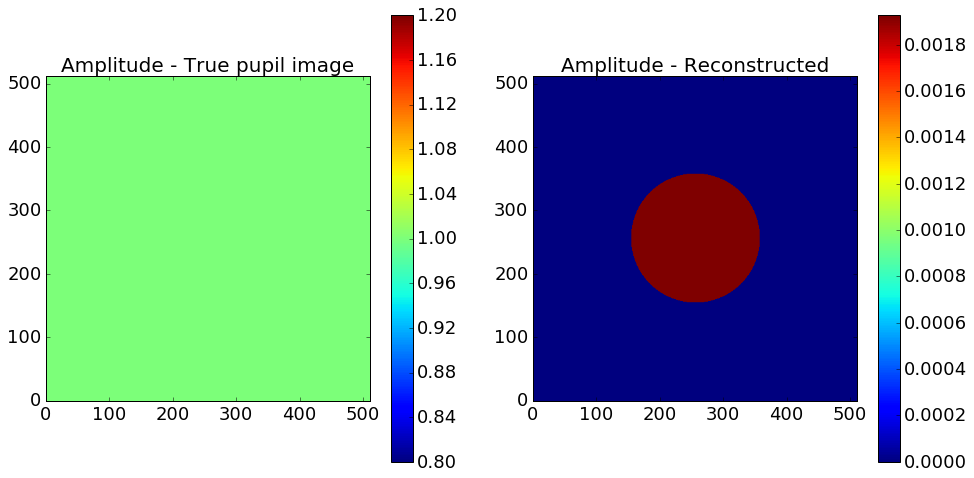

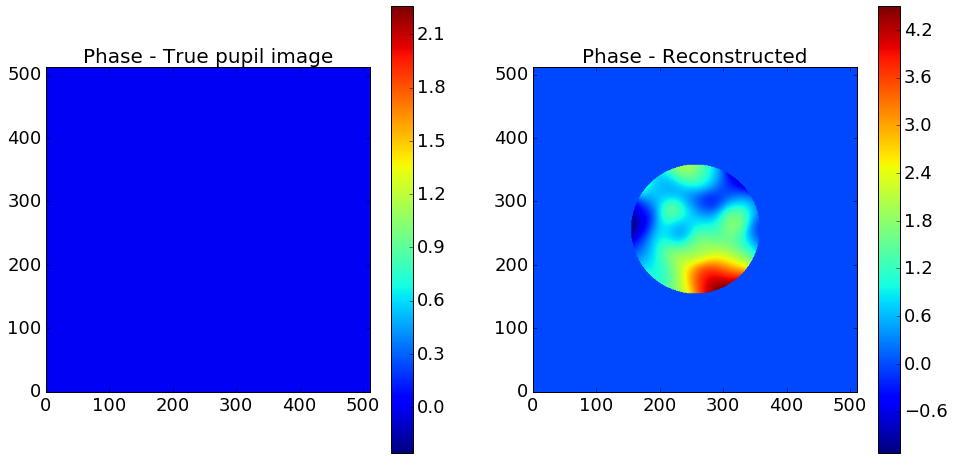

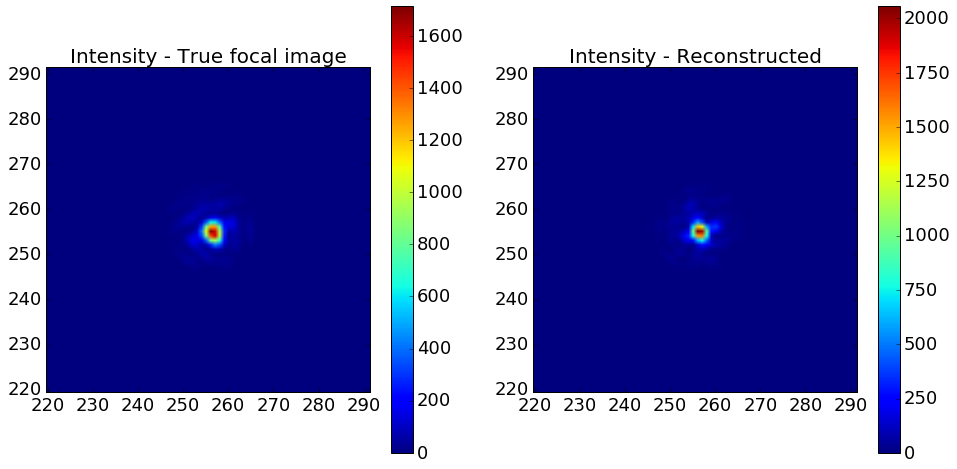

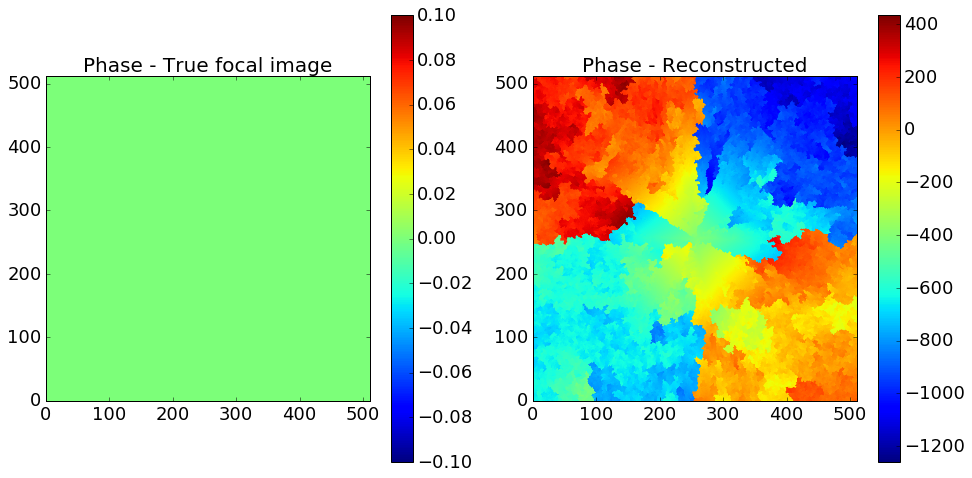

In [181]:
plot_recon(np.ones((Npix,Npix)),np.sqrt(complex1_ori_PR.foc),complex1_ori_pup_proj,complex1_ori_foc)

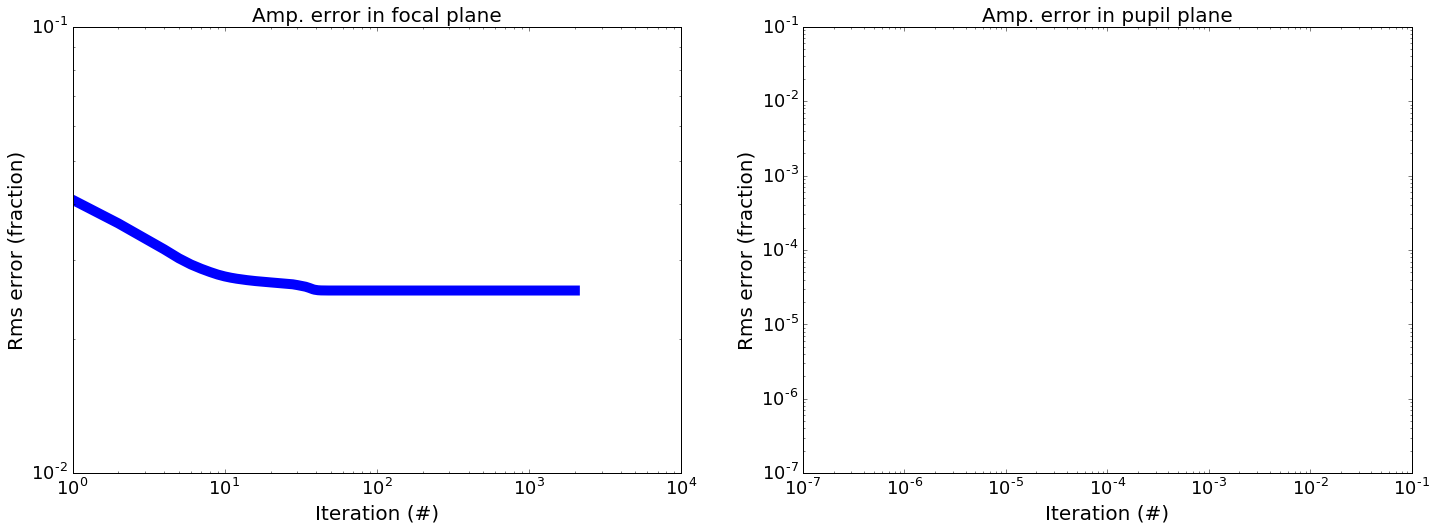

In [182]:
plot_errlist(complex1_ori_errlist,complex1_ori_errpuplist)

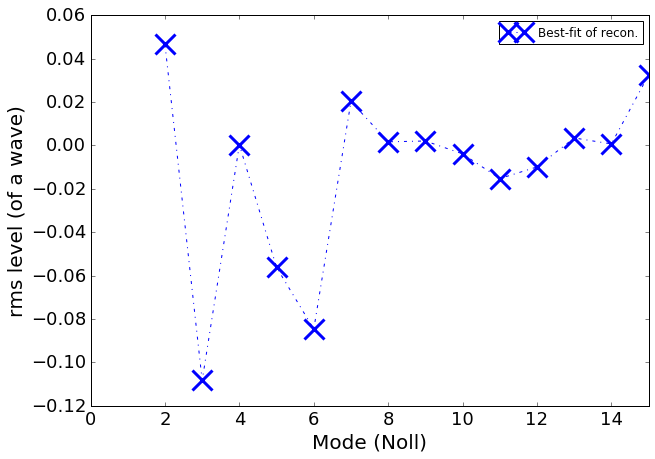

In [246]:
coef_complex1_ori_true, \
coef_complex1_ori_reco = wrap_up_zern_fit(complex1_ori_PR,
                                          Recon_phasor=complex1_ori_pup_proj,
                                          oversamp=oversampo)

---
## Conclusion (?)
- Ambiguity of orientation left? Some seem well-reconstructed but the Zernike mode fitting shows inconsistency. Thus the suspicion.
- Some work better when rotated, others opposite
- Assigning non-integer center as integral one would be manifested as "tip/tilt"
- More complex/noisy images are recovered worse.